In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
from collections import Counter

In [14]:
virus_color_pallete = {'h1n1': '#0173b2',
                        'h3n2': '#56b4e9',
                        'rsv_a': '#d55e00',
                        'rsv_b': '#cc78bc',
                        'sars_cov_2_139': '#ece133', 
                        'sars_cov_2_122': '#A59D23',
                        'sars_cov_2_4964': '#029e73'
                        # 'victoria': '#029e73',
                        }

alignment_scores = ['match1_mis-1_o0_e0', 'match1_mis-1_o-2_e-2', 'match1_mis-1_o-5_e-1','match2_mis-1_o-5_e-1']
alignment_score = 'match1_mis-1_o-2_e-2'


cols_scores = ['match_score', 'mismatch_score', 'open_gap_score', 'extend_gap_score']
set_scores_PairwiseAligner_df = pd.DataFrame([[1, -1, 0, 0], 
                                              [1, -1, -2, -2], 
                                              [1, -1, -5, -1] 
                                              ,[2, -1, -5, -1]
                                              ], 
                                              columns=cols_scores)

x = datetime.datetime.now()
date_generated = str(x.year) + '_' + str(x.month) + '_' + str(x.day)
# alebo d nastait rucne, ak zvolit iny datum ako dnesny
# date_generated = '2024_3_28'
# date_generated = '2024_4_16'
print(date_generated)

trimmers = ['_trimmomatic', '_cutadapt']
trimmer = trimmers[1]
print(trimmer)

sars_plots = False # True / False

param_used = ['headcrop', 'quality', 'minlen']


# set if analysing with minlen0
analyse_minlen0 = True # True / False 


if not analyse_minlen0:
    analyse_minlen0_path = 'nominlen0_'
else:
    analyse_minlen0_path = ''

def get_sars_plots_path(sars_plots):
    
    if sars_plots:
        sars_plots_path = '_sars'
    else:
        sars_plots_path = ''
    
    return sars_plots_path



2024_4_23
_cutadapt


In [55]:
for _, row in set_scores_PairwiseAligner_df.iterrows():
    
    match_score = row['match_score']
    mismatch_score = row['mismatch_score']
    open_gap_score = row['open_gap_score']
    extend_gap_score = row['extend_gap_score']

    pairwiseAligner_set_scores_name = 'match' + str(match_score) + '_mis' + str(mismatch_score) + '_o' \
                                        + str(open_gap_score) + '_e' + str(extend_gap_score)
    print(pairwiseAligner_set_scores_name)

match1_mis-1_o0_e0
match1_mis-1_o-2_e-2
match1_mis-1_o-5_e-1
match2_mis-1_o-5_e-1


In [23]:
# create directories
import os

for as_dir in ['match1_mis-1_o0_e0', 'match1_mis-1_o-2_e-2', 'match1_mis-1_o-5_e-1','match2_mis-1_o-5_e-1']:

    directory_path = "./data/result_metrics/comparison_MBS_params_score/" + as_dir

    #os.mkdir(directory_path)

In [4]:
alignment_score = 'match1_mis-1_o-2_e-2'

path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '.tsv'
all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')

all_rd_samples

virus      trimmer  quality  headcrop  minlen    score  match  gap  \
0     h1n1  trimmomatic       20         0      35  13430.0  13431    0   
1     h1n1  trimmomatic       30         0       0  13430.0  13431    0   
2     h1n1  trimmomatic       20         0       0  13430.0  13431    0   
3     h1n1  trimmomatic       25         0       0  13430.0  13431    0   
4     h1n1  trimmomatic       25         0      35  13430.0  13431    0   
..     ...          ...      ...       ...     ...      ...    ...  ...   
374  rsv_a  trimmomatic       20        15      45  15215.0  15218    0   
375  rsv_a  trimmomatic       20        15      35  15215.0  15218    0   
376  rsv_a  trimmomatic       15        15      65  15215.0  15218    0   
377  rsv_a  trimmomatic       15        15      55  15215.0  15218    0   
378  rsv_a  trimmomatic       30        15      65  15215.0  15218    0   

     mismatch  N_count  score_agg  sample_id pairwiseAligner_set_score  \
0           1        9    13429.0       1337      match1_mis-1_o-2_e-2   
1           1        9    13429.0       1337      match1_mis-1_o-2_e-2   
2           1        9    13429.0       1337      match1_mis-1_o-2_e-2   
3           1        9    13429.0       1337      match1_mis-1_o-2_e-2   
4           1        9    13429.0       1337      match1_mis-1_o-2_e-2   
..        ...      ...        ...        ...                       ...   
374         3        3    15212.0       1658      match1_mis-1_o-2_e-2   
375         3        3    15212.0       1658      match1_mis-1_o-2_e-2   
376         3        3    15212.0       1658      match1_mis-1_o-2_e-2   
377         3        3    15212.0       1658      match1_mis-1_o-2_e-2   
378         3        3    15212.0       1658      match1_mis-1_o-2_e-2   

    consensus_baseline consensus_baseline_virus  
0                  NaN                      NaN  
1                  NaN                      NaN  
2                  NaN                      NaN  
3                  NaN                      NaN  
4                  NaN                      NaN  
..                 ...                      ...  
374                NaN                      NaN  
375                NaN                      NaN  
376                NaN                      NaN  
377                NaN                      NaN  
378                NaN                      NaN  

[379 rows x 15 columns]

Text(0.5, 1.0, 'Score acccording to comparison with MBS headcrop match1_mis-1_o0_e0')

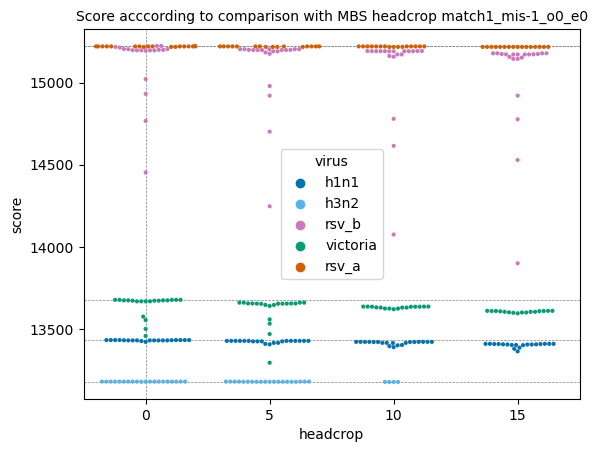

In [19]:
param_used = "headcrop"
# plt.figure(figsize=(6,5))
plot_title = 'Score acccording to comparison with MBS '+ param_used + ' ' + alignment_score
sns.swarmplot(data=all_rd_samples, x=param_used, y="score", hue="virus", size=3, palette=virus_color_pallete)
plt.axvline(x=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h1n1'][param_used].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h1n1']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h3n2']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_rsv_a']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_rsv_b']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_victoria']['score'].item(), color='grey', linestyle='--', linewidth=0.5)

plt.title(plot_title, fontsize=10)

# plt.savefig("./data/result_metrics/comparison_MBS_params_score/" + alignemnt_score + "/" + param_used + '_' + alignemnt_score + ".png")

Text(0.5, 1.0, 'Score acccording to comparison with MBS headcrop match1_mis-1_o0_e0')

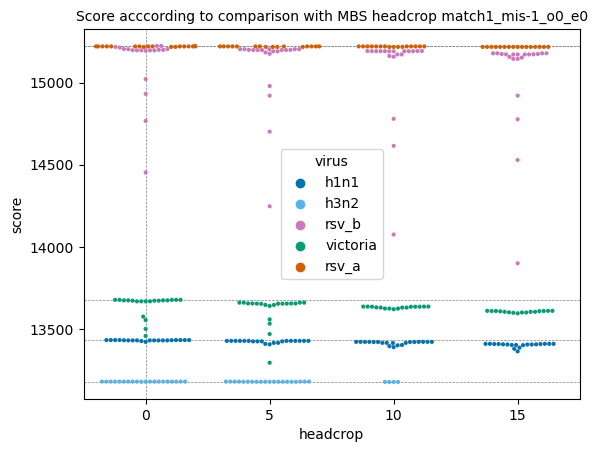

In [21]:
param_used = "headcrop"
# plt.figure(figsize=(6,5))
plot_title = 'Score acccording to comparison with MBS '+ param_used + ' ' + alignment_score
sns.swarmplot(data=all_rd_samples, x=param_used, y="score", hue="virus", size=3, palette=virus_color_pallete)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h1n1']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h3n2']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_rsv_a']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_rsv_b']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_victoria']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='grey', linestyle='--', linewidth=0.5)

plt.title(plot_title, fontsize=10)

# plt.savefig("./data/result_metrics/comparison_MBS_params_score/" + alignemnt_score + "/" + param_used + '_' + alignemnt_score + ".png")

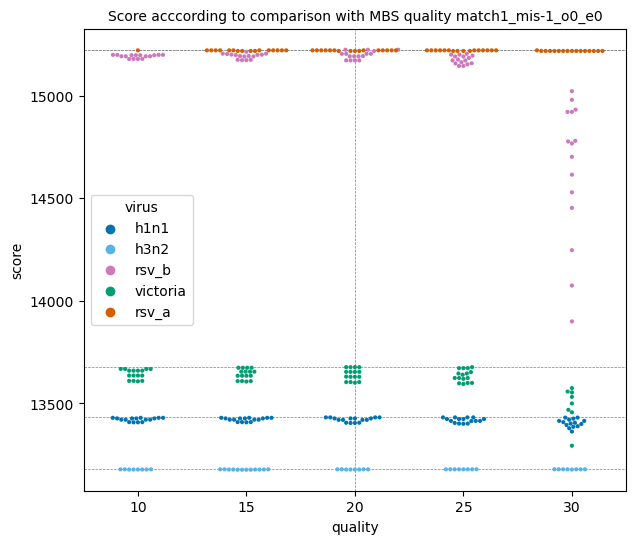

In [32]:
param_used = "quality"
plt.figure(figsize=(7,6))
plot_title = 'Score acccording to comparison with MBS '+ param_used + ' ' + alignment_score
sns.swarmplot(data=all_rd_samples, x=param_used, y="score", hue="virus", size=3, palette=virus_color_pallete)
# plt.axvline(x=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h1n1'][param_used].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h1n1']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h3n2']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_rsv_a']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_rsv_b']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_victoria']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axvline(x=2, color='grey', linestyle='--', linewidth=0.5)

plt.title(plot_title, fontsize=10)

path_fo_save_fig = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + "/" + param_used + '_' + alignment_score + '_' + date_generated + ".png"
# plt.savefig(path_fo_save_fig)

([<matplotlib.axis.YTick at 0x7f419445a830>,
 [Text(0, 26000, '26000'),
  Text(0, 26500, '26500'),
  Text(0, 27000, '27000'),
  Text(0, 27500, '27500'),
  Text(0, 28000, '28000'),
  Text(0, 29000, '29000'),
  Text(0, 31000, '31000'),
  Text(0, 60000, '60000')])

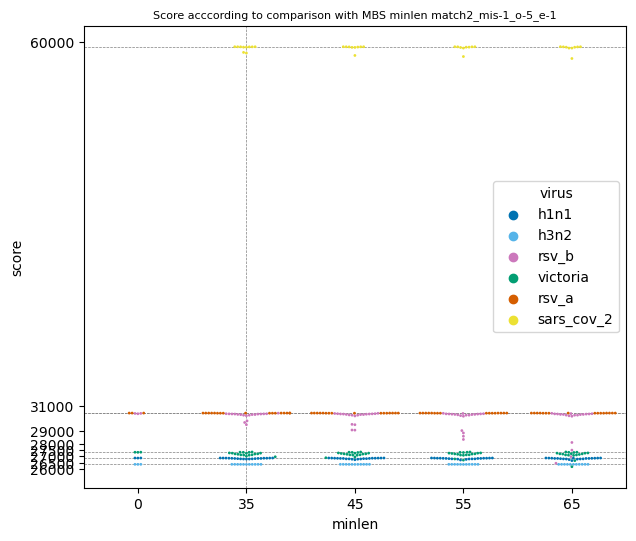

In [41]:
param_used = "minlen"

plt.figure(figsize=(7,6))
plot_title = 'Score acccording to comparison with MBS '+ param_used + ' ' + alignment_score

custom_y_ticks = [26000, 26500, 27000, 27500, 28000, 29000, 31000, 60000]
custom_y_labels = [str(tick) for tick in custom_y_ticks]

sns.swarmplot(data=all_rd_samples, x=param_used, y="score", hue="virus", size=2, palette=virus_color_pallete)
# plt.axvline(x=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h1n1'][param_used].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h1n1']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h3n2']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_rsv_a']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_rsv_b']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_victoria']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_sars_cov_2']['score'].item(), color='grey', linestyle='--', linewidth=0.5)

plt.axvline(x=1, color='grey', linestyle='--', linewidth=0.5)

plt.title(plot_title, fontsize=8)
plt.yticks(custom_y_ticks, custom_y_labels)


# path_fo_save_fig = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + "/" + param_used + '_' + alignment_score + '_' + date_generated + ".png"
# plt.savefig(path_fo_save_fig)


In [51]:
min(all_rd_samples.score), max((all_rd_samples.score))

alignment_scores, date_generated, trimmer

(['match1_mis-1_o0_e0',
  'match1_mis-1_o-2_e-2',
  'match1_mis-1_o-5_e-1',
  'match2_mis-1_o-5_e-1'],
 '2024_2_27',
 '_trimmomatic')

In [53]:
path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_match1_mis-1_o-2_e-2_' + date_generated + trimmer + '.tsv'
all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
all_rd_samples

min(all_rd_samples.score), max((all_rd_samples.score))


(12554.0, 29817.0)

/home/gaziova/miniconda3/envs/pollux/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gaziova/miniconda3/envs/pollux/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


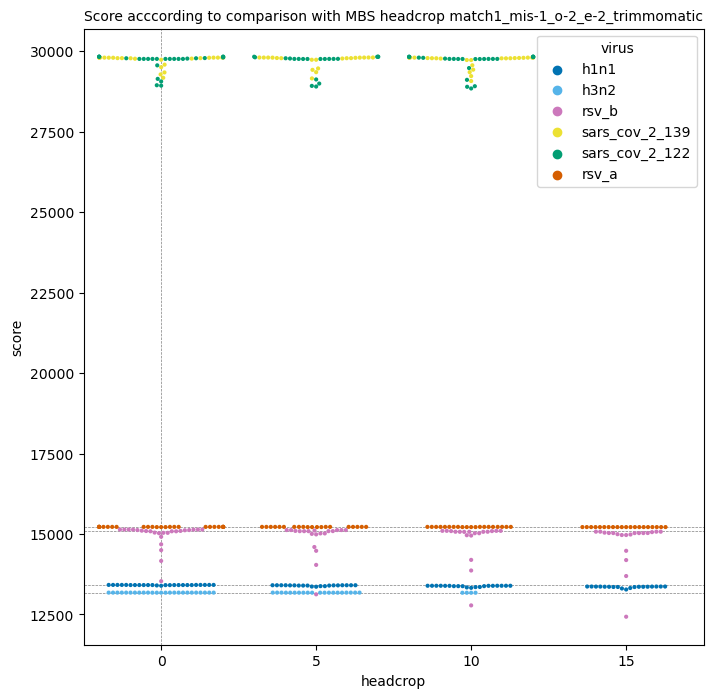

<Figure size 640x480 with 0 Axes>

/home/gaziova/miniconda3/envs/pollux/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gaziova/miniconda3/envs/pollux/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 5.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gaziova/miniconda3/envs/pollux/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


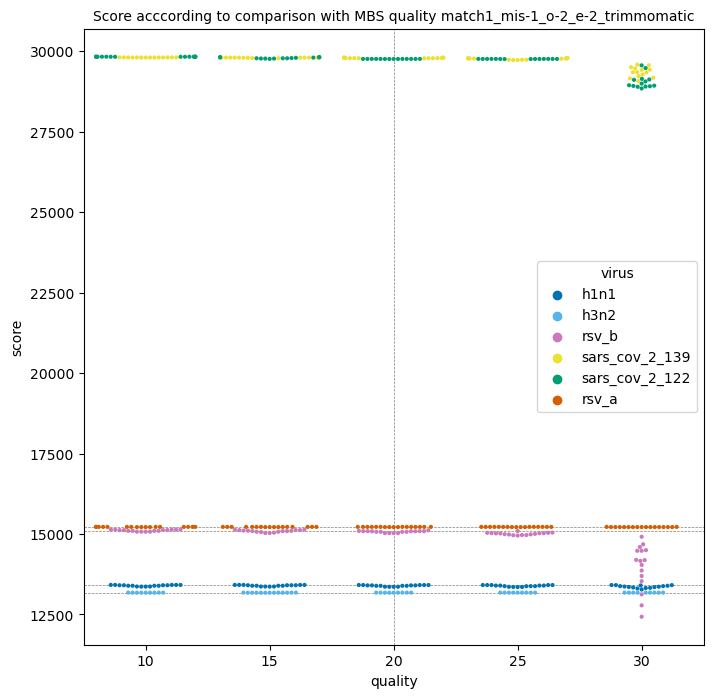

<Figure size 640x480 with 0 Axes>

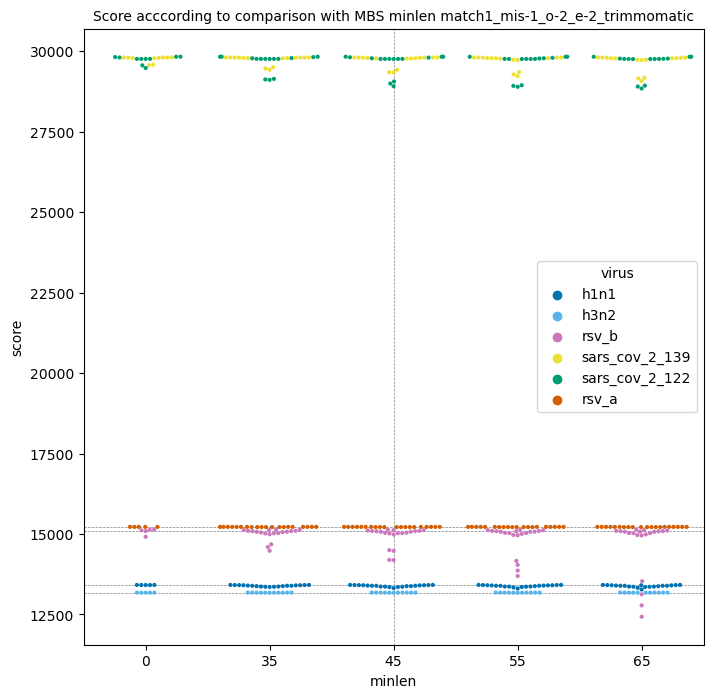

<Figure size 640x480 with 0 Axes>

In [176]:
# generovanie vsetkych 

param_used_values = ['headcrop', 'quality', 'minlen']

for alignment_score in ['match1_mis-1_o-2_e-2']:

    path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '.tsv'
    all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
    # all_rd_samples = all_rd_samples[all_rd_samples.virus != 'sars_cov_2_139']
    # all_rd_samples = all_rd_samples[all_rd_samples.virus != 'sars_cov_2_122']

    if not analyse_minlen0:
        all_rd_samples = all_rd_samples[all_rd_samples.minlen != 0]

    if trimmer == '_cutadapt':
        all_rd_samples = all_rd_samples[all_rd_samples.quality != 30]
        all_rd_samples = all_rd_samples[all_rd_samples.headcrop != 10]
    
    
    for param_used in param_used_values:
        
        if trimmer == '_cutadapt':
            plt.figure(figsize=(5,5))
        else:
            plt.figure(figsize=(8,8))
        
        plot_title = 'Score acccording to comparison with MBS '+ param_used + ' ' + alignment_score + trimmer
        sns.swarmplot(data=all_rd_samples, x=param_used, y="score", hue="virus", size=3, palette=virus_color_pallete)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h1n1']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h3n2']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_rsv_a']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_rsv_b']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        # plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_sars_cov_2']['score'].item(), color='grey', linestyle='--', linewidth=0.5)


        #  headcrop:: mbs_param = 0, else mbs_param = 2, ale pri minlen ak je aj minlen0, tak posun na 2
        if param_used == 'headcrop':
            mbs_param = 0
        
        elif param_used == 'minlen':
            if analyse_minlen0:
                mbs_param = 2
            else:
                mbs_param = 1
        else: # quality
            mbs_param = 2

        plt.axvline(x=mbs_param, color='grey', linestyle='--', linewidth=0.5)

        plt.title(plot_title, fontsize=10)

        path_to_save_fig = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + "/" + param_used + '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer + ".png"

        # Save the figure for the current param_used
        # plt.savefig(path_to_save_fig, bbox_inches='tight')

        plt.show()

        # Clear the current figure to start a new one
        plt.clf()



#generovanie iba pre SARS-COV-2 


./data/result_metrics/comparison_MBS_params_score/match1_mis-1_o-2_e-2/headcrop_match1_mis-1_o-2_e-2_2024_3_28_sars_cutadapt.png


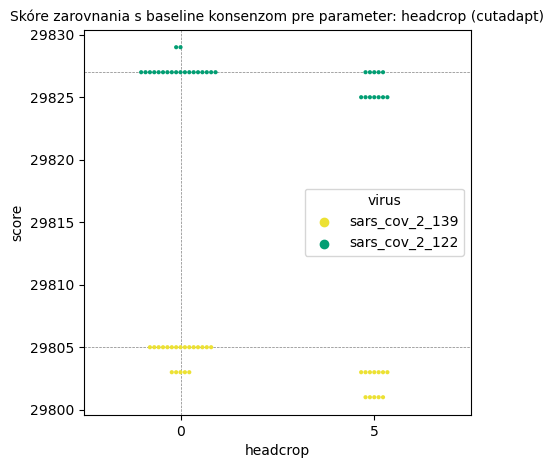

./data/result_metrics/comparison_MBS_params_score/match1_mis-1_o-2_e-2/quality_match1_mis-1_o-2_e-2_2024_3_28_sars_cutadapt.png


<Figure size 640x480 with 0 Axes>

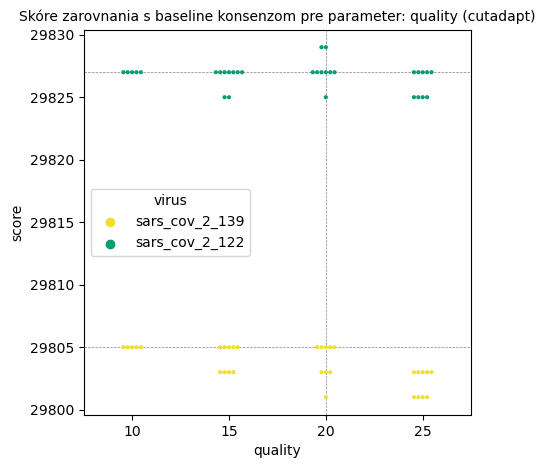

./data/result_metrics/comparison_MBS_params_score/match1_mis-1_o-2_e-2/minlen_match1_mis-1_o-2_e-2_2024_3_28_sars_cutadapt.png


<Figure size 640x480 with 0 Axes>

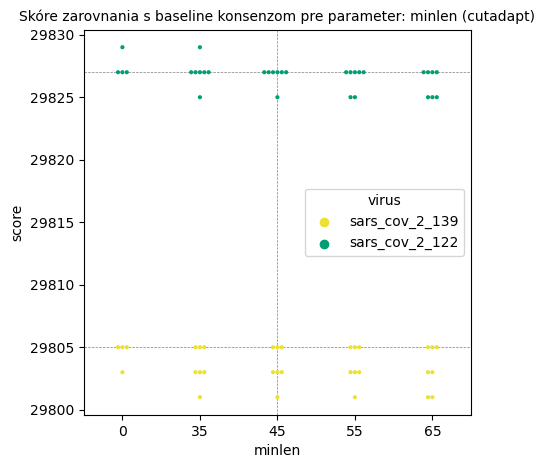

<Figure size 640x480 with 0 Axes>

In [225]:
# generovanie iba pre SARS-COV-2 

param_used_values = ['headcrop', 'quality', 'minlen']

for alignment_score in ['match1_mis-1_o-2_e-2']:

    path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '.tsv'
    all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
    all_rd_samples = all_rd_samples[(all_rd_samples.virus == 'sars_cov_2_139') | (all_rd_samples.virus == 'sars_cov_2_122') ]
                                    #| (all_rd_samples.virus == 'sars_cov_2_4964')]

    if not analyse_minlen0:
        all_rd_samples = all_rd_samples[all_rd_samples.minlen != 0]

    if trimmer == '_cutadapt':
        all_rd_samples = all_rd_samples[all_rd_samples.quality != 30]
        all_rd_samples = all_rd_samples[all_rd_samples.headcrop != 10]
    
    
    for param_used in param_used_values:
        
        if trimmer == '_cutadapt':
            plt.figure(figsize=(5,5))
        else:
            plt.figure(figsize=(8,8))
        
        plot_title = 'Skóre zarovnania s baseline konsenzom pre parameter: '+ param_used + ' (' + trimmer.replace('_', '') + ')'
        sns.swarmplot(data=all_rd_samples, x=param_used, y="score", hue="virus", size=3, palette=virus_color_pallete)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_sars_cov_2_122']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_sars_cov_2_139']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        # plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_sars_cov_2_4964']['score'].item(), color='grey', linestyle='--', linewidth=0.5)



        #  headcrop:: mbs_param = 0, else mbs_param = 2, ale pri minlen ak je aj minlen0, tak posun na 2
        if param_used == 'headcrop':
            mbs_param = 0
        
        elif param_used == 'minlen':
            if analyse_minlen0:
                mbs_param = 2
            else:
                mbs_param = 1
        else: # quality
            mbs_param = 2

        plt.axvline(x=mbs_param, color='grey', linestyle='--', linewidth=0.5)

        plt.title(plot_title, fontsize=10)

        path_to_save_fig = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + "/" + param_used + '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + get_sars_plots_path(True) + trimmer + ".png"

        # Save the figure for the current param_used
        plt.savefig(path_to_save_fig, bbox_inches='tight')
        print(path_to_save_fig)
        
        plt.show()

        # Clear the current figure to start a new one
        plt.clf()



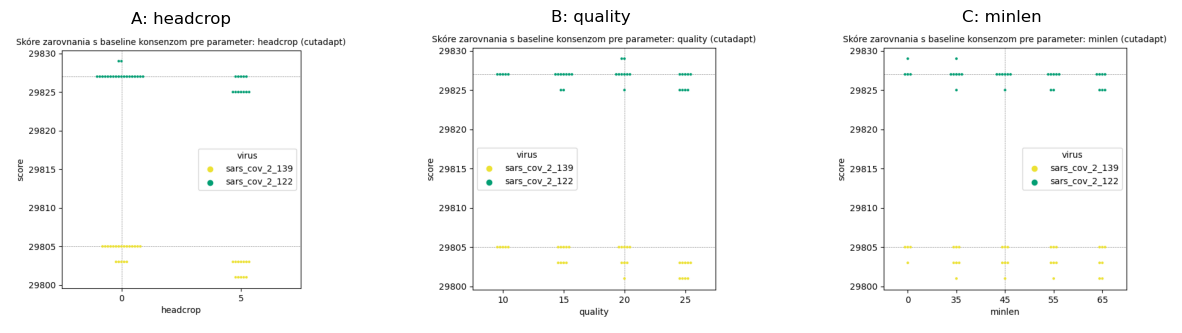

In [226]:
# Combine individual plots into one PNG file - with title - Horizontaly
for alignment_score in [alignment_scores[1]]:

    path_to_save_fig1 = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + "/"
    path_to_save_fig2 = '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + get_sars_plots_path(True) + trimmer
    param_label_abc = {'headcrop': 'A: headcrop', 'quality': 'B: quality', 'minlen': 'C: minlen'}


    images = [f'{path_to_save_fig1}{param_used}{path_to_save_fig2}.png' for param_used in param_used_values]
    combined_fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

    for i, (image, param_label) in enumerate(zip(images, param_used_values), 1):
        img = plt.imread(image)
        axes[i - 1].imshow(img)
        axes[i - 1].axis('off')
        axes[i - 1].set_title(param_label_abc[param_label])

    # Save the combined figure to a PNG file
    combined_fig.savefig(path_to_save_fig1 + 'combined_plots' + path_to_save_fig2 + '.png', bbox_inches='tight', dpi=500)

    plt.show()


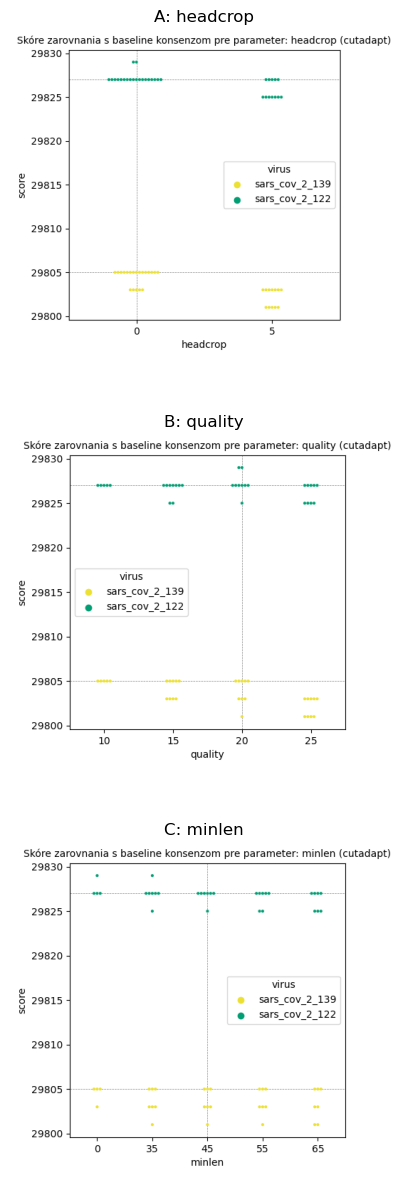

In [228]:
# Combine individual plots into one PNG file with title - Verticaly
for alignment_score in [alignment_scores[1]]:

    if not analyse_minlen0:
        analyse_minlen0_path = 'nominlen0_'
    else:
        analyse_minlen0_path = ''

    path_to_save_fig1 = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + "/"
    path_to_save_fig2 = '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + get_sars_plots_path(True) + trimmer
    param_used_values = ['headcrop', 'quality', 'minlen']
    param_label_abc = {'headcrop': 'A: headcrop', 'quality': 'B: quality', 'minlen': 'C: minlen'}
    
    images = [f'{path_to_save_fig1}{param_used}{path_to_save_fig2}.png' for param_used in param_used_values]
    combined_fig, axes = plt.subplots(len(images), 1, figsize=(5, 15))

    for ax, image, param_label in zip(axes, images, param_used_values):
        img = plt.imread(image)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(param_label_abc[param_label], fontsize=12)

    # Save the combined figure to a PNG file
    combined_fig.savefig(path_to_save_fig1 + 'combined_plots' + path_to_save_fig2 + '_vr.png', bbox_inches='tight', dpi=500)

    plt.show()


#generovanie vsetkych influenza a rsv (bez sars_cov_2)


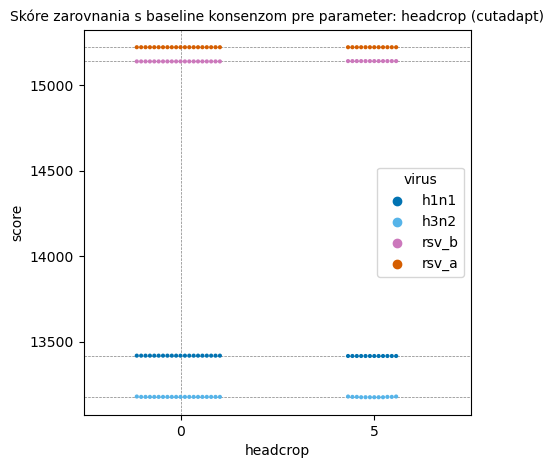

<Figure size 640x480 with 0 Axes>

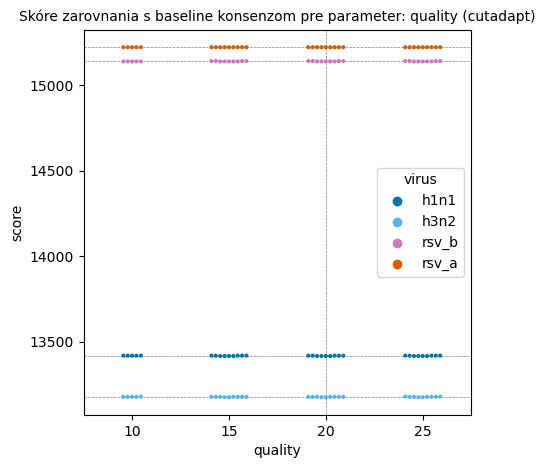

<Figure size 640x480 with 0 Axes>

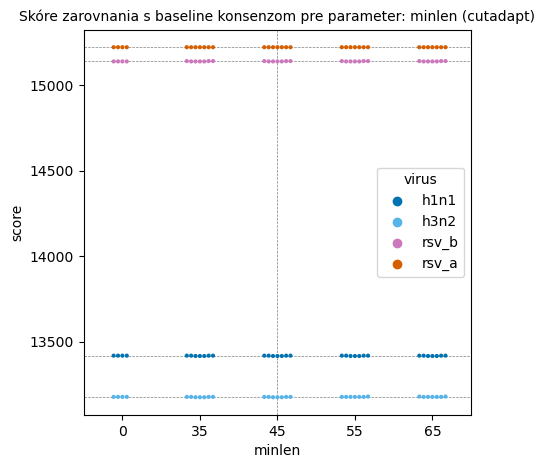

<Figure size 640x480 with 0 Axes>

In [229]:
# generovanie vsetkych influenza a rsv (bez sars_cov_2)

param_used_values = ['headcrop', 'quality', 'minlen']

for alignment_score in ['match1_mis-1_o-2_e-2']:

    path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '.tsv'
    all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
    all_rd_samples = all_rd_samples[all_rd_samples.virus != 'sars_cov_2_139']
    all_rd_samples = all_rd_samples[all_rd_samples.virus != 'sars_cov_2_122']
    all_rd_samples = all_rd_samples[all_rd_samples.virus != 'sars_cov_2_4964']

    if not analyse_minlen0:
        all_rd_samples = all_rd_samples[all_rd_samples.minlen != 0]

    if trimmer == '_cutadapt':
        all_rd_samples = all_rd_samples[all_rd_samples.quality != 30]
        all_rd_samples = all_rd_samples[all_rd_samples.headcrop != 10]
    
    
    for param_used in param_used_values:
        
        if trimmer == '_cutadapt':
            plt.figure(figsize=(5,5))
        else:
            plt.figure(figsize=(8,8))
        
        plot_title = 'Skóre zarovnania s baseline konsenzom pre parameter: '+ param_used + ' (' + trimmer.replace('_', '') + ')'
        sns.swarmplot(data=all_rd_samples, x=param_used, y="score", hue="virus", size=3, palette=virus_color_pallete)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h1n1']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h3n2']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_rsv_a']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_rsv_b']['score'].item(), color='grey', linestyle='--', linewidth=0.5)


        #  headcrop:: mbs_param = 0, else mbs_param = 2, ale pri minlen ak je aj minlen0, tak posun na 2
        if param_used == 'headcrop':
            mbs_param = 0
        
        elif param_used == 'minlen':
            if analyse_minlen0:
                mbs_param = 2
            else:
                mbs_param = 1
        else: # quality
            mbs_param = 2

        plt.axvline(x=mbs_param, color='grey', linestyle='--', linewidth=0.5)

        plt.title(plot_title, fontsize=10)

        path_to_save_fig = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + "/" + param_used + '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer + ".png"

        # Save the figure for the current param_used
        plt.savefig(path_to_save_fig, bbox_inches='tight')

        plt.show()

        # Clear the current figure to start a new one
        plt.clf()



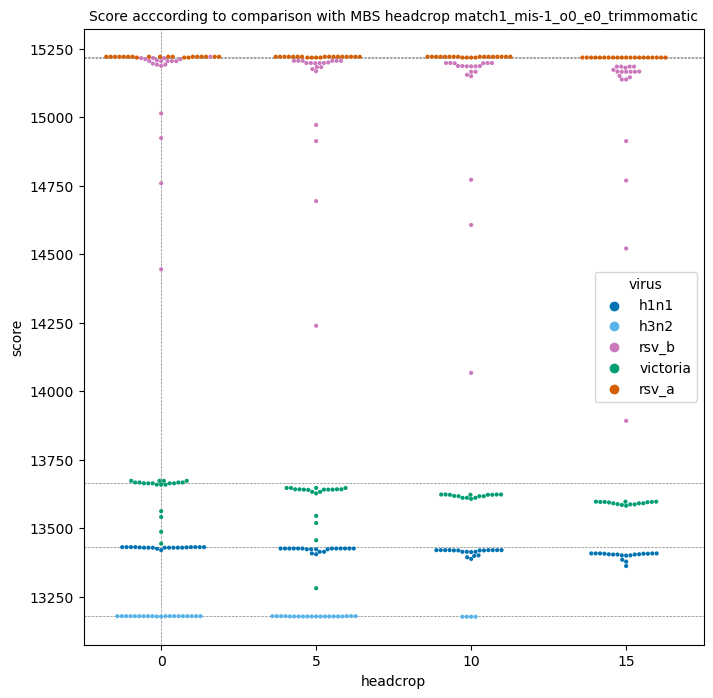

<Figure size 640x480 with 0 Axes>

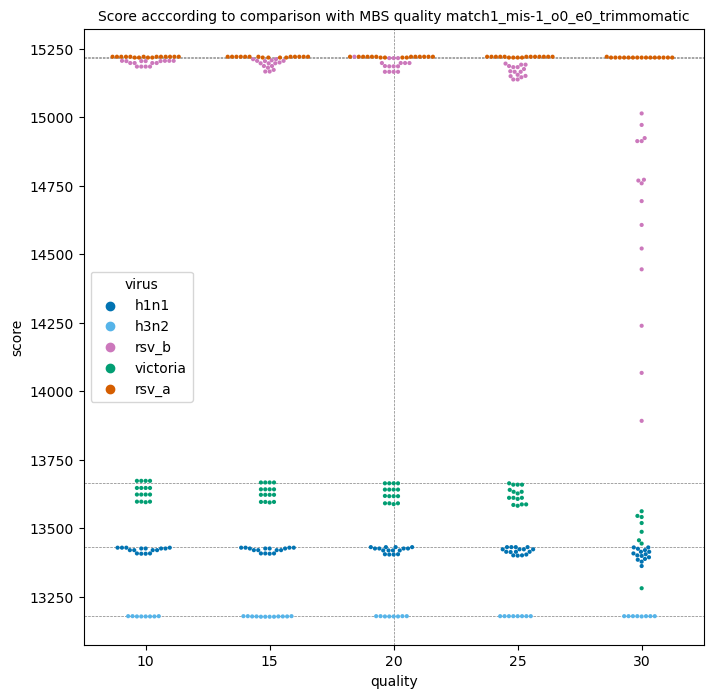

<Figure size 640x480 with 0 Axes>

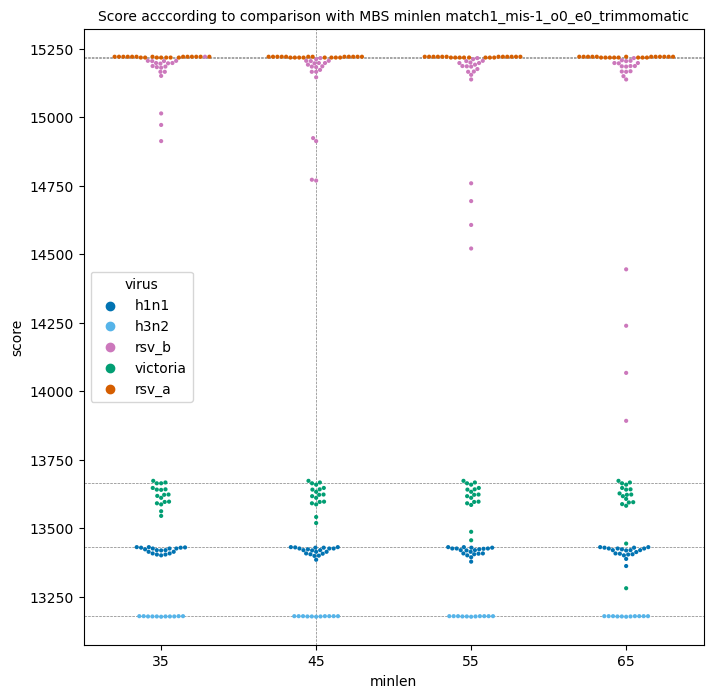

<Figure size 640x480 with 0 Axes>

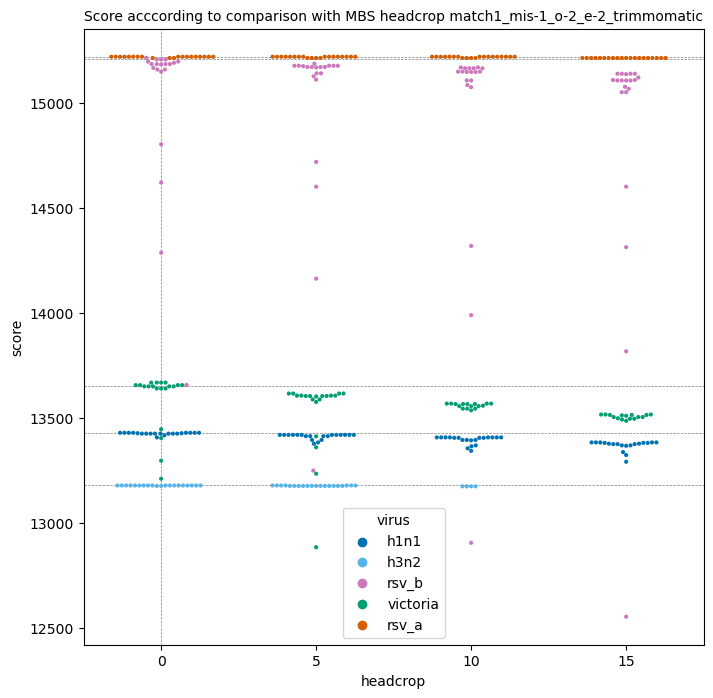

<Figure size 640x480 with 0 Axes>

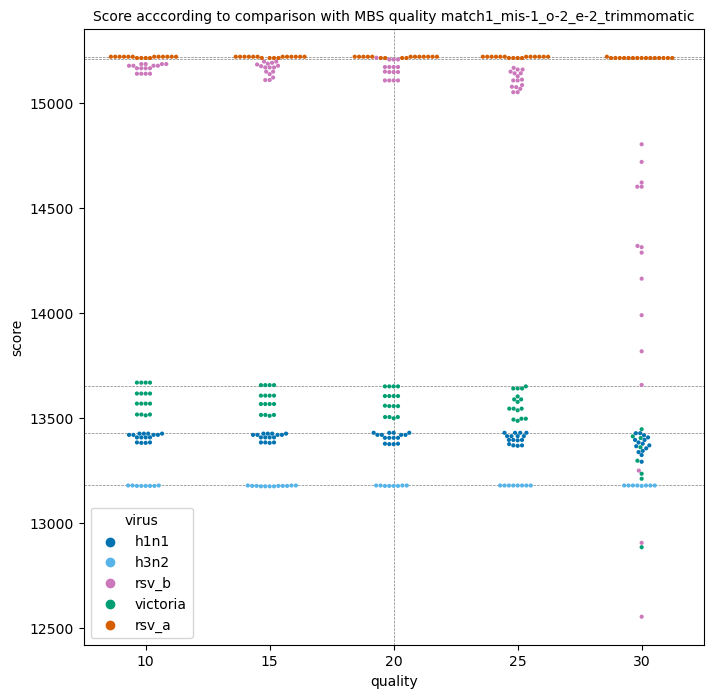

<Figure size 640x480 with 0 Axes>

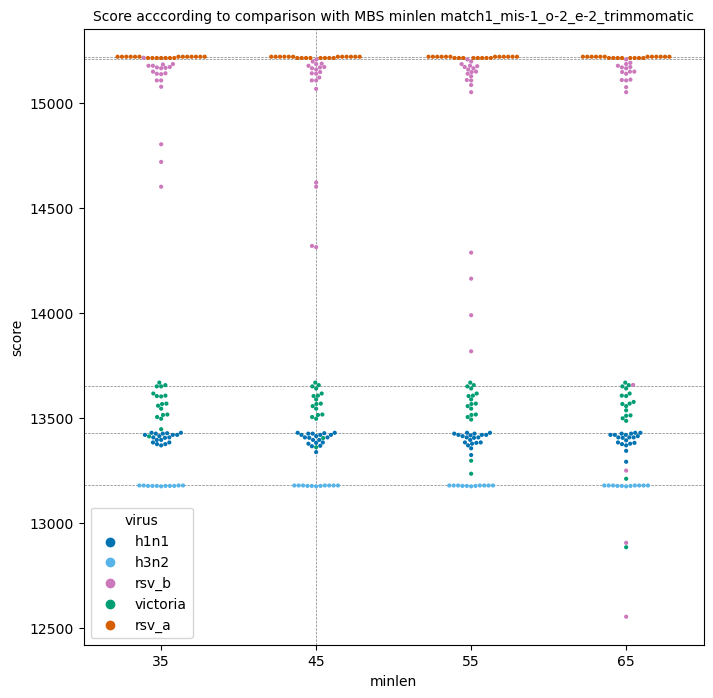

<Figure size 640x480 with 0 Axes>

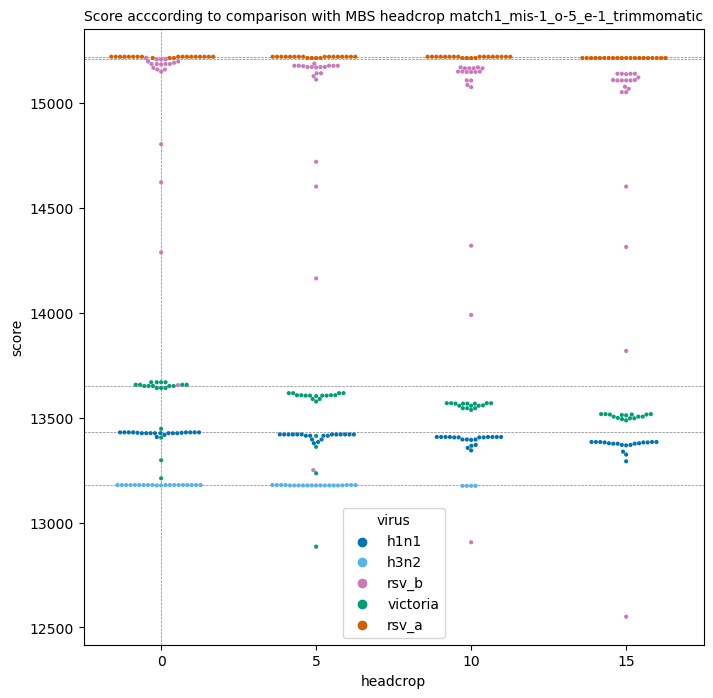

<Figure size 640x480 with 0 Axes>

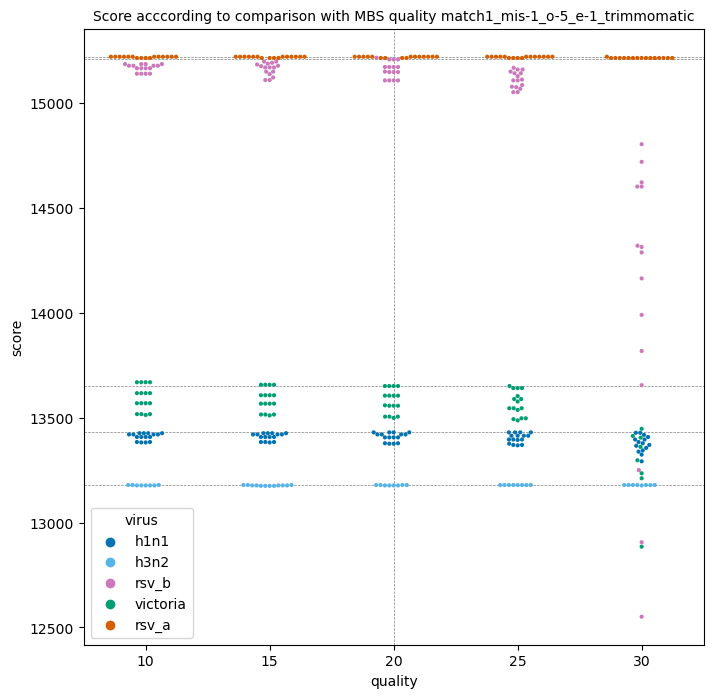

<Figure size 640x480 with 0 Axes>

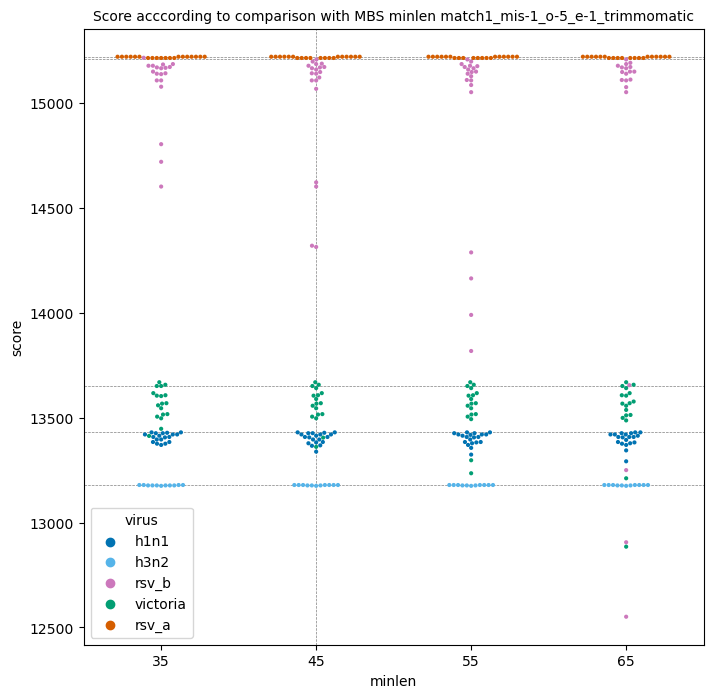

<Figure size 640x480 with 0 Axes>

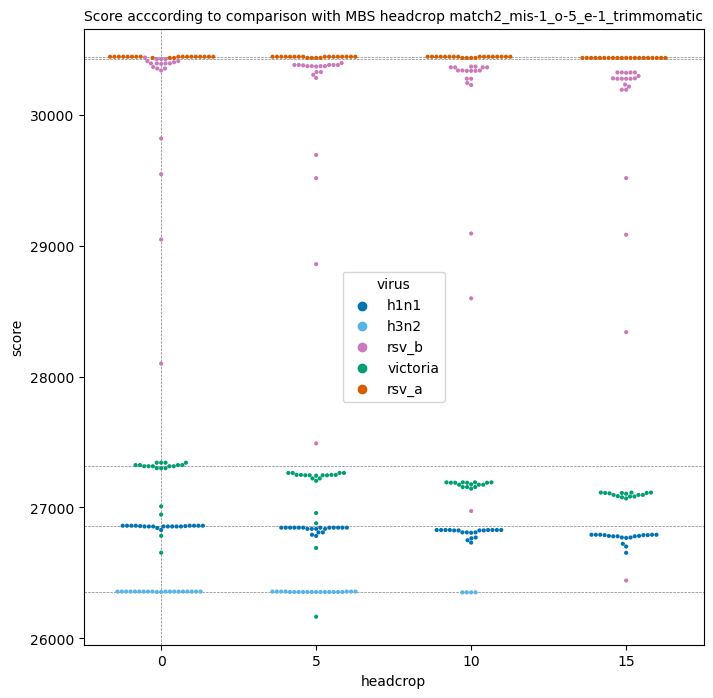

<Figure size 640x480 with 0 Axes>

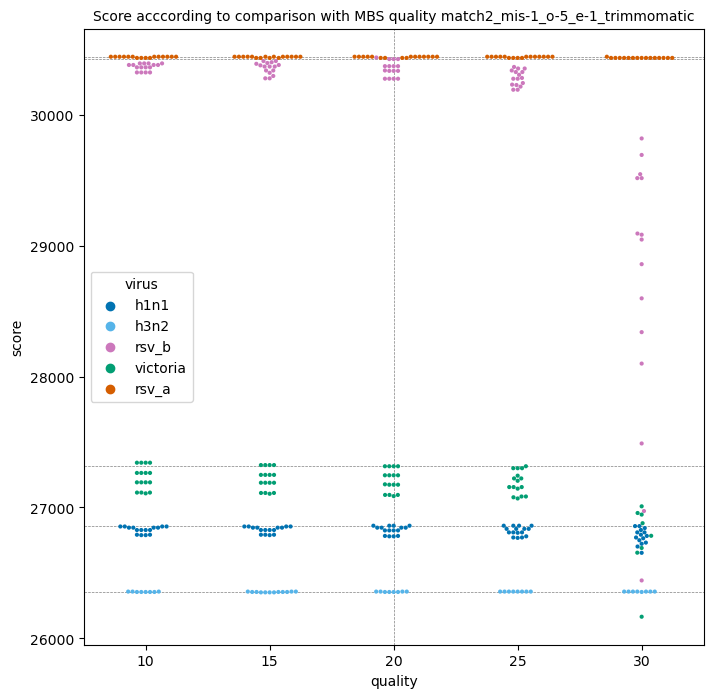

<Figure size 640x480 with 0 Axes>

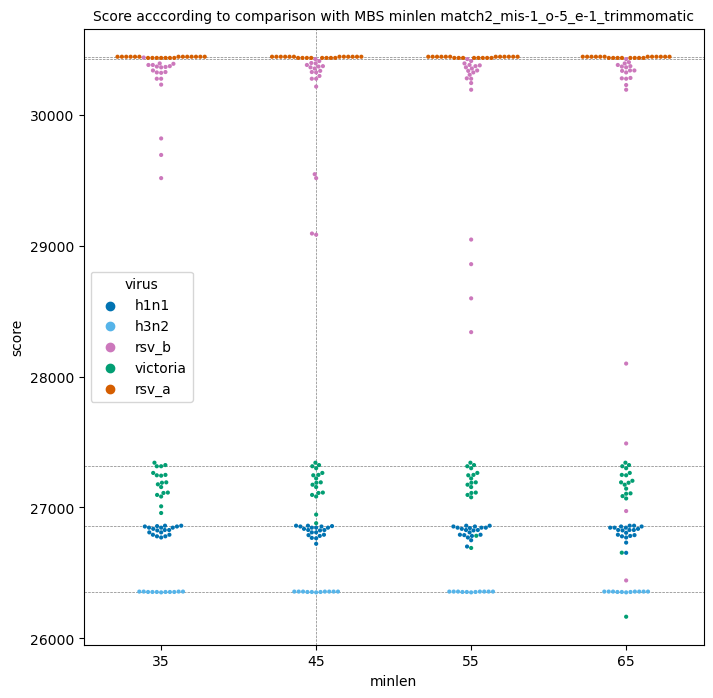

<Figure size 640x480 with 0 Axes>

In [18]:
# generovanie vsetkych 

param_used_values = ['headcrop', 'quality', 'minlen']

for alignment_score in alignment_scores: # ['match1_mis-1_o-2_e-2']:

    path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '.tsv'
    all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
    all_rd_samples = all_rd_samples[all_rd_samples.virus != 'sars_cov_2_139']
    all_rd_samples = all_rd_samples[all_rd_samples.virus != 'sars_cov_2_122']

    if not analyse_minlen0:
        all_rd_samples = all_rd_samples[all_rd_samples.minlen != 0]

    if trimmer == '_cutadapt':
        all_rd_samples = all_rd_samples[all_rd_samples.quality != 30]
        all_rd_samples = all_rd_samples[all_rd_samples.headcrop != 10]
    
    
    for param_used in param_used_values:
        
        if trimmer == '_cutadapt':
            plt.figure(figsize=(5,5))
        else:
            plt.figure(figsize=(8,8))
        
        plot_title = 'Score acccording to comparison with MBS '+ param_used + ' ' + alignment_score + trimmer
        sns.swarmplot(data=all_rd_samples, x=param_used, y="score", hue="virus", size=3, palette=virus_color_pallete)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h1n1']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_h3n2']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_rsv_a']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_rsv_b']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_victoria']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
        # plt.axhline(y=all_rd_samples[all_rd_samples.consensus_baseline_virus == 'MBS_sars_cov_2']['score'].item(), color='grey', linestyle='--', linewidth=0.5)


        #  headcrop:: mbs_param = 0, else mbs_param = 2, ale pri minlen ak je aj minlen0, tak posun na 2
        if param_used == 'headcrop':
            mbs_param = 0
        
        elif param_used == 'minlen':
            if analyse_minlen0:
                mbs_param = 2
            else:
                mbs_param = 1
        else: # quality
            mbs_param = 2

        plt.axvline(x=mbs_param, color='grey', linestyle='--', linewidth=0.5)

        plt.title(plot_title, fontsize=10)

        path_to_save_fig = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + "/" + param_used + '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer + ".png"

        # Save the figure for the current param_used
        plt.savefig(path_to_save_fig, bbox_inches='tight')

        plt.show()

        # Clear the current figure to start a new one
        plt.clf()



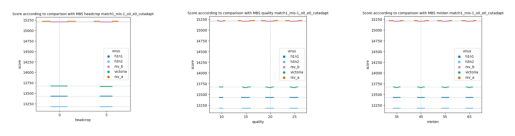

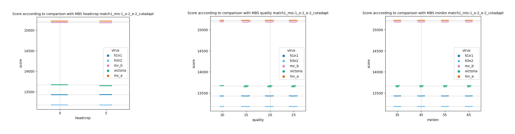

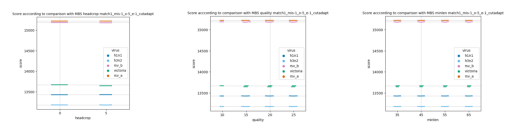

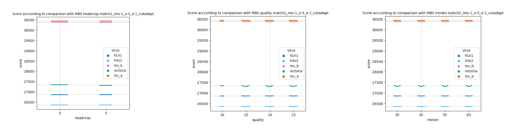

In [28]:
# Combine individual plots into one PNG file

for alignment_score in alignment_scores:

    path_to_save_fig1 = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + "/"
    path_to_save_fig2 = '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer

    images = [f'{path_to_save_fig1}{param_used}{path_to_save_fig2}.png' for param_used in param_used_values]
    combined_fig = plt.figure()

    for i, image in enumerate(images, 1):
        combined_fig.add_subplot(1, len(images), i)
        img = plt.imread(image)
        plt.imshow(img)
        plt.axis('off')


    # Save the combined figure to a PNG file
    combined_fig.savefig(path_to_save_fig1 + 'combined_plots' + path_to_save_fig2 + '.png', bbox_inches='tight', dpi = 500)

    plt.show()


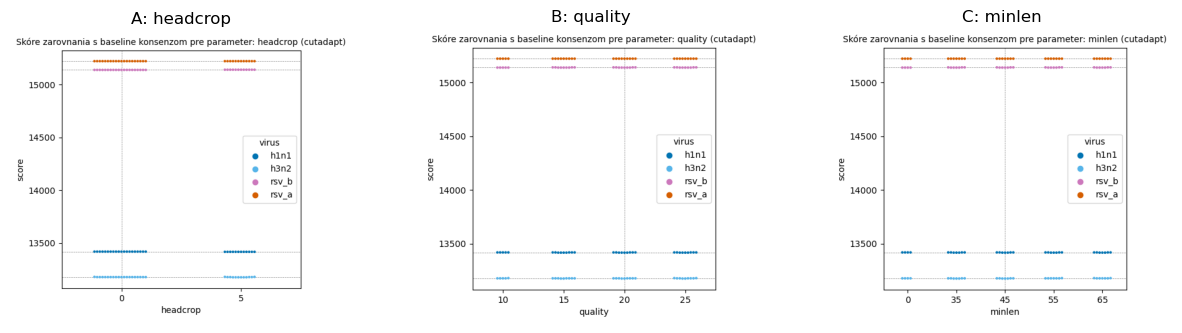

In [230]:
# Combine individual plots into one PNG file - with title - Horizontaly
for alignment_score in [alignment_scores[1]]:

    path_to_save_fig1 = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + "/"
    path_to_save_fig2 = '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer
    param_label_abc = {'headcrop': 'A: headcrop', 'quality': 'B: quality', 'minlen': 'C: minlen'}


    images = [f'{path_to_save_fig1}{param_used}{path_to_save_fig2}.png' for param_used in param_used_values]
    combined_fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

    for i, (image, param_label) in enumerate(zip(images, param_used_values), 1):
        img = plt.imread(image)
        axes[i - 1].imshow(img)
        axes[i - 1].axis('off')
        axes[i - 1].set_title(param_label_abc[param_label])

    # Save the combined figure to a PNG file
    combined_fig.savefig(path_to_save_fig1 + 'combined_plots' + path_to_save_fig2 + '.png', bbox_inches='tight', dpi=500)

    plt.show()


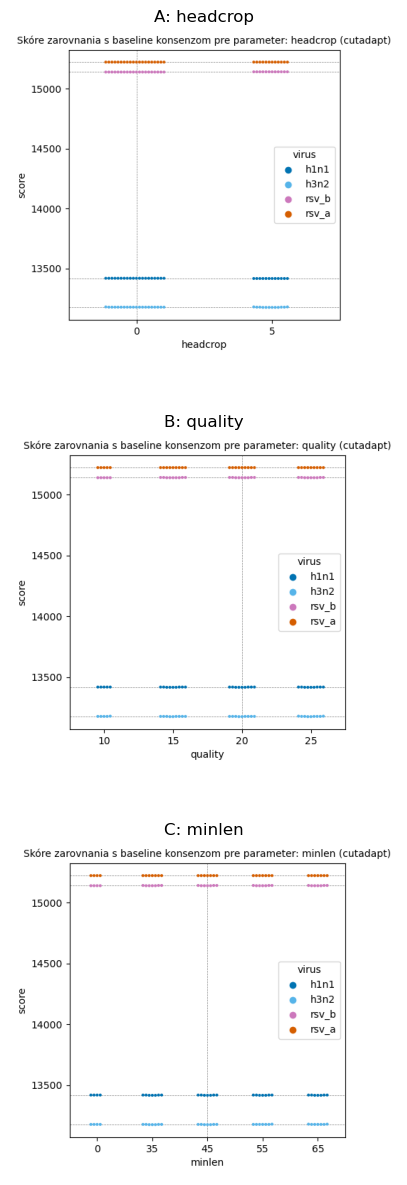

In [231]:
# Combine individual plots into one PNG file with title - Verticaly
for alignment_score in [alignment_scores[1]]:

    if not analyse_minlen0:
        analyse_minlen0_path = 'nominlen0_'
    else:
        analyse_minlen0_path = ''

    path_to_save_fig1 = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + "/"
    path_to_save_fig2 = '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer
    param_used_values = ['headcrop', 'quality', 'minlen']
    param_label_abc = {'headcrop': 'A: headcrop', 'quality': 'B: quality', 'minlen': 'C: minlen'}
    
    images = [f'{path_to_save_fig1}{param_used}{path_to_save_fig2}.png' for param_used in param_used_values]
    combined_fig, axes = plt.subplots(len(images), 1, figsize=(5, 15))

    for ax, image, param_label in zip(axes, images, param_used_values):
        img = plt.imread(image)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(param_label_abc[param_label], fontsize=12)

    # Save the combined figure to a PNG file
    combined_fig.savefig(path_to_save_fig1 + 'combined_plots' + path_to_save_fig2 + '_vr.png', bbox_inches='tight', dpi=500)

    plt.show()


In [14]:
all_rd_samples[all_rd_samples.virus == 'h3n2'].shape

(24, 15)

In [170]:

path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '.tsv'
all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
all_rd_samples.score.min(), all_rd_samples.score.max()


(12430.0, 29827.0)

In [ ]:
# heatplots
# med(H1, Q=30)/med(H1, Q=baseline=15)

# med(aligment_score_MBS)

In [3]:
samples_names = {'h1n1': 'run230320_UVZ_BA_23-vsp-1337_',
                 'h3n2': 'run230320_UVZ_BA_23-vsp-2129_',
                 'rsv_a': 'run230320_UVZ_BA_23-vsp-1658_',
                 'rsv_b': 'run230320_UVZ_BA_23-vsp-902_',
                 'sars_cov_2_122': 'uvzsr-BA_24_00001-G12-BA_24_00000122_',
                 'sars_cov_2_139': 'uvzsr-BA_24_00002-A09-BA_24_00000139_',
                 'sars_cov_2_4964': 'run230710_UVZ_BA_23-vsp-4964'
                 }
mbs_params = {'quality': 20,
              'minlen': 45,
              'headcrop': 0}

param_names_trimmomatic = {
            'headcrop': [0, 5, 10, 15],
            'quality': [10, 15, 20, 25],
            'minlen': [35, 45, 55, 65],
            }

param_names_cutadapt = {
            'headcrop': [0, 5],
            'quality': [10, 15, 20, 25],
            'minlen': [35, 45, 55, 65],
            }

if analyse_minlen0:
    param_names_cutadapt['minlen'].append(0)
    param_names_trimmomatic['minlen'].append(0)

param_used_values = ['headcrop', 'quality', 'minlen']
param_label_abc = {'headcrop': 'A: headcrop', 'quality': 'B: quality', 'minlen': 'C: minlen'}



if trimmer == '_cutadapt':
    param_names = param_names_cutadapt
elif trimmer == '_trimmomatic':
    param_names = param_names_trimmomatic
else:
    print('Vyber trimmer, ktory bol pouzity')


if not analyse_minlen0:
    analyse_minlen0_path = 'nominlen0_'
else:
    analyse_minlen0_path = ''


In [26]:
param_names_trimmomatic

{'quality': [10, 15, 20, 25, 30],
 'minlen': [35, 45, 55, 65],
 'headcrop': [0, 5, 10, 15]}

In [54]:
# quality
q_params = [10, 15, 20, 25, 30]

rd_samples_quality_median = pd.DataFrame(columns=q_params)

for virus_x in samples_names.keys():

    virus_quality_median = pd.DataFrame([[0, 0, 0, 0, 0]], columns=q_params)
    virus_df =  all_rd_samples[all_rd_samples.virus == virus_x]

    for q_param in q_params:
        
        q_param_med = virus_df[virus_df.quality == q_param].score.median()
        virus_quality_median[q_param] = q_param_med

    virus_quality_median['virus'] = virus_x

    rd_samples_quality_median = pd.concat([rd_samples_quality_median, virus_quality_median])

rd_samples_quality_median

10       15       20       25       30       virus
0  13414.0  13420.0  13420.0  13414.0  13378.0        h1n1
0  13177.0  13177.0  13179.0  13179.0  13179.0        h3n2
0  15172.0  15170.0  15172.0  15112.0  14288.0       rsv_b
0  29815.0  29811.0  29797.0  29779.0  29324.0  sars_cov_2
0  13593.0  13607.0  13605.0  13577.0  13329.0    victoria
0  15221.0  15221.0  15221.0  15221.0  15215.0       rsv_a

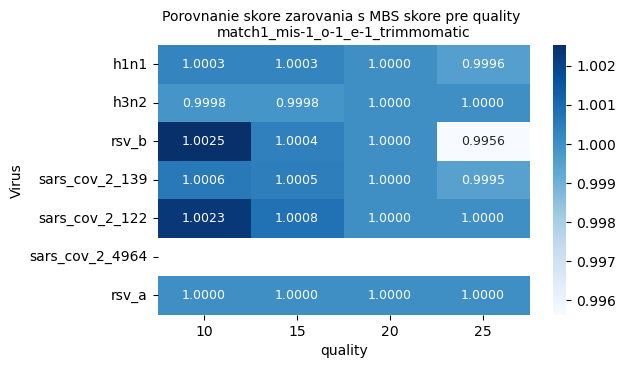

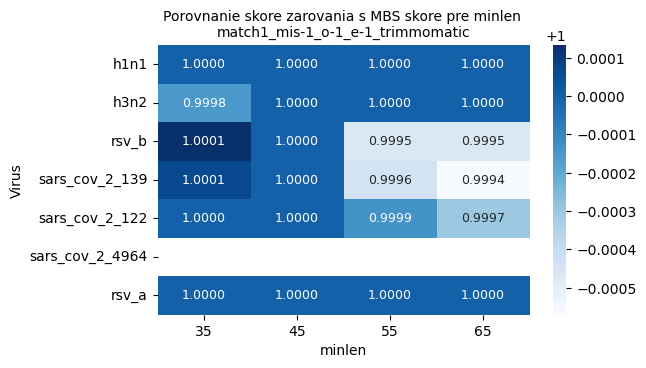

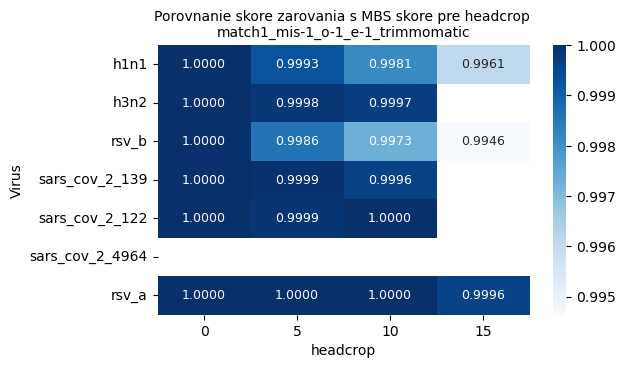

<Figure size 640x480 with 0 Axes>

In [62]:
# pre vsetky skorovacie schemy
for alignment_score in ['match1_mis-1_o-1_e-1']: #alignment_scores: 

    path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '.tsv'
    all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
    
    all_rd_samples = all_rd_samples[all_rd_samples.quality != 30]
    
    if not analyse_minlen0:
        all_rd_samples = all_rd_samples[all_rd_samples.minlen != 0]

    # ake parametre, ktorych hodnoty sa menili
    for param_col in param_names.keys():
        
        # print(param_col)

        params = param_names[param_col]

        rd_samples_param_median = pd.DataFrame(columns=params)

        # pre vsetky virusy
        for virus_x in samples_names.keys():

            # prazdny df (vyplneny '0')
            virus_param_median = pd.DataFrame([[0] * len(params)], columns=params)
            virus_df =  all_rd_samples[all_rd_samples.virus == virus_x]

            for param in params:
                
                param_med = virus_df[virus_df[param_col] == param].score.median()
                virus_param_median[param] = param_med

            virus_param_median['virus'] = virus_x

            rd_samples_param_median = pd.concat([rd_samples_param_median, virus_param_median], ignore_index=True)

        # print(rd_samples_param_median)

        mbs_param = mbs_params[param_col]
        rd_samples_param_median_diff = pd.DataFrame(columns=params)
        virus_param_median_diff  = pd.DataFrame([[0] * len(params)], columns=params)

        for i, row in rd_samples_param_median.iterrows():
            
            virus_param_median_diff['virus'] = row['virus']
                
            for param in params:
                
                vz_med = row[param]/row[mbs_param]
                virus_param_median_diff[param] = vz_med
            
            rd_samples_param_median_diff = pd.concat([rd_samples_param_median_diff, virus_param_median_diff], ignore_index=True)
                
        # print(rd_samples_param_median_diff)
        # plt.figure(figsize=(6,3))

        ax = sns.heatmap(rd_samples_param_median_diff.set_index('virus'), cmap="Blues", annot=True, annot_kws={"size": 9}, fmt=".4f")
        ax.set(xlabel=param_col, ylabel="Virus")

        # plot_title = 'Comparison of median of values for used parameter \n to median of scores of parameter for MBS '+ param_col + ' ' + '\n' + alignment_score + trimmer
        plot_title = 'Porovnanie skore zarovania s MBS skore pre '+ param_col + ' ' + '\n' + alignment_score + trimmer
        plt.title(plot_title, fontsize=10)
        plt.gcf().set_size_inches(6, 3.5)

        path_to_save_fig = './data/result_metrics/comparison_MBS_params_score/' + alignment_score + "/heatmap_" + param_col + '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer + ".png"
        plt.savefig(path_to_save_fig, bbox_inches='tight')

        plt.show()

        plt.clf()



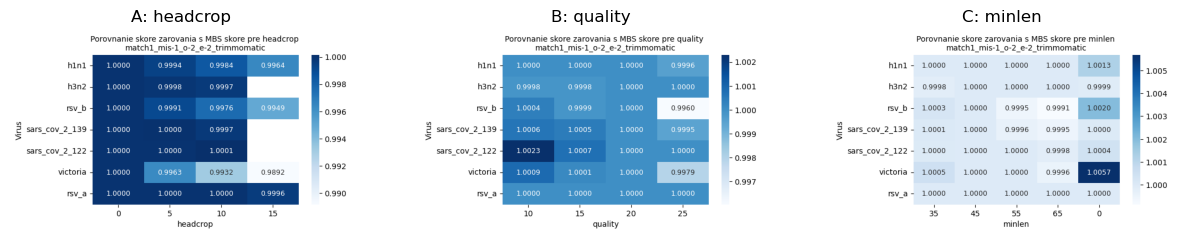

In [13]:
# Combine individual plots into one PNG file - with title

for alignment_score in ['match1_mis-1_o-2_e-2']:  # alignment_scores
    
    path_to_save_fig1 = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + '/'
    path_to_save_fig12 = 'heatmap_'
    path_to_save_fig2 = '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer

    images = [f'{path_to_save_fig1}{path_to_save_fig12}{param_col}{path_to_save_fig2}.png' for param_col in param_used_values]
    # combined_fig = plt.figure()

    # for i, image in enumerate(images, 1):
    #     combined_fig.add_subplot(1, len(images), i)
    #     img = plt.imread(image)
    #     plt.imshow(img)
    #     plt.axis('off')
    
    combined_fig, axes = plt.subplots(1, len(images), figsize=(15, 5))

    for i, (image, param_label) in enumerate(zip(images, param_used_values), 1):
        img = plt.imread(image)
        axes[i - 1].imshow(img)
        axes[i - 1].axis('off')
        axes[i - 1].set_title(param_label_abc[param_label])

    # Save the combined figure to a PNG file
    combined_fig.savefig(path_to_save_fig1 + 'combined_plots_heatmap_' + path_to_save_fig2 + '.png', bbox_inches='tight', dpi = 500)

    plt.show()


#zmenene farby heatmapy pre trimmovacie nastroje

0 :   13416.0 / 13416.0  =  1.0  ==>  0.0
5 :   13406.0 / 13416.0  =  0.9992546213476446  ==>  -0.07453786523553552
10 :   13391.0 / 13416.0  =  0.9981365533691116  ==>  -0.18634466308884434
15 :   13364.0 / 13416.0  =  0.9961240310077519  ==>  -0.3875968992248069
0 :   13179.0 / 13179.0  =  1.0  ==>  0.0
5 :   13177.0 / 13179.0  =  0.9998482434175583  ==>  -0.015175658244170886
10 :   13175.0 / 13179.0  =  0.9996964868351165  ==>  -0.030351316488352875
15 :   nan / 13179.0  =  nan  ==>  nan
0 :   15221.0 / 15221.0  =  1.0  ==>  0.0
5 :   15221.0 / 15221.0  =  1.0  ==>  0.0
10 :   15221.0 / 15221.0  =  1.0  ==>  0.0
15 :   15215.0 / 15221.0  =  0.999605807765587  ==>  -0.03941922344129489
0 :   15110.0 / 15110.0  =  1.0  ==>  0.0
5 :   15089.0 / 15110.0  =  0.9986101919258769  ==>  -0.13898080741231444
10 :   15069.0 / 15110.0  =  0.9972865651886168  ==>  -0.27134348113831974
15 :   15029.0 / 15110.0  =  0.9946393117140966  ==>  -0.5360688285903414
0 :   29764.0 / 29764.0  =  1.0  ==> 

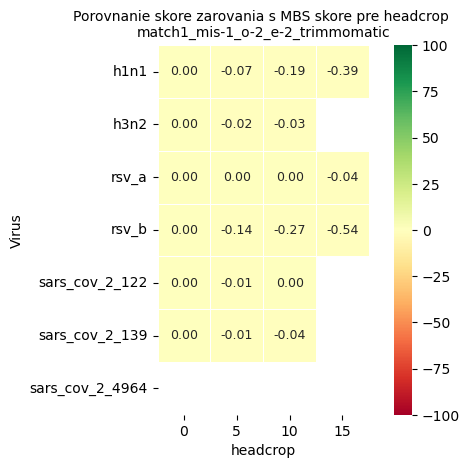

10 :   13408.0 / 13404.0  =  1.0002984183825723  ==>  0.029841838257227415
15 :   13408.0 / 13404.0  =  1.0002984183825723  ==>  0.029841838257227415
20 :   13404.0 / 13404.0  =  1.0  ==>  0.0
25 :   13398.0 / 13404.0  =  0.9995523724261415  ==>  -0.044762757385852225
10 :   13177.0 / 13179.0  =  0.9998482434175583  ==>  -0.015175658244170886
15 :   13177.0 / 13179.0  =  0.9998482434175583  ==>  -0.015175658244170886
20 :   13179.0 / 13179.0  =  1.0  ==>  0.0
25 :   13179.0 / 13179.0  =  1.0  ==>  0.0
10 :   15221.0 / 15221.0  =  1.0  ==>  0.0
15 :   15221.0 / 15221.0  =  1.0  ==>  0.0
20 :   15221.0 / 15221.0  =  1.0  ==>  0.0
25 :   15221.0 / 15221.0  =  1.0  ==>  0.0
10 :   15122.0 / 15084.0  =  1.0025192256695836  ==>  0.25192256695836246
15 :   15090.0 / 15084.0  =  1.0003977724741449  ==>  0.039777247414485295
20 :   15084.0 / 15084.0  =  1.0  ==>  0.0
25 :   15018.0 / 15084.0  =  0.9956245027844073  ==>  -0.43754972155927163
10 :   29827.0 / 29759.0  =  1.0022850230182465  ==>  

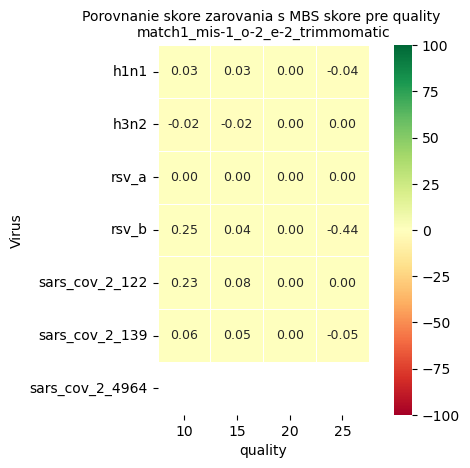

35 :   13395.0 / 13395.0  =  1.0  ==>  0.0
45 :   13395.0 / 13395.0  =  1.0  ==>  0.0
55 :   13395.0 / 13395.0  =  1.0  ==>  0.0
65 :   13395.0 / 13395.0  =  1.0  ==>  0.0
0 :   13416.0 / 13395.0  =  1.0015677491601345  ==>  0.15677491601344684
35 :   13177.0 / 13179.0  =  0.9998482434175583  ==>  -0.015175658244170886
45 :   13179.0 / 13179.0  =  1.0  ==>  0.0
55 :   13179.0 / 13179.0  =  1.0  ==>  0.0
65 :   13179.0 / 13179.0  =  1.0  ==>  0.0
0 :   13178.0 / 13179.0  =  0.9999241217087791  ==>  -0.007587829122090994
35 :   15221.0 / 15221.0  =  1.0  ==>  0.0
45 :   15221.0 / 15221.0  =  1.0  ==>  0.0
55 :   15221.0 / 15221.0  =  1.0  ==>  0.0
65 :   15221.0 / 15221.0  =  1.0  ==>  0.0
0 :   15221.0 / 15221.0  =  1.0  ==>  0.0
35 :   15080.0 / 15078.0  =  1.0001326435866826  ==>  0.013264358668263476
45 :   15078.0 / 15078.0  =  1.0  ==>  0.0
55 :   15071.0 / 15078.0  =  0.999535747446611  ==>  -0.04642525533889996
65 :   15071.0 / 15078.0  =  0.999535747446611  ==>  -0.0464252553388

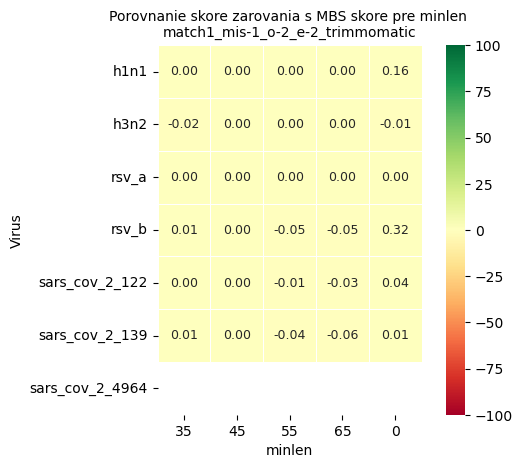

<Figure size 640x480 with 0 Axes>

In [269]:
# pre vsetky skorovacie schemy
for alignment_score in ['match1_mis-1_o-2_e-2']: #alignment_scores: 

    path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '.tsv'
    all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
    
    all_rd_samples = all_rd_samples[all_rd_samples.quality != 30]
    
    if not analyse_minlen0:
        all_rd_samples = all_rd_samples[all_rd_samples.minlen != 0]

    # ake parametre, ktorych hodnoty sa menili
    for param_col in param_names.keys():
        
        # print(param_col)

        params = param_names[param_col]

        rd_samples_param_median = pd.DataFrame(columns=params)

        # pre vsetky virusy
        for virus_x in samples_names.keys():

            # prazdny df (vyplneny '0')
            virus_param_median = pd.DataFrame([[0] * len(params)], columns=params)
            virus_df =  all_rd_samples[all_rd_samples.virus == virus_x]

            for param in params:
                
                param_med = virus_df[virus_df[param_col] == param].score.median()
                virus_param_median[param] = param_med

            virus_param_median['virus'] = virus_x

            rd_samples_param_median = pd.concat([rd_samples_param_median, virus_param_median], ignore_index=True)

        # print(rd_samples_param_median)

        mbs_param = mbs_params[param_col]
        rd_samples_param_median_diff = pd.DataFrame(columns=params)
        virus_param_median_diff  = pd.DataFrame([[0] * len(params)], columns=params)

        for i, row in rd_samples_param_median.iterrows():
            
            virus_param_median_diff['virus'] = row['virus']
                
            for param in params:
                
                # vz_med = row[param]/row[mbs_param]
                # virus_param_median_diff[param] = vz_med

                vz_med = row[param]/row[mbs_param]
                vz_med_perc = (vz_med - 1) * 100 # o ake percento sa hodnota zvysila/znizila
                virus_param_median_diff[param] = vz_med_perc
                print(param, ':  ', row[param], '/', row[mbs_param], ' = ', vz_med, ' ==> ', vz_med_perc)
                
            
            rd_samples_param_median_diff = pd.concat([rd_samples_param_median_diff, virus_param_median_diff], ignore_index=True)
                
        # print(rd_samples_param_median_diff)
        # plt.figure(figsize=(6,3))

        plt.clf()
        # Replace NaN with a specific value (e.g., -1)
        rd_samples_param_median_diff.fillna(-200, inplace=True)
        rd_samples_param_median_diff.set_index('virus', inplace=True)
        # Masking the -1 values
        mask = rd_samples_param_median_diff == -200
        ax = sns.heatmap(rd_samples_param_median_diff, annot=True, cmap='RdYlGn', linewidths=.5, mask=mask, vmin=-100, vmax=100, square=True, annot_kws={"size": 9}, fmt=".2f")
        # ax = sns.heatmap(rd_samples_param_median_diff.set_index('virus'), cmap="Blues", annot=True, annot_kws={"size": 9}, fmt=".4f")

        ax.set(xlabel=param_col, ylabel="Virus")

        # plot_title = 'Comparison of median of values for used parameter \n to median of scores of parameter for MBS '+ param_col + ' ' + '\n' + alignment_score + trimmer
        plot_title = 'Porovnanie skore zarovania s MBS skore pre '+ param_col + ' ' + '\n' + alignment_score + trimmer
        plt.title(plot_title, fontsize=10)
        # plt.gcf().set_size_inches(6, 3.5)

        path_to_save_fig = './data/result_metrics/comparison_MBS_params_score/' + alignment_score + "/heatmap_" + param_col + '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer + ".png"
        plt.savefig(path_to_save_fig, bbox_inches='tight')

        plt.show()

        plt.clf()



In [270]:
alignment_score + '_' + param_col + '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer 

'match1_mis-1_o-2_e-2_minlen_match1_mis-1_o-2_e-2_2024_3_28_trimmomatic'

['./data/result_metrics/comparison_MBS_params_score/match1_mis-1_o-2_e-2/heatmap_headcrop_match1_mis-1_o-2_e-2_2024_3_28_trimmomatic.png', './data/result_metrics/comparison_MBS_params_score/match1_mis-1_o-2_e-2/heatmap_quality_match1_mis-1_o-2_e-2_2024_3_28_trimmomatic.png', './data/result_metrics/comparison_MBS_params_score/match1_mis-1_o-2_e-2/heatmap_minlen_match1_mis-1_o-2_e-2_2024_3_28_trimmomatic.png']


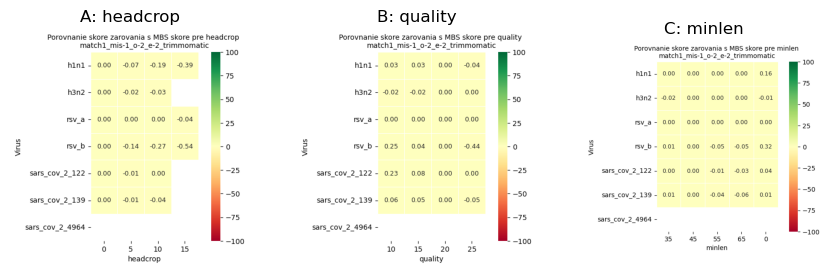

In [271]:
# Combine individual plots into one PNG file - with title

for alignment_score in ['match1_mis-1_o-2_e-2']:  # alignment_scores
    
    path_to_save_fig1 = "./data/result_metrics/comparison_MBS_params_score/" + alignment_score + '/'
    path_to_save_fig12 = 'heatmap_'
    path_to_save_fig2 = '_' + alignment_score + '_' + analyse_minlen0_path + date_generated + trimmer

    images = [f'{path_to_save_fig1}{path_to_save_fig12}{param_col}{path_to_save_fig2}.png' for param_col in list(param_names.keys())]
    
    print(images)
    combined_fig, axes = plt.subplots(1, len(images), figsize=(10.5, 5))

    for i, (image, param_label) in enumerate(zip(images, list(param_names.keys())), 1):
        img = plt.imread(image)
        axes[i - 1].imshow(img)
        axes[i - 1].axis('off')
        axes[i - 1].set_title(param_label_abc[param_label])

    # Save the combined figure to a PNG file
    combined_fig.savefig(path_to_save_fig1 + 'combined_plots_heatmap_' + path_to_save_fig2 + '.png', bbox_inches='tight', dpi = 500)

    plt.show()


In [255]:
analyse_minlen0

True

#skontrolovat ci sedi zarovnanie pre MBS sekvenciu (trimmomatic) s so sekvenciou ktora bola parametrami mbs ale prostrednictvnom nastroja cutadapt


In [15]:
# skontrolovat ci sedi zarovnanie pre MBS sekvenciu (trimmomatic) s so sekvenciou ktora bola parametrami mbs ale prostrednictvnom nastroja cutadapt
score_cols = ['virus', 'trimmomatic_score', 'cutadapt_score', 'diff', 'alignment_score']
all_score_df = pd.DataFrame(columns=score_cols)

for alignment_score in alignment_scores: #['match1_mis-1_o-2_e-2']: 

    path_to_rd_samples_trimmomatic = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated
    path_to_rd_samples_cutadapt = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_2024_3_5'
    all_rd_samples_trimmomatic = pd.read_csv(path_to_rd_samples + '_trimmomatic.tsv', sep='\t')
    all_rd_samples_cutadapt = pd.read_csv(path_to_rd_samples_cutadapt + '_cutadapt.tsv', sep='\t')
    
    all_rd_samples_cutadapt = all_rd_samples_cutadapt[all_rd_samples_cutadapt.consensus_baseline == 'MBS']
    all_rd_samples_trimmomatic = all_rd_samples_trimmomatic[all_rd_samples_trimmomatic.consensus_baseline == 'MBS']
    

    for virus in samples_names.keys():
        rd_samples_cutadapt_score = list(all_rd_samples_cutadapt[all_rd_samples_cutadapt.virus == virus].score)
        rd_samples_trimmomatic_score = list(all_rd_samples_trimmomatic[all_rd_samples_trimmomatic.virus == virus].score)
        
        if virus in list(all_rd_samples_cutadapt.virus):
            score_df = pd.DataFrame([[0] * len(score_cols)], columns=score_cols)
            score_df['virus'] = virus
            score_df['trimmomatic_score'] = rd_samples_trimmomatic_score[0]
            score_df['cutadapt_score'] = rd_samples_cutadapt_score[0]
            score_df['diff'] = abs(rd_samples_trimmomatic_score[0] - rd_samples_cutadapt_score[0])
            score_df['alignment_score'] = alignment_score
            all_score_df = pd.concat([all_score_df, score_df], ignore_index=True)
            # print(rd_samples_trimmomatic_score[0], rd_samples_cutadapt_score[0])

print('minlen0: ', analyse_minlen0)
all_score_df


minlen0:  True


virus  trimmomatic_score  cutadapt_score     diff  \
0             h1n1            13431.0         13429.0      2.0   
1             h3n2            13179.0         13178.0      1.0   
2            rsv_b            15216.0         15205.0     11.0   
3   sars_cov_2_139            29824.0         29827.0      3.0   
4   sars_cov_2_122            29797.0         29828.0     31.0   
5         victoria            13664.0         13673.0      9.0   
6            rsv_a            15221.0         15221.0      0.0   
7             h1n1            13431.0         13426.0      5.0   
8             h3n2            13179.0         13177.0      2.0   
9            rsv_b            15216.0         15186.0     30.0   
10  sars_cov_2_139            29824.0         29815.0      9.0   
11  sars_cov_2_122            29797.0         29814.0     17.0   
12        victoria            13664.0         13669.0      5.0   
13           rsv_a            15221.0         15221.0      0.0   
14            h1n1            13431.0         13426.0      5.0   
15            h3n2            13179.0         13177.0      2.0   
16           rsv_b            15216.0         15186.0     30.0   
17  sars_cov_2_139            29824.0         29815.0      9.0   
18  sars_cov_2_122            29797.0         29813.0     16.0   
19        victoria            13664.0         13669.0      5.0   
20           rsv_a            15221.0         15221.0      0.0   
21            h1n1            13431.0         26855.0  13424.0   
22            h3n2            13179.0         26355.0  13176.0   
23           rsv_b            15216.0         30391.0  15175.0   
24  sars_cov_2_139            29824.0         59642.0  29818.0   
25  sars_cov_2_122            29797.0         59639.0  29842.0   
26        victoria            13664.0         27342.0  13678.0   
27           rsv_a            15221.0         30442.0  15221.0   

         alignment_score  
0     match1_mis-1_o0_e0  
1     match1_mis-1_o0_e0  
2     match1_mis-1_o0_e0  
3     match1_mis-1_o0_e0  
4     match1_mis-1_o0_e0  
5     match1_mis-1_o0_e0  
6     match1_mis-1_o0_e0  
7   match1_mis-1_o-2_e-2  
8   match1_mis-1_o-2_e-2  
9   match1_mis-1_o-2_e-2  
10  match1_mis-1_o-2_e-2  
11  match1_mis-1_o-2_e-2  
12  match1_mis-1_o-2_e-2  
13  match1_mis-1_o-2_e-2  
14  match1_mis-1_o-5_e-1  
15  match1_mis-1_o-5_e-1  
16  match1_mis-1_o-5_e-1  
17  match1_mis-1_o-5_e-1  
18  match1_mis-1_o-5_e-1  
19  match1_mis-1_o-5_e-1  
20  match1_mis-1_o-5_e-1  
21  match2_mis-1_o-5_e-1  
22  match2_mis-1_o-5_e-1  
23  match2_mis-1_o-5_e-1  
24  match2_mis-1_o-5_e-1  
25  match2_mis-1_o-5_e-1  
26  match2_mis-1_o-5_e-1  
27  match2_mis-1_o-5_e-1

# get parameter set for each virus with the highest score  


In [15]:
date_generated = '2024_4_10'

In [25]:
# get parameter set for each virus where is there is the highest score  

for alignment_score in [alignment_scores[1]]: #['match1_mis-1_o-2_e-2']: 
    
    print(alignment_score)

    scores_df = pd.read_csv('./data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '.tsv', sep='\t')
    score_max_df = pd.DataFrame(columns = scores_df.columns.to_list())

    for virus in samples_names.keys():
        scores_df_virus = scores_df[scores_df.virus == virus]

        if not scores_df_virus.empty:
            score_max = max(scores_df_virus.score.to_list())

            print(virus, score_max)
            scores_df_virus = scores_df_virus[scores_df_virus.score == score_max]

            score_max_df = pd.concat([score_max_df, scores_df_virus])

score_max_df

path_to_save_score_max_df = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '_maxScores.tsv'
# score_max_df.to_csv(path_to_save_score_max_df, sep='\t', index=False)


match1_mis-1_o-2_e-2
h1n1 13418.0
h3n2 13179.0
rsv_a 15221.0
rsv_b 15138.0
sars_cov_2_122 29827.0
sars_cov_2_139 29805.0
sars_cov_2_4964 29843.0


#oznac kombinaciu parametrov pre virus, pri ktorej je dosiahnute maximalne skore

In [33]:
# alignment_score = alignment_scores[1]
# path_to_score_max_df = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '_maxScores.tsv'
# score_max_df = pd.read_csv(path_to_score_max_df, sep='\t'

# Create a MultiIndex for columns
columns = pd.MultiIndex.from_tuples([('virus', 'virus'),
                                     ('headcrop', 0),('headcrop', 5),('headcrop', 10),('headcrop', 15), 
                                    ('quality', 10), ('quality', 15), ('quality', 20), ('quality', 25), ('quality', 30), 
                                    ('minlen', 0), ('minlen', 35), ('minlen', 45), ('minlen', 55), ('minlen', 65),
                                    ('score', 'score')] 
                                    )
                                     
# Create a DataFrame with the MultiIndex columns
df = pd.DataFrame( columns=columns)


row_i = 0

for i, row in score_max_df.iterrows():

    virus_name = row['virus']
    df.loc[row_i, ('virus', 'virus')] = virus_name

    df.loc[row_i, ('headcrop', row['headcrop'])] = 'x'
    df.loc[row_i, ('quality', row['quality'])] = 'x'
    df.loc[row_i, ('minlen', row['minlen'])] = 'x'
    df.loc[row_i, ('score', 'score')] = row['score']
    
    row_i += 1


path_to_save_score_max_df = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '_maxScores_x.tsv'
# df.to_csv(path_to_save_score_max_df, sep='\t', index=False)

df

virus headcrop                quality                      \
               virus        0    5   10   15      10   15   20   25   30   
0               h1n1        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
1               h1n1        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
2               h1n1        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
3               h1n1        x  NaN  NaN  NaN     NaN    x  NaN  NaN  NaN   
4               h1n1        x  NaN  NaN  NaN     NaN    x  NaN  NaN  NaN   
..               ...      ...  ...  ...  ...     ...  ...  ...  ...  ...   
167  sars_cov_2_4964        x  NaN  NaN  NaN     NaN  NaN  NaN    x  NaN   
168  sars_cov_2_4964      NaN  NaN  NaN    x     NaN  NaN    x  NaN  NaN   
169  sars_cov_2_4964      NaN  NaN  NaN    x     NaN  NaN    x  NaN  NaN   
170  sars_cov_2_4964      NaN    x  NaN  NaN     NaN  NaN  NaN    x  NaN   
171  sars_cov_2_4964        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   

    minlen                        score  
         0   35   45   55   65    score  
0      NaN  NaN  NaN    x  NaN  13418.0  
1      NaN  NaN    x  NaN  NaN  13418.0  
2      NaN  NaN  NaN  NaN    x  13418.0  
3        x  NaN  NaN  NaN  NaN  13418.0  
4      NaN  NaN    x  NaN  NaN  13418.0  
..     ...  ...  ...  ...  ...      ...  
167    NaN    x  NaN  NaN  NaN  29843.0  
168    NaN  NaN  NaN  NaN    x  29843.0  
169    NaN  NaN  NaN    x  NaN  29843.0  
170    NaN    x  NaN  NaN  NaN  29843.0  
171    NaN  NaN    x  NaN  NaN  29843.0  

[172 rows x 16 columns]

In [155]:
path_to_score_max_df = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + trimmer + '_maxScores_x.tsv'
df = pd.read_csv(path_to_score_max_df, sep='\t')
df

virus headcrop headcrop.1  headcrop.2  headcrop.3 quality quality.1  \
0   virus        0          5        10.0        15.0      10        15   
1    h1n1        x        NaN         NaN         NaN       x       NaN   
2    h1n1        x        NaN         NaN         NaN       x       NaN   
3    h1n1        x        NaN         NaN         NaN     NaN         x   
4    h1n1        x        NaN         NaN         NaN       x       NaN   
..    ...      ...        ...         ...         ...     ...       ...   
82  rsv_a      NaN          x         NaN         NaN     NaN       NaN   
83  rsv_a      NaN          x         NaN         NaN     NaN       NaN   
84  rsv_a        x        NaN         NaN         NaN     NaN       NaN   
85  rsv_a        x        NaN         NaN         NaN     NaN       NaN   
86  rsv_a        x        NaN         NaN         NaN     NaN       NaN   

   quality.2 quality.3 quality.4 minlen minlen.1 minlen.2 minlen.3 minlen.4  \
0         20        25        30      0        0       35       45       55   
1        NaN       NaN       NaN    NaN      NaN      NaN      NaN        x   
2        NaN       NaN       NaN    NaN      NaN      NaN      NaN      NaN   
3        NaN       NaN       NaN    NaN      NaN      NaN        x      NaN   
4        NaN       NaN       NaN      x        x      NaN      NaN      NaN   
..       ...       ...       ...    ...      ...      ...      ...      ...   
82       NaN         x       NaN    NaN      NaN      NaN      NaN        x   
83       NaN         x       NaN    NaN      NaN      NaN      NaN      NaN   
84         x       NaN       NaN    NaN      NaN      NaN      NaN        x   
85         x       NaN       NaN    NaN      NaN      NaN      NaN      NaN   
86       NaN       NaN         x      x        x      NaN      NaN      NaN   

   minlen.5  
0        65  
1       NaN  
2         x  
3       NaN  
4       NaN  
..      ...  
82      NaN  
83        x  
84      NaN  
85        x  
86      NaN  

[87 rows x 16 columns]

In [34]:
# Exclude the column you don't want to consider
excluded_column = ['virus', 'score']
filtered_df = df.drop(excluded_column, axis=1)

# Find the row(s) that are most frequently presented
most_frequent_rows = filtered_df.apply(tuple, axis=1).value_counts().idxmax()

print(most_frequent_rows)
# Filter the original DataFrame to get the rows
result = df[df.drop(excluded_column, axis=1).apply(tuple, axis=1) == most_frequent_rows]

# print("Most frequent row(s):")
result


('x', nan, nan, nan, 'x', nan, nan, nan, nan, nan, nan, nan, 'x', nan)


/tmp/ipykernel_368963/1521587906.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  filtered_df = df.drop(excluded_column, axis=1)
/tmp/ipykernel_368963/1521587906.py:10: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  result = df[df.drop(excluded_column, axis=1).apply(tuple, axis=1) == most_frequent_rows]


virus headcrop                quality                      \
               virus        0    5   10   15      10   15   20   25   30   
0               h1n1        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
12              h3n2        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
50             rsv_a        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
94             rsv_b        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
98    sars_cov_2_122        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
109   sars_cov_2_139        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
126  sars_cov_2_4964        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   

    minlen                      score  
         0   35   45 55   65    score  
0      NaN  NaN  NaN  x  NaN  13418.0  
12     NaN  NaN  NaN  x  NaN  13179.0  
50     NaN  NaN  NaN  x  NaN  15221.0  
94     NaN  NaN  NaN  x  NaN  15138.0  
98     NaN  NaN  NaN  x  NaN  29827.0  
109    NaN  NaN  NaN  x  NaN  29805.0  
126    NaN  NaN  NaN  x  NaN  29843.0

In [35]:
filtered_df.apply(tuple, axis=1).value_counts()


(x, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, nan, x, nan)    7
(x, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, nan, nan, x)    7
(x, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, x, nan, nan)    7
(x, nan, nan, nan, x, nan, nan, nan, nan, nan, x, nan, nan, nan)    6
(x, nan, nan, nan, x, nan, nan, nan, nan, x, nan, nan, nan, nan)    5
                                                                   ..
(x, nan, nan, nan, nan, nan, nan, nan, x, nan, nan, x, nan, nan)    1
(x, nan, nan, nan, nan, nan, nan, nan, x, nan, nan, nan, x, nan)    1
(x, nan, nan, nan, nan, nan, nan, nan, x, nan, nan, nan, nan, x)    1
(nan, x, nan, nan, nan, nan, nan, nan, x, nan, nan, x, nan, nan)    1
(nan, nan, nan, x, nan, nan, x, nan, nan, nan, nan, nan, x, nan)    1
Length: 73, dtype: int64

In [36]:
# Exclude the column you don't want to consider
filtered_df = df.drop(excluded_column, axis=1)

# Find the row(s) that are most frequently presented
# most_frequent_rows = filtered_df.apply(tuple, axis=1).value_counts().idxmax()


# df[df.drop(excluded_column, axis=1).apply(tuple, axis=1).isin(most_frequent_rows[most_frequent_rows == max_count].index)]
x = 'x'
nan = np.nan

if trimmer == '_trimmomatic':
    # trimmomatic
    most_frequent_rows = [ # first rows from with maximal count: filtered_df.apply(tuple, axis=1).value_counts()
    (x, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, nan, x, nan),
    (x, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, nan, nan, x),
    (x, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, x, nan, nan),
    (x, nan, nan, nan, x, nan, nan, nan, nan, nan, x, nan, nan, nan) # len pre 6 virusov najvyssie skore
    ]

else: # cutadapt
    most_frequent_rows = [ # first rows from with maximal count: filtered_df.apply(tuple, axis=1).value_counts()
    # ('x', np.nan, np.nan, np.nan, np.nan, np.nan, 'x', np.nan, np.nan, 'x', 'x', np.nan, np.nan, np.nan, np.nan),
    # (x, np.nan, np.nan, np.nan, x, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, x),
    # (x, np.nan, np.nan, np.nan, np.nan, np.nan, x, np.nan, np.nan, np.nan, np.nan, x, np.nan, np.nan, np.nan)
    (x, nan, nan, nan, nan, nan, x, nan, nan, x, nan, nan, nan, nan),
    (x, nan, nan, nan, x, nan, nan, nan, nan, nan, nan, nan, nan, x),
    (x, nan, nan, nan, nan, nan, x, nan, nan, nan, x, nan, nan, nan)
    ]

most_frequent_rows

for most_frequent_row in most_frequent_rows:

    # Filter the original DataFrame to get the rows
    result = df[df.drop(excluded_column, axis=1).apply(tuple, axis=1) == most_frequent_row]

    print("Most frequent row(s):")
    print(result)



Most frequent row(s):
               virus headcrop                quality                      \
               virus        0    5   10   15      10   15   20   25   30   
0               h1n1        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
12              h3n2        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
50             rsv_a        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
94             rsv_b        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
98    sars_cov_2_122        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
109   sars_cov_2_139        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
126  sars_cov_2_4964        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   

    minlen                      score  
         0   35   45 55   65    score  
0      NaN  NaN  NaN  x  NaN  13418.0  
12     NaN  NaN  NaN  x  NaN  13179.0  
50     NaN  NaN  NaN  x  NaN  15221.0  
94     NaN  NaN  NaN  x  NaN  15138.0  
98     NaN  NaN  NaN  x  NaN  29827.0  
109    NaN  N

/tmp/ipykernel_368963/394811697.py:2: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  filtered_df = df.drop(excluded_column, axis=1)
/tmp/ipykernel_368963/394811697.py:36: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  result = df[df.drop(excluded_column, axis=1).apply(tuple, axis=1) == most_frequent_row]
/tmp/ipykernel_368963/394811697.py:36: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  result = df[df.drop(excluded_column, axis=1).apply(tuple, axis=1) == most_frequent_row]
/tmp/ipykernel_368963/394811697.py:36: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  result = df[df.drop(excluded_column, axis=1).apply(tuple, axis=1) == most_frequent_row]
/tmp/ipykernel_368963/394811697.py:36: PerformanceWarning: dropping on a non-lexsorted

In [178]:
result # ==> pre trimmomatic je najlepsie nastavenie parametrov, pri ktorom vsetky virusy mali najvyssie skore zarovnani:
# prienikom najvyssich skore pre dany virus sme zistili:
        # headcrop = 0, quality = 10 a minlen = 45, 55, 65

virus headcrop                quality                      \
               virus        0    5   10   15      10   15   20   25   30   
1               h1n1        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
37              h3n2        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
38             rsv_a        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
95             rsv_b        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
105   sars_cov_2_122        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
110   sars_cov_2_139        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   
123  sars_cov_2_4964        x  NaN  NaN  NaN       x  NaN  NaN  NaN  NaN   

    minlen                         
         0    0   35 45   55   65  
1      NaN  NaN  NaN  x  NaN  NaN  
37     NaN  NaN  NaN  x  NaN  NaN  
38     NaN  NaN  NaN  x  NaN  NaN  
95     NaN  NaN  NaN  x  NaN  NaN  
105    NaN  NaN  NaN  x  NaN  NaN  
110    NaN  NaN  NaN  x  NaN  NaN  
123    NaN  NaN  NaN  x  NaN  NaN

In [190]:
result  # ==> pre cutadapt je najlepsie nastavenie parametrov, pri ktorom vsetky virusy mali najvyssie skore zarovnani:
# prienikom najvyssich skore pre dany virus sme zistili:
        # headcrop = 0, quality = 20 a minlen = 0, 35
        # headcrop = 0, quality = 10 a minlen = 65


virus headcrop                quality                   minlen  \
             virus        0    5   10   15      10   15 20   25   30      0   
15            h1n1        x  NaN  NaN  NaN     NaN  NaN  x  NaN  NaN    NaN   
37           rsv_a        x  NaN  NaN  NaN     NaN  NaN  x  NaN  NaN    NaN   
69  sars_cov_2_122        x  NaN  NaN  NaN     NaN  NaN  x  NaN  NaN    NaN   
80  sars_cov_2_139        x  NaN  NaN  NaN     NaN  NaN  x  NaN  NaN    NaN   

                           
      0 35   45   55   65  
15  NaN  x  NaN  NaN  NaN  
37  NaN  x  NaN  NaN  NaN  
69  NaN  x  NaN  NaN  NaN  
80  NaN  x  NaN  NaN  NaN

In [192]:
score_max_df

virus   trimmer quality headcrop minlen    score  match gap  \
14             h1n1  cutadapt      10        0     55  13418.0  13425   0   
15             h1n1  cutadapt      10        0     65  13418.0  13425   0   
16             h1n1  cutadapt      15        0     45  13418.0  13425   0   
17             h1n1  cutadapt      10        0      0  13418.0  13425   0   
18             h1n1  cutadapt      10        0     45  13418.0  13425   0   
..              ...       ...     ...      ...    ...      ...    ...  ..   
129  sars_cov_2_139  cutadapt      10        0     35  29805.0  29820   0   
130  sars_cov_2_139  cutadapt      20        0     55  29805.0  29820   0   
131  sars_cov_2_139  cutadapt      20        0     65  29805.0  29820   0   
132  sars_cov_2_139  cutadapt      15        0     55  29805.0  29820   0   
133  sars_cov_2_139  cutadapt      10        0      0  29805.0  29820   0   

    mismatch N_count  score_agg sample_id pairwiseAligner_set_score  \
14         7       7    13411.0      1337      match1_mis-1_o-2_e-2   
15         7       7    13411.0      1337      match1_mis-1_o-2_e-2   
16         7       7    13411.0      1337      match1_mis-1_o-2_e-2   
17         7       7    13411.0      1337      match1_mis-1_o-2_e-2   
18         7       7    13411.0      1337      match1_mis-1_o-2_e-2   
..       ...     ...        ...       ...                       ...   
129       15      24    29790.0        BA      match1_mis-1_o-2_e-2   
130       15      24    29790.0        BA      match1_mis-1_o-2_e-2   
131       15      24    29790.0        BA      match1_mis-1_o-2_e-2   
132       15      24    29790.0        BA      match1_mis-1_o-2_e-2   
133       15      24    29790.0        BA      match1_mis-1_o-2_e-2   

    consensus_baseline consensus_baseline_virus  
14                 NaN                      NaN  
15                 NaN                      NaN  
16                 NaN                      NaN  
17                 NaN                      NaN  
18                 NaN                      NaN  
..                 ...                      ...  
129                NaN                      NaN  
130                NaN                      NaN  
131                NaN                      NaN  
132                NaN                      NaN  
133                NaN                      NaN  

[86 rows x 15 columns]

#porovanie algoritmov pre proces orezavania nastrojom Trimmomatic a cutadapt


In [9]:
# porovanie proces orezavania nastrojom Trimmomatic a cutadapt
quality_threshold = 10
read_quality = [42, 40, 26, 27, 8, 7, 11, 4, 2, 3]
cutadapt_quality_p = [x - 10 for x in read_quality]
print(cutadapt_quality_p)

cutadapt_sum = [0]
for v in reversed(cutadapt_quality_p):
    s = cutadapt_sum[len(cutadapt_sum)-1] + v
    cutadapt_sum.append(s)
    if s > 0:
        print(len(cutadapt_sum))

cutadapt_sum

[32, 30, 16, 17, -2, -3, 1, -6, -8, -7]
9
10
11


[0, -7, -15, -21, -20, -23, -25, -8, 8, 38, 70]

In [18]:
trimmomatic_quality_p = read_quality[::-1]
trimmomatic_quality_p
trimmomatic_sum = [0]
trimmomatic_avg = []
for i in range(1, len(trimmomatic_quality_p)):
    s = trimmomatic_quality_p[i-1] + trimmomatic_sum[i-1]
    print(s, i)
    trimmomatic_sum.append(s)
    trimmomatic_avg.append(s/i)

print(trimmomatic_sum)
print(trimmomatic_avg)

3 1
5 2
9 3
20 4
27 5
35 6
62 7
88 8
128 9
[0, 3, 5, 9, 20, 27, 35, 62, 88, 128]
[3.0, 2.5, 3.0, 5.0, 5.4, 5.833333333333333, 8.857142857142858, 11.0, 14.222222222222221]


#cutadapt daval podobne vysledky pre hodnoteni pomocou podielu medianov

#preto sa pozriet ake vysledne skore zarovania pre jednotlive vysledne konsenzus sekvencie boli ==>  
#==> vacsinou velmi podobne, akurat pri viruse Victoria boli ovela vyssie rozdiely

In [1]:
# cutadapt daval podobne vysledky pre hodnoteni pomocou podielu medianov
# preto sa pozriet ake vysledne skore zarovania pre jednotlive vysledne konsenzus sekvencie boli ==>  
# ==> vacsinou velmi podobne, akurat pri viruse Victoria boli ovela vyssie rozdiely  
  
import pandas as pd
from collections import Counter


samples_names = {'h1n1': 'run230320_UVZ_BA_23-vsp-1337_',
                 'h3n2': 'run230320_UVZ_BA_23-vsp-2129_',
                 'rsv_b': 'run230320_UVZ_BA_23-vsp-902_', 
                 'sars_cov_2_139': 'uvzsr-BA_24_00002-A09-BA_24_00000139_',
                 'sars_cov_2_122': 'uvzsr-BA_24_00001-G12-BA_24_00000122_',
                 'victoria': 'run230320_UVZ_BA_23-vsp-2036_',
                 'rsv_a': 'run230320_UVZ_BA_23-vsp-1658_'
                 }

df = pd.read_csv('./data/result_metrics/results_all_viruses/results_all_viruses_match1_mis-1_o-2_e-2_2024_3_5_cutadapt.tsv', sep='\t')
df

for virus in samples_names.keys():
    df_virus = df[df.virus == virus]
    print(virus, Counter(df_virus['score'].to_list()))

h1n1 Counter({13426.0: 20, 13428.0: 12, 13430.0: 3})
h3n2 Counter({13177.0: 24, 13175.0: 6, 13179.0: 3})
rsv_b Counter({15186.0: 20, 15180.0: 12, 15178.0: 1})
sars_cov_2_139 Counter({29815.0: 22, 29813.0: 11})
sars_cov_2_122 Counter({29814.0: 26, 29816.0: 7})
victoria Counter({13669.0: 20, 13645.0: 12, 13673.0: 1})
rsv_a Counter({15221.0: 33})


In [81]:
df = pd.read_csv('./data/result_metrics/results_all_viruses/results_all_viruses_match1_mis-1_o-2_e-2_2024_3_28_cutadapt.tsv', sep='\t')
df

for virus in samples_names.keys():
    df_virus = df[df.virus == virus]
    print(virus, Counter(df_virus['score'].to_list()))

h1n1 Counter({13418.0: 21, 13416.0: 12, 13414.0: 2})
h3n2 Counter({13177.0: 24, 13175.0: 6, 13179.0: 3})
rsv_b Counter({15138.0: 21, 15140.0: 12})
sars_cov_2_139 Counter({29805.0: 15, 29803.0: 13, 29801.0: 5})
sars_cov_2_122 Counter({29827.0: 24, 29825.0: 7, 29829.0: 2})
sars_cov_2_4964 Counter()
rsv_a Counter({15221.0: 33})


# Heatmaps for tested parameters for variant caller tools

In [3]:
samples_names = {'h1n1': 'run230320_UVZ_BA_23-vsp-1337_',
                 'h3n2': 'run230320_UVZ_BA_23-vsp-2129_',
                 'rsv_a': 'run230320_UVZ_BA_23-vsp-1658_',
                 'rsv_b': 'run230320_UVZ_BA_23-vsp-902_',
                 'sars_cov_2_122': 'uvzsr-BA_24_00001-G12-BA_24_00000122_',
                 'sars_cov_2_139': 'uvzsr-BA_24_00002-A09-BA_24_00000139_',
                 'sars_cov_2_4964': 'run230710_UVZ_BA_23-vsp-4964'
                 }

tools_vc = ['bcftools', 'freebayes', 'ivar']

min_base_qualities = [0, 10, 13, 20]
min_map_qualities =  [0, 15, 30]
gap_fracs = [0.002, 0.05, 0.1]
redo_baqs = [0, 1]
adjust_mqs = [0, 25, 50]
ploidies = [1, 2]

params_variant_callers = {
   'freebayes': {'params_used': ['min_base_qualities', 'min_map_qualities', 'ploidies'], 
                 'min_base_qualities': min_base_qualities, 
                 'min_map_qualities': min_map_qualities, 
                 'ploidies': ploidies
                 },

    'bcftools': {'params_used': ['min_base_qualities', 'min_map_qualities', 'gap_fracs', 'redo_baqs', 'adjust_mqs', 'ploidies'],
                 'min_base_qualities': min_base_qualities, 
                 'min_map_qualities': min_map_qualities,
                 'gap_fracs': gap_fracs,
                 'redo_baqs': redo_baqs,
                 'adjust_mqs': adjust_mqs,
                 'ploidies': ploidies
                 },
    'ivar': {'params_used': ['min_base_qualities', 'min_map_qualities', 'redo_baqs'],
             'min_base_qualities': min_base_qualities, 
             'min_map_qualities': min_map_qualities,
             'redo_baqs': redo_baqs
             }
    }

param_abbr = {
    'min_base_qualities': 'minbq',
    'min_map_qualities': 'minmq',
    'gap_fracs': 'gap_frac',
    'redo_baqs': 'redo_baq',
    'adjust_mqs': 'adjust_mq',
    'redo_baqs': 'redo_baq',
    'ploidies': 'ploidy'
}


mbs_set_params_variant_callers = {
    'freebayes': {
        'min_base_qualities': 20,
        'min_map_qualities': 15,
        'ploidies': 2
    },
    'bcftools': {
        'min_base_qualities': 13,
        'min_map_qualities': 0,
        'gap_fracs': 0.05,
        'redo_baqs': 1,
        'adjust_mqs': 50,
        'ploidies': 2
    },
    'ivar': {
        'min_base_qualities': 13,
        'min_map_qualities': 15,
        'redo_baqs': 0 # no-BAQ = 1
        }
}



In [2]:
date_generated = '2024_3_28'


Variant_caller:  bcftools
min_base_qualities
Params:  [0, 10, 13, 20]
rd_samples_param_median:      0  10  13  20            virus param_name variant_caller      mbs
1 NaN NaN NaN NaN             h1n1      minbq       bcftools  13420.0
2 NaN NaN NaN NaN             h3n2      minbq       bcftools  13177.0
3 NaN NaN NaN NaN            rsv_a      minbq       bcftools  14793.0
4 NaN NaN NaN NaN            rsv_b      minbq       bcftools  14960.0
5 NaN NaN NaN NaN   sars_cov_2_122      minbq       bcftools  29765.0
6 NaN NaN NaN NaN   sars_cov_2_139      minbq       bcftools  29755.0
7 NaN NaN NaN NaN  sars_cov_2_4964      minbq       bcftools  29829.0
0 :   nan / 13420.0  =  nan  ==>  nan
10 :   nan / 13420.0  =  nan  ==>  nan
13 :   nan / 13420.0  =  nan  ==>  nan
20 :   nan / 13420.0  =  nan  ==>  nan
rd_samples_param_median_diff:       0   10   13   20 virus
0  NaN  NaN  NaN  NaN  h1n1
0 :   nan / 13177.0  =  nan  ==>  nan
10 :   nan / 13177.0  =  nan  ==>  nan
13 :   nan / 13177.0  = 

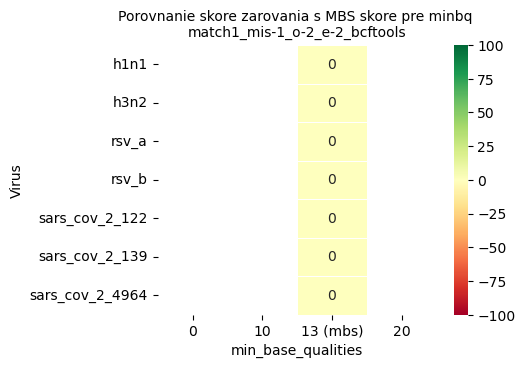

min_map_qualities
Params:  [0, 15, 30]
rd_samples_param_median:      0  15  30            virus param_name variant_caller      mbs
1 NaN NaN NaN             h1n1      minmq       bcftools  13420.0
2 NaN NaN NaN             h3n2      minmq       bcftools  13177.0
3 NaN NaN NaN            rsv_a      minmq       bcftools  14793.0
4 NaN NaN NaN            rsv_b      minmq       bcftools  14960.0
5 NaN NaN NaN   sars_cov_2_122      minmq       bcftools  29765.0
6 NaN NaN NaN   sars_cov_2_139      minmq       bcftools  29755.0
7 NaN NaN NaN  sars_cov_2_4964      minmq       bcftools  29829.0
0 :   nan / 13420.0  =  nan  ==>  nan
15 :   nan / 13420.0  =  nan  ==>  nan
30 :   nan / 13420.0  =  nan  ==>  nan
rd_samples_param_median_diff:       0   15   30 virus
0  NaN  NaN  NaN  h1n1
0 :   nan / 13177.0  =  nan  ==>  nan
15 :   nan / 13177.0  =  nan  ==>  nan
30 :   nan / 13177.0  =  nan  ==>  nan
rd_samples_param_median_diff:       0   15   30 virus
0  NaN  NaN  NaN  h1n1
1  NaN  NaN  NaN  h3n

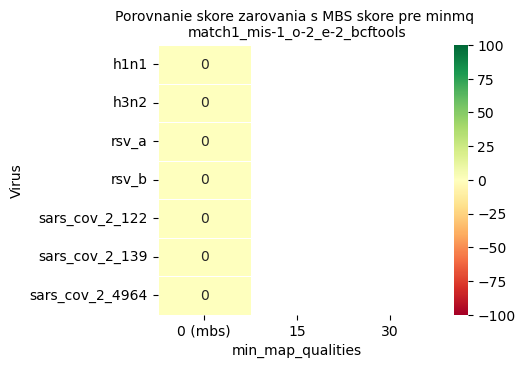

gap_fracs
Params:  [0.002, 0.05, 0.1]
rd_samples_param_median:     0.002  0.05  0.1            virus param_name variant_caller      mbs
1    NaN   NaN  NaN             h1n1   gap_frac       bcftools  13420.0
2    NaN   NaN  NaN             h3n2   gap_frac       bcftools  13177.0
3    NaN   NaN  NaN            rsv_a   gap_frac       bcftools  14793.0
4    NaN   NaN  NaN            rsv_b   gap_frac       bcftools  14960.0
5    NaN   NaN  NaN   sars_cov_2_122   gap_frac       bcftools  29765.0
6    NaN   NaN  NaN   sars_cov_2_139   gap_frac       bcftools  29755.0
7    NaN   NaN  NaN  sars_cov_2_4964   gap_frac       bcftools  29829.0
0.002 :   nan / 13420.0  =  nan  ==>  nan
0.05 :   nan / 13420.0  =  nan  ==>  nan
0.1 :   nan / 13420.0  =  nan  ==>  nan
rd_samples_param_median_diff:    0.002 0.05  0.1 virus
0   NaN  NaN  NaN  h1n1
0.002 :   nan / 13177.0  =  nan  ==>  nan
0.05 :   nan / 13177.0  =  nan  ==>  nan
0.1 :   nan / 13177.0  =  nan  ==>  nan
rd_samples_param_median_diff:    0.

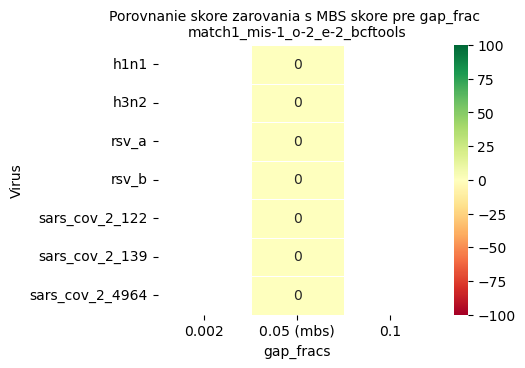

redo_baqs
Params:  [0, 1]
rd_samples_param_median:      0   1            virus param_name variant_caller      mbs
1 NaN NaN             h1n1   redo_baq       bcftools  13420.0
2 NaN NaN             h3n2   redo_baq       bcftools  13177.0
3 NaN NaN            rsv_a   redo_baq       bcftools  14793.0
4 NaN NaN            rsv_b   redo_baq       bcftools  14960.0
5 NaN NaN   sars_cov_2_122   redo_baq       bcftools  29765.0
6 NaN NaN   sars_cov_2_139   redo_baq       bcftools  29755.0
7 NaN NaN  sars_cov_2_4964   redo_baq       bcftools  29829.0
0 :   nan / 13420.0  =  nan  ==>  nan
1 :   nan / 13420.0  =  nan  ==>  nan
rd_samples_param_median_diff:       0    1 virus
0  NaN  NaN  h1n1
0 :   nan / 13177.0  =  nan  ==>  nan
1 :   nan / 13177.0  =  nan  ==>  nan
rd_samples_param_median_diff:       0    1 virus
0  NaN  NaN  h1n1
1  NaN  NaN  h3n2
0 :   nan / 14793.0  =  nan  ==>  nan
1 :   nan / 14793.0  =  nan  ==>  nan
rd_samples_param_median_diff:       0    1  virus
0  NaN  NaN   h1n1
1  

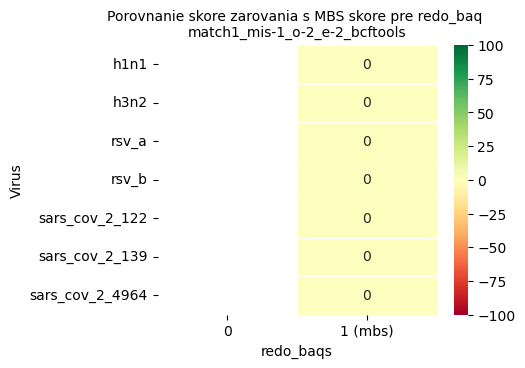

adjust_mqs
Params:  [0, 25, 50]
rd_samples_param_median:      0  25  50            virus param_name variant_caller      mbs
1 NaN NaN NaN             h1n1  adjust_mq       bcftools  13420.0
2 NaN NaN NaN             h3n2  adjust_mq       bcftools  13177.0
3 NaN NaN NaN            rsv_a  adjust_mq       bcftools  14793.0
4 NaN NaN NaN            rsv_b  adjust_mq       bcftools  14960.0
5 NaN NaN NaN   sars_cov_2_122  adjust_mq       bcftools  29765.0
6 NaN NaN NaN   sars_cov_2_139  adjust_mq       bcftools  29755.0
7 NaN NaN NaN  sars_cov_2_4964  adjust_mq       bcftools  29829.0
0 :   nan / 13420.0  =  nan  ==>  nan
25 :   nan / 13420.0  =  nan  ==>  nan
50 :   nan / 13420.0  =  nan  ==>  nan
rd_samples_param_median_diff:       0   25   50 virus
0  NaN  NaN  NaN  h1n1
0 :   nan / 13177.0  =  nan  ==>  nan
25 :   nan / 13177.0  =  nan  ==>  nan
50 :   nan / 13177.0  =  nan  ==>  nan
rd_samples_param_median_diff:       0   25   50 virus
0  NaN  NaN  NaN  h1n1
1  NaN  NaN  NaN  h3n2
0 :  

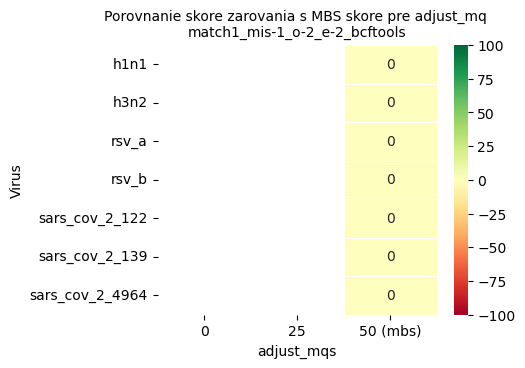

ploidies
Params:  [1, 2]
rd_samples_param_median:      1   2            virus param_name variant_caller      mbs
1 NaN NaN             h1n1     ploidy       bcftools  13420.0
2 NaN NaN             h3n2     ploidy       bcftools  13177.0
3 NaN NaN            rsv_a     ploidy       bcftools  14793.0
4 NaN NaN            rsv_b     ploidy       bcftools  14960.0
5 NaN NaN   sars_cov_2_122     ploidy       bcftools  29765.0
6 NaN NaN   sars_cov_2_139     ploidy       bcftools  29755.0
7 NaN NaN  sars_cov_2_4964     ploidy       bcftools  29829.0
1 :   nan / 13420.0  =  nan  ==>  nan
2 :   nan / 13420.0  =  nan  ==>  nan
rd_samples_param_median_diff:       1    2 virus
0  NaN  NaN  h1n1
1 :   nan / 13177.0  =  nan  ==>  nan
2 :   nan / 13177.0  =  nan  ==>  nan
rd_samples_param_median_diff:       1    2 virus
0  NaN  NaN  h1n1
1  NaN  NaN  h3n2
1 :   nan / 14793.0  =  nan  ==>  nan
2 :   nan / 14793.0  =  nan  ==>  nan
rd_samples_param_median_diff:       1    2  virus
0  NaN  NaN   h1n1
1  N

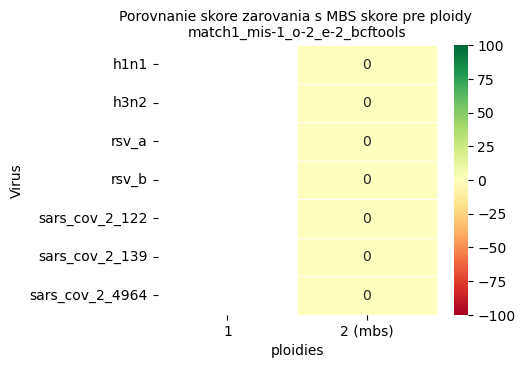


Variant_caller:  freebayes
min_base_qualities
Params:  [0, 10, 13, 20]
rd_samples_param_median:      0  10  13  20            virus param_name variant_caller      mbs
1 NaN NaN NaN NaN             h1n1      minbq      freebayes  13422.0
2 NaN NaN NaN NaN             h3n2      minbq      freebayes  13179.0
3 NaN NaN NaN NaN            rsv_a      minbq      freebayes  14793.0
4 NaN NaN NaN NaN            rsv_b      minbq      freebayes  14960.0
5 NaN NaN NaN NaN   sars_cov_2_122      minbq      freebayes  29775.0
6 NaN NaN NaN NaN   sars_cov_2_139      minbq      freebayes  29743.0
7 NaN NaN NaN NaN  sars_cov_2_4964      minbq      freebayes  29843.0
0 :   nan / 13422.0  =  nan  ==>  nan
10 :   nan / 13422.0  =  nan  ==>  nan
13 :   nan / 13422.0  =  nan  ==>  nan
20 :   nan / 13422.0  =  nan  ==>  nan
rd_samples_param_median_diff:       0   10   13   20 virus
0  NaN  NaN  NaN  NaN  h1n1
0 :   nan / 13179.0  =  nan  ==>  nan
10 :   nan / 13179.0  =  nan  ==>  nan
13 :   nan / 13179.0  =

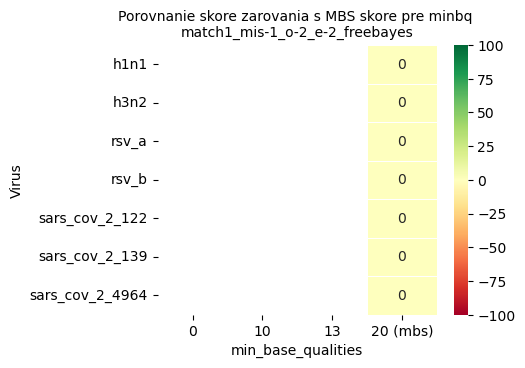

min_map_qualities
Params:  [0, 15, 30]
rd_samples_param_median:      0  15  30            virus param_name variant_caller      mbs
1 NaN NaN NaN             h1n1      minmq      freebayes  13422.0
2 NaN NaN NaN             h3n2      minmq      freebayes  13179.0
3 NaN NaN NaN            rsv_a      minmq      freebayes  14793.0
4 NaN NaN NaN            rsv_b      minmq      freebayes  14960.0
5 NaN NaN NaN   sars_cov_2_122      minmq      freebayes  29775.0
6 NaN NaN NaN   sars_cov_2_139      minmq      freebayes  29743.0
7 NaN NaN NaN  sars_cov_2_4964      minmq      freebayes  29843.0
0 :   nan / 13422.0  =  nan  ==>  nan
15 :   nan / 13422.0  =  nan  ==>  nan
30 :   nan / 13422.0  =  nan  ==>  nan
rd_samples_param_median_diff:       0   15   30 virus
0  NaN  NaN  NaN  h1n1
0 :   nan / 13179.0  =  nan  ==>  nan
15 :   nan / 13179.0  =  nan  ==>  nan
30 :   nan / 13179.0  =  nan  ==>  nan
rd_samples_param_median_diff:       0   15   30 virus
0  NaN  NaN  NaN  h1n1
1  NaN  NaN  NaN  h3n

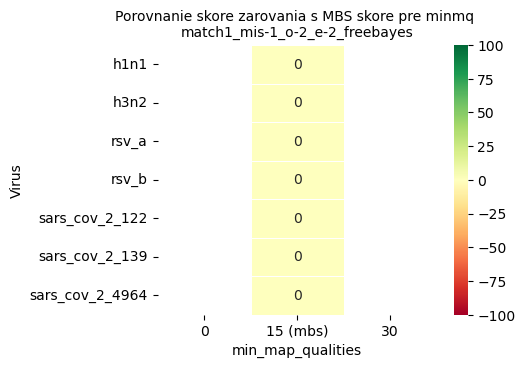

ploidies
Params:  [1, 2]
rd_samples_param_median:      1   2            virus param_name variant_caller      mbs
1 NaN NaN             h1n1     ploidy      freebayes  13422.0
2 NaN NaN             h3n2     ploidy      freebayes  13179.0
3 NaN NaN            rsv_a     ploidy      freebayes  14793.0
4 NaN NaN            rsv_b     ploidy      freebayes  14960.0
5 NaN NaN   sars_cov_2_122     ploidy      freebayes  29775.0
6 NaN NaN   sars_cov_2_139     ploidy      freebayes  29743.0
7 NaN NaN  sars_cov_2_4964     ploidy      freebayes  29843.0
1 :   nan / 13422.0  =  nan  ==>  nan
2 :   nan / 13422.0  =  nan  ==>  nan
rd_samples_param_median_diff:       1    2 virus
0  NaN  NaN  h1n1
1 :   nan / 13179.0  =  nan  ==>  nan
2 :   nan / 13179.0  =  nan  ==>  nan
rd_samples_param_median_diff:       1    2 virus
0  NaN  NaN  h1n1
1  NaN  NaN  h3n2
1 :   nan / 14793.0  =  nan  ==>  nan
2 :   nan / 14793.0  =  nan  ==>  nan
rd_samples_param_median_diff:       1    2  virus
0  NaN  NaN   h1n1
1  N

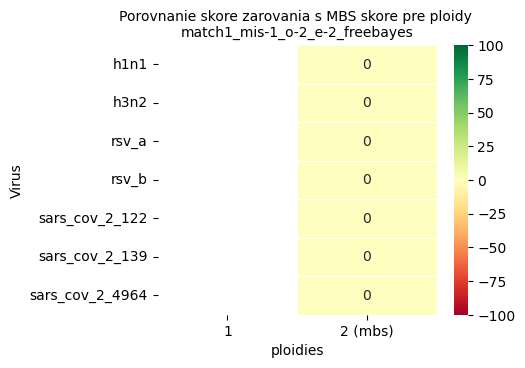


Variant_caller:  ivar
min_base_qualities
Params:  [0, 10, 13, 20]
rd_samples_param_median:      0  10  13  20            virus param_name variant_caller      mbs
1 NaN NaN NaN NaN             h1n1      minbq           ivar  13414.0
2 NaN NaN NaN NaN             h3n2      minbq           ivar  13179.0
3 NaN NaN NaN NaN            rsv_a      minbq           ivar  15221.0
4 NaN NaN NaN NaN            rsv_b      minbq           ivar  15084.0
5 NaN NaN NaN NaN   sars_cov_2_122      minbq           ivar  29759.0
6 NaN NaN NaN NaN   sars_cov_2_139      minbq           ivar  29795.0
7 NaN NaN NaN NaN  sars_cov_2_4964      minbq           ivar  29843.0
0 :   nan / 13414.0  =  nan  ==>  nan
10 :   nan / 13414.0  =  nan  ==>  nan
13 :   nan / 13414.0  =  nan  ==>  nan
20 :   nan / 13414.0  =  nan  ==>  nan
rd_samples_param_median_diff:       0   10   13   20 virus
0  NaN  NaN  NaN  NaN  h1n1
0 :   nan / 13179.0  =  nan  ==>  nan
10 :   nan / 13179.0  =  nan  ==>  nan
13 :   nan / 13179.0  =  nan

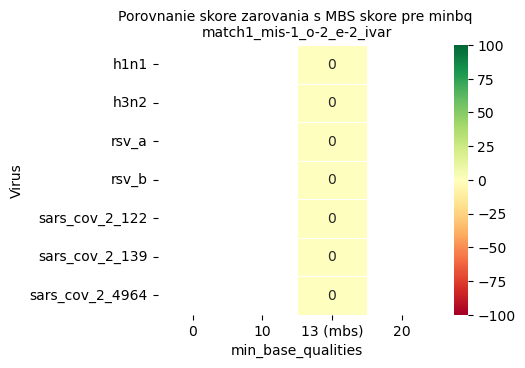

min_map_qualities
Params:  [0, 15, 30]
rd_samples_param_median:      0  15  30            virus param_name variant_caller      mbs
1 NaN NaN NaN             h1n1      minmq           ivar  13414.0
2 NaN NaN NaN             h3n2      minmq           ivar  13179.0
3 NaN NaN NaN            rsv_a      minmq           ivar  15221.0
4 NaN NaN NaN            rsv_b      minmq           ivar  15084.0
5 NaN NaN NaN   sars_cov_2_122      minmq           ivar  29759.0
6 NaN NaN NaN   sars_cov_2_139      minmq           ivar  29795.0
7 NaN NaN NaN  sars_cov_2_4964      minmq           ivar  29843.0
0 :   nan / 13414.0  =  nan  ==>  nan
15 :   nan / 13414.0  =  nan  ==>  nan
30 :   nan / 13414.0  =  nan  ==>  nan
rd_samples_param_median_diff:       0   15   30 virus
0  NaN  NaN  NaN  h1n1
0 :   nan / 13179.0  =  nan  ==>  nan
15 :   nan / 13179.0  =  nan  ==>  nan
30 :   nan / 13179.0  =  nan  ==>  nan
rd_samples_param_median_diff:       0   15   30 virus
0  NaN  NaN  NaN  h1n1
1  NaN  NaN  NaN  h3n

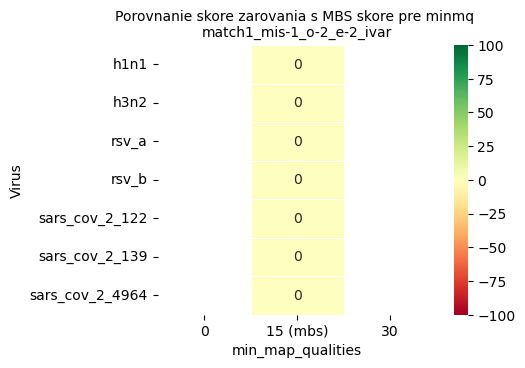

redo_baqs
Params:  [0, 1]
rd_samples_param_median:      0   1            virus param_name variant_caller      mbs
1 NaN NaN             h1n1   redo_baq           ivar  13414.0
2 NaN NaN             h3n2   redo_baq           ivar  13179.0
3 NaN NaN            rsv_a   redo_baq           ivar  15221.0
4 NaN NaN            rsv_b   redo_baq           ivar  15084.0
5 NaN NaN   sars_cov_2_122   redo_baq           ivar  29759.0
6 NaN NaN   sars_cov_2_139   redo_baq           ivar  29795.0
7 NaN NaN  sars_cov_2_4964   redo_baq           ivar  29843.0
0 :   nan / 13414.0  =  nan  ==>  nan
1 :   nan / 13414.0  =  nan  ==>  nan
rd_samples_param_median_diff:       0    1 virus
0  NaN  NaN  h1n1
0 :   nan / 13179.0  =  nan  ==>  nan
1 :   nan / 13179.0  =  nan  ==>  nan
rd_samples_param_median_diff:       0    1 virus
0  NaN  NaN  h1n1
1  NaN  NaN  h3n2
0 :   nan / 15221.0  =  nan  ==>  nan
1 :   nan / 15221.0  =  nan  ==>  nan
rd_samples_param_median_diff:       0    1  virus
0  NaN  NaN   h1n1
1  

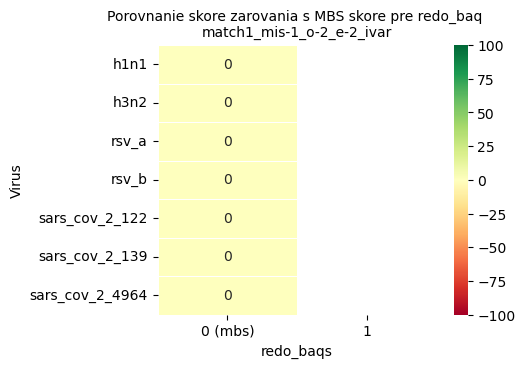

<Figure size 640x480 with 0 Axes>

In [4]:
# pre vsetky skorovacie schemy
for alignment_score in ['match1_mis-1_o-2_e-2']: #alignment_scores: 

    path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + '_variant_callers.tsv'
    
    for variant_caller in tools_vc:
        print()
        print('Variant_caller: ', variant_caller)

        all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
        all_rd_samples = all_rd_samples[all_rd_samples.variant_caller == variant_caller]
        # ake nazvy parametrov, ktorych hodnoty sa menili
        for param_col_name in params_variant_callers[variant_caller]['params_used']: # param_names.keys():
            
            print(param_col_name)
            
            # skratka nazvu, ktora je zapisana v tsv
            param_col = param_abbr[param_col_name]

            # hodnoty testovanych parametrov
            params = params_variant_callers[variant_caller][param_col_name] # param_names[param_abbr[param_col]]
            print('Params: ', params)

            df_column_names = list(params)
            df_column_names.append('virus')
            df_column_names.append('param_name')
            df_column_names.append('variant_caller')


            rd_samples_param_median = pd.DataFrame([[0] * len(df_column_names)], columns=df_column_names)

            # print('rd_samples_param_median: ')
            # print(rd_samples_param_median)

            # pre vsetky virusy
            for virus_x in samples_names.keys():

                # prazdny df (vyplneny '0')
                virus_param_median = pd.DataFrame([[0] * len(df_column_names)], columns=df_column_names)
                virus_df = all_rd_samples[all_rd_samples.virus == virus_x]

                for param in params:

                    # param_med = virus_df[(virus_df['param'] == param_col) & (virus_df['param_val'] == str(param))].score.median()
                    param_med = virus_df[(virus_df['param'] == param_col) & (virus_df['param_val'] == param)].score.median()

                    virus_param_median[param] = param_med

                virus_param_median['mbs'] = virus_df[virus_df['param'] == 'baseline_params'].score.median()
                virus_param_median['virus'] = virus_x
                virus_param_median['param_name'] = param_col
                virus_param_median['variant_caller'] = variant_caller

                # print('param_col: ', param_col)
                # print('virus_param_median:')
                # print(virus_param_median)
                # print()

                rd_samples_param_median = pd.concat([rd_samples_param_median, virus_param_median], ignore_index=True)

            rd_samples_param_median = rd_samples_param_median.drop(0, axis=0)
            
            print('rd_samples_param_median: ', rd_samples_param_median)

            # pre zobrazenie podielov v heatmape
                
            # mbs_param = mbs_params[param_col]
            df_column_names = list(params)
            df_column_names.append('virus')

            rd_samples_param_median_diff = pd.DataFrame(columns=df_column_names)

            for i, row in rd_samples_param_median.iterrows():

                virus_param_median_diff  = pd.DataFrame([[0] * len(df_column_names)], columns=df_column_names)

                # print('virus_param_median_diff: ', virus_param_median_diff)
                
                for param in params:

                    vz_med = row[param]/row['mbs']
                    vz_med_perc = (vz_med - 1) * 100 # o ake percento sa hodnota zvysila/znizila
                    virus_param_median_diff[param] = vz_med_perc
                    print(param, ':  ', row[param], '/', row['mbs'], ' = ', vz_med, ' ==> ', vz_med_perc)
                
                virus_param_median_diff['virus'] = row['virus']

                # print('virus_param_median_diff: ', virus_param_median_diff)

                rd_samples_param_median_diff = pd.concat([rd_samples_param_median_diff, virus_param_median_diff], ignore_index=True)
                print('rd_samples_param_median_diff: ', rd_samples_param_median_diff)


            # ku hodnote mbs nastavenia pridat
            # a vyplnit 0.0 stlpec pre mbs nastavenie parametra
            new_col_name_mbs = str(mbs_set_params_variant_callers[variant_caller][param_col_name]) + ' (mbs)' # aka hodnota je pre dany parameter a pre dany variant caller nastavena ako MBS?

            rd_samples_param_median_diff = rd_samples_param_median_diff.rename(columns={mbs_set_params_variant_callers[variant_caller][param_col_name]: new_col_name_mbs})
            rd_samples_param_median_diff[new_col_name_mbs] = 0.0

            # print(rd_samples_param_median_diff)
            plt.clf()
            # plt.figure(figsize=(9,3))

            # Replace NaN with a specific value (e.g., -1)
            rd_samples_param_median_diff.fillna(-200, inplace=True)
            rd_samples_param_median_diff.set_index('virus', inplace=True)

            # Masking the -1 values
            mask = rd_samples_param_median_diff == -200
            # ax = sns.heatmap(rd_samples_param_median_diff, annot=True, cmap='RdYlGn', linewidths=.5, mask=mask, vmin=-1, vmax=1)
            ax = sns.heatmap(rd_samples_param_median_diff, annot=True, cmap='RdYlGn', linewidths=.5, mask=mask, vmin=-100, vmax=100) # , square=True

            
            # Get the diagonal labels
            # labels = rd_samples_param_median_diff.index
            # Add the labels to both x-axis and y-axis
            # ax.set_yticks(range(len(labels)))
            # ax.set_yticklabels(labels, rotation=45, ha='right')

            # ax = sns.heatmap(rd_samples_param_median_diff.set_index('virus'), cmap="Blues", annot=True, annot_kws={"size": 9}, fmt=".4f")
            ax.set(xlabel=param_col_name, ylabel="Virus")

            # plot_title = 'Comparison of median of values for used parameter \n to median of scores of parameter for MBS '+ param_col + ' ' + '\n' + alignment_score + trimmer
            plot_title = 'Porovnanie skore zarovania s MBS skore pre '+ param_col + ' ' + '\n' + alignment_score + '_' + variant_caller
            plt.title(plot_title, fontsize=10)
            plt.gcf().set_size_inches(4.5, 3.5)

            path_to_save_fig = './data/result_metrics/comparison_MBS_params_score/' + alignment_score + "/heatmap_" + param_col + '_' + alignment_score + '_' + date_generated + '_' + variant_caller + ".png"
            # plt.savefig(path_to_save_fig, bbox_inches='tight')

            plt.show()

            plt.clf()




Variant_caller:  bcftools
min_base_qualities
Params:  [0, 10, 13, 20]


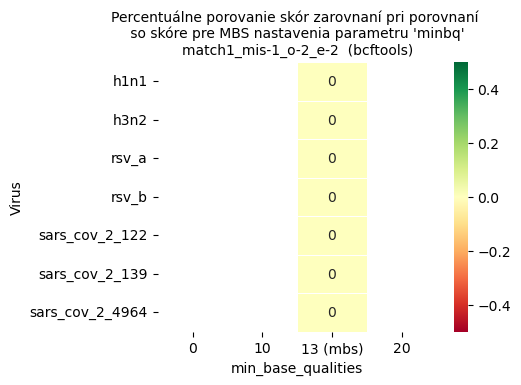

min_map_qualities
Params:  [0, 15, 30]


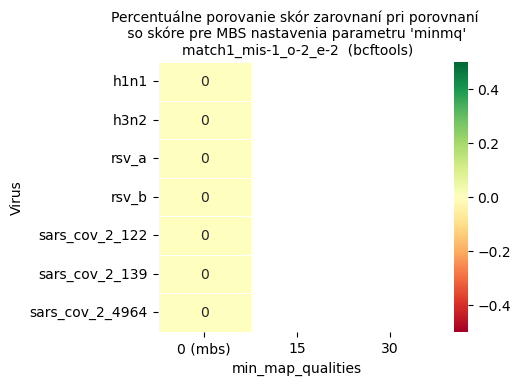

gap_fracs
Params:  [0.002, 0.05, 0.1]


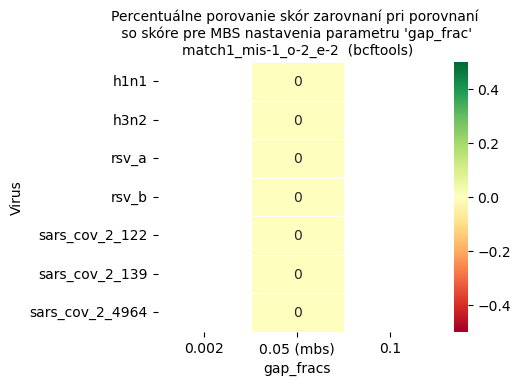

redo_baqs
Params:  [0, 1]


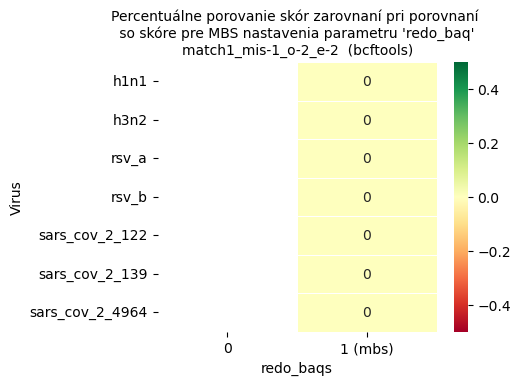

adjust_mqs
Params:  [0, 25, 50]


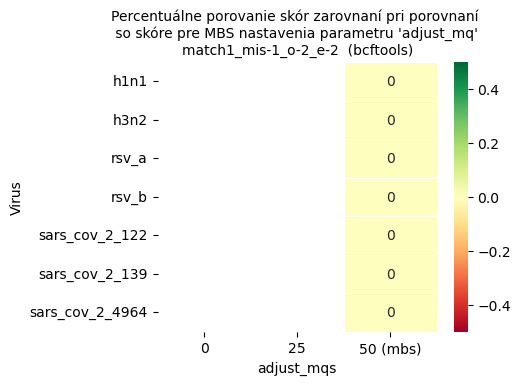

ploidies
Params:  [1, 2]


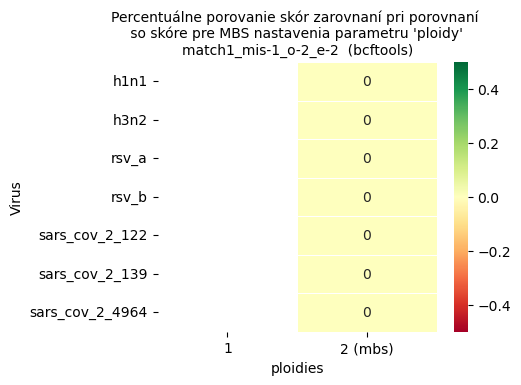


Variant_caller:  freebayes
min_base_qualities
Params:  [0, 10, 13, 20]


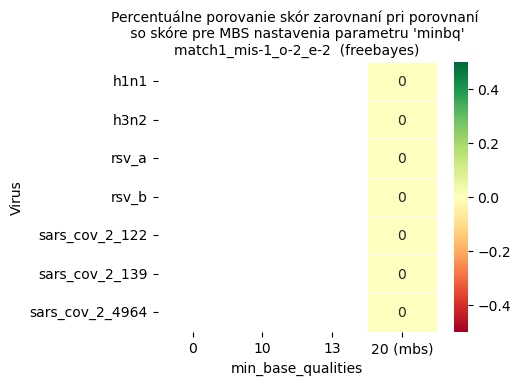

min_map_qualities
Params:  [0, 15, 30]


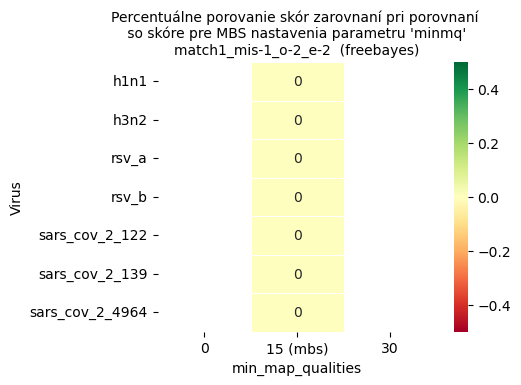

ploidies
Params:  [1, 2]


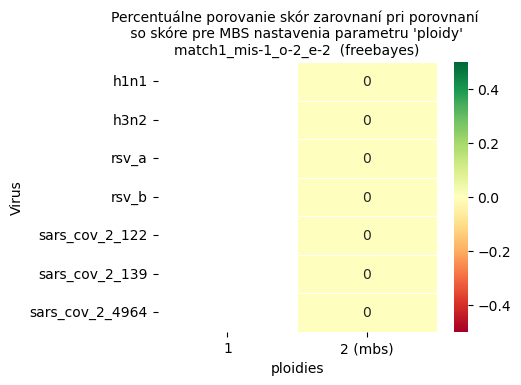


Variant_caller:  ivar
min_base_qualities
Params:  [0, 10, 13, 20]


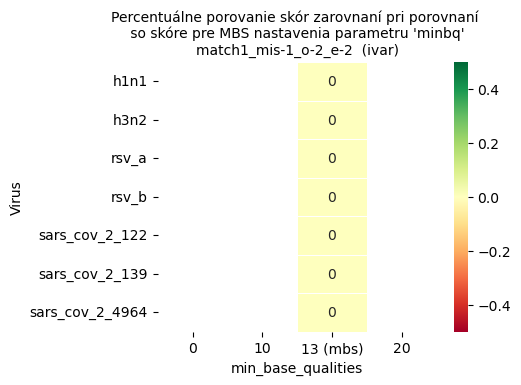

min_map_qualities
Params:  [0, 15, 30]


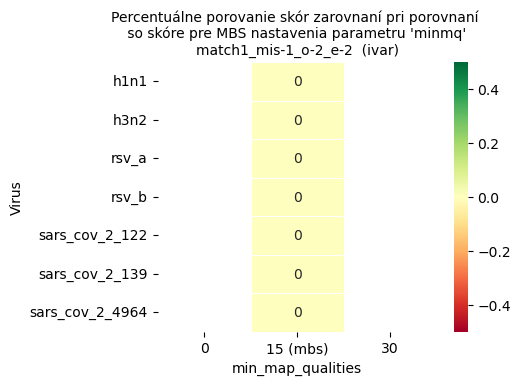

redo_baqs
Params:  [0, 1]


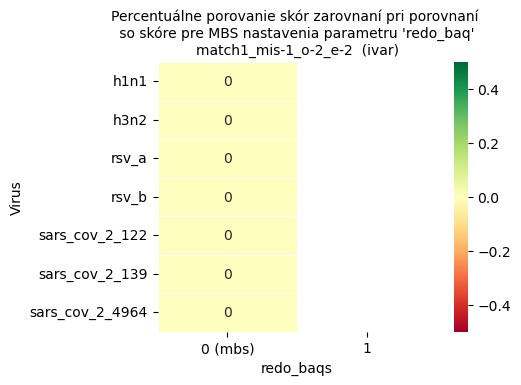

<Figure size 640x480 with 0 Axes>

In [5]:
# pre vsetky skorovacie schemy
for alignment_score in ['match1_mis-1_o-2_e-2']: #alignment_scores: 

    path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + '_variant_callers.tsv'
    
    for variant_caller in tools_vc:
        print()
        print('Variant_caller: ', variant_caller)

        all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
        all_rd_samples = all_rd_samples[all_rd_samples.variant_caller == variant_caller]
        
        # ake nazvy parametrov, ktorych hodnoty sa menili
        for param_col_name in params_variant_callers[variant_caller]['params_used']: # param_names.keys():
            
            print(param_col_name)
            
            # skratka nazvu, ktora je zapisana v tsv
            param_col = param_abbr[param_col_name]

            # hodnoty testovanych parametrov
            params = params_variant_callers[variant_caller][param_col_name] # param_names[param_abbr[param_col]]
            print('Params: ', params)

            df_column_names = list(params)
            df_column_names.append('virus')
            df_column_names.append('param_name')
            df_column_names.append('variant_caller')


            rd_samples_param_median = pd.DataFrame([[0] * len(df_column_names)], columns=df_column_names)

            # pre vsetky virusy
            for virus_x in samples_names.keys():

                # prazdny df (vyplneny '0')
                virus_param_median = pd.DataFrame([[0] * len(df_column_names)], columns=df_column_names)
                virus_df = all_rd_samples[all_rd_samples.virus == virus_x]

                for param in params:

                    # param_med = virus_df[(virus_df['param'] == param_col) & (virus_df['param_val'] == str(param))].score.median()
                    param_med = virus_df[(virus_df['param'] == param_col) & (virus_df['param_val'] == param)].score.median()

                    virus_param_median[param] = param_med

                # print('median: ', virus_df[virus_df['param'] == 'baseline_params'].score.median(), '. Iba skore: ', virus_df[virus_df['param'] == 'baseline_params'].score.item())
                virus_param_median['mbs'] = virus_df[virus_df['param'] == 'baseline_params'].score.median()
                virus_param_median['virus'] = virus_x
                virus_param_median['param_name'] = param_col
                virus_param_median['variant_caller'] = variant_caller

                rd_samples_param_median = pd.concat([rd_samples_param_median, virus_param_median], ignore_index=True)

            rd_samples_param_median = rd_samples_param_median.drop(0, axis=0)
            
            # print('rd_samples_param_median: ', rd_samples_param_median)

            # pre zobrazenie podielov v heatmape
                
            # mbs_param = mbs_params[param_col]
            df_column_names = list(params)
            df_column_names.append('virus')

            rd_samples_param_median_diff = pd.DataFrame(columns=df_column_names)

            for i, row in rd_samples_param_median.iterrows():

                virus_param_median_diff  = pd.DataFrame([[0] * len(df_column_names)], columns=df_column_names)

                # print('virus_param_median_diff: ', virus_param_median_diff)
                
                for param in params:

                    vz_med = row[param]/row['mbs']
                    vz_med_perc = (vz_med - 1) * 100 # o ake percento sa hodnota zvysila/znizila
                    virus_param_median_diff[param] = vz_med_perc
                    # print(param, ':  ', row[param], '/', row['mbs'], ' = ', vz_med, ' ==> ', vz_med_perc)
                
                virus_param_median_diff['virus'] = row['virus']

                # print('virus_param_median_diff: ', virus_param_median_diff)

                rd_samples_param_median_diff = pd.concat([rd_samples_param_median_diff, virus_param_median_diff], ignore_index=True)
                # print('rd_samples_param_median_diff: ', rd_samples_param_median_diff)


            # ku hodnote mbs nastavenia pridat
            # a vyplnit 0.0 stlpec pre mbs nastavenie parametra
            new_col_name_mbs = str(mbs_set_params_variant_callers[variant_caller][param_col_name]) + ' (mbs)' # aka hodnota je pre dany parameter a pre dany variant caller nastavena ako MBS?

            rd_samples_param_median_diff = rd_samples_param_median_diff.rename(columns={mbs_set_params_variant_callers[variant_caller][param_col_name]: new_col_name_mbs})
            rd_samples_param_median_diff[new_col_name_mbs] = 0.0

            # print(rd_samples_param_median_diff)
            plt.clf()
            # plt.figure(figsize=(9,3))

            # Replace NaN with a specific value (e.g., -1)
            rd_samples_param_median_diff.fillna(-200, inplace=True)
            rd_samples_param_median_diff.set_index('virus', inplace=True)

            # Masking the -1 values
            mask = rd_samples_param_median_diff == -200
            # ax = sns.heatmap(rd_samples_param_median_diff, annot=True, cmap='RdYlGn', linewidths=.5, mask=mask, vmin=-1, vmax=1)
            ax = sns.heatmap(rd_samples_param_median_diff, annot=True, cmap='RdYlGn', linewidths=.5, mask=mask, vmin=-0.5, vmax=0.5) # , square=True

            # ax = sns.heatmap(rd_samples_param_median_diff.set_index('virus'), cmap="Blues", annot=True, annot_kws={"size": 9}, fmt=".4f")
            ax.set(xlabel=param_col_name, ylabel="Virus")

            # plot_title = 'Comparison of median of values for used parameter \n to median of scores of parameter for MBS '+ param_col + ' ' + '\n' + alignment_score + trimmer
            # plot_title = 'Porovnanie skore zarovania s MBS skore pre '+ param_col + ' ' + '\n' + alignment_score + '_' + variant_caller
            plot_title = "Percentuálne porovanie skór zarovnaní pri porovnaní \n so skóre pre MBS nastavenia parametru '" + param_col + "' " + '\n' +  alignment_score + '  (' + variant_caller + ')'
            plt.title(plot_title, fontsize=10)
            plt.gcf().set_size_inches(4.5, 3.5)

            path_to_save_fig = './data/result_metrics/comparison_MBS_params_score/' + alignment_score + "/heatmap_" + param_col + '_' + alignment_score + '_' + date_generated + '_' + variant_caller + ".png"
            # plt.savefig(path_to_save_fig, bbox_inches='tight')

            plt.show()

            plt.clf()



In [5]:
params_variant_callers['bcftools']['params_used']

['min_base_qualities',
 'min_map_qualities',
 'gap_fracs',
 'redo_baqs',
 'adjust_mqs',
 'ploidies']

In [3]:
tools_vc

['bcftools', 'freebayes', 'ivar']

#ktore nastavenia su najlepsie pre dany virus?

In [141]:
path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + '_variant_callers.tsv'

vc_scores_df = add_row_with_score_mbs_params(path_to_rd_samples)

vc_scores_df.sort_values(by=['virus', 'score', 'match', 'gap', 'mismatch'], ascending=[True, False, False, True, True])

scores_max_df = pd.DataFrame(columns=vc_scores_df.columns)

# pre kazdy virus vyber najvyssie skore
for virus in samples_names.keys():  #['rsv_a', 'rsv_b', 'sars_cov_2_122', 'sars_cov_2_139']:  # ['h3n2']: 

    vc_scores_df_virus = vc_scores_df[vc_scores_df.virus == virus]
    max_score_for_virus = max(vc_scores_df_virus.score)
    print(virus, max_score_for_virus)
    
    vc_scores_df_virus = vc_scores_df_virus[(vc_scores_df_virus.score == max_score_for_virus)]
    print(virus, vc_scores_df_virus.shape)
    print(vc_scores_df_virus[['variant_caller', 'param', 'param_val', 'consensus_baseline']])
    
    scores_max_df = pd.concat([scores_max_df, vc_scores_df_virus])


scores_max_df

h1n1 13422.0
h1n1 (11, 14)
   variant_caller            param  param_val consensus_baseline
0        bcftools        adjust_mq        0.0                NaN
12      freebayes            minbq        0.0                NaN
13      freebayes            minbq       10.0                NaN
14      freebayes            minbq       13.0                NaN
15      freebayes            minmq        0.0                NaN
16      freebayes            minmq       30.0                NaN
17      freebayes           ploidy        1.0                NaN
18      freebayes  baseline_params        1.0                MBS
18      freebayes            minbq       20.0                MBS
18      freebayes            minmq       15.0                MBS
18      freebayes           ploidy        2.0                MBS
h3n2 13179.0
h3n2 (20, 14)
   variant_caller            param  param_val consensus_baseline
38      freebayes            minbq        0.0                NaN
39      freebayes            minbq  

virus variant_caller      param  param_val    score  match gap  \
0               h1n1       bcftools  adjust_mq        0.0  13422.0  13427   0   
12              h1n1      freebayes      minbq        0.0  13422.0  13427   0   
13              h1n1      freebayes      minbq       10.0  13422.0  13427   0   
14              h1n1      freebayes      minbq       13.0  13422.0  13427   0   
15              h1n1      freebayes      minmq        0.0  13422.0  13427   0   
..               ...            ...        ...        ...      ...    ...  ..   
142  sars_cov_2_4964      freebayes      minmq       15.0  29843.0  29845   0   
142  sars_cov_2_4964      freebayes     ploidy        2.0  29843.0  29845   0   
149  sars_cov_2_4964           ivar      minbq       13.0  29843.0  29845   0   
149  sars_cov_2_4964           ivar      minmq       15.0  29843.0  29845   0   
149  sars_cov_2_4964           ivar   redo_baq        0.0  29843.0  29845   0   

    mismatch N_count  score_agg sample_id pairwiseAligner_set_score  \
0          5       5    13417.0      1337      match1_mis-1_o-2_e-2   
12         5       5    13417.0      1337      match1_mis-1_o-2_e-2   
13         5       5    13417.0      1337      match1_mis-1_o-2_e-2   
14         5       5    13417.0      1337      match1_mis-1_o-2_e-2   
15         5       5    13417.0      1337      match1_mis-1_o-2_e-2   
..       ...     ...        ...       ...                       ...   
142        2       1    29841.0      4964      match1_mis-1_o-2_e-2   
142        2       1    29841.0      4964      match1_mis-1_o-2_e-2   
149        2       2    29841.0      4964      match1_mis-1_o-2_e-2   
149        2       2    29841.0      4964      match1_mis-1_o-2_e-2   
149        2       2    29841.0      4964      match1_mis-1_o-2_e-2   

    consensus_baseline consensus_baseline_virus  
0                  NaN                      NaN  
12                 NaN                      NaN  
13                 NaN                      NaN  
14                 NaN                      NaN  
15                 NaN                      NaN  
..                 ...                      ...  
142                MBS      MBS_sars_cov_2_4964  
142                MBS      MBS_sars_cov_2_4964  
149                MBS      MBS_sars_cov_2_4964  
149                MBS      MBS_sars_cov_2_4964  
149                MBS      MBS_sars_cov_2_4964  

[67 rows x 14 columns]

In [144]:
# prienikom najlepsich skore pre vsetky virusy sme zistili:

# nastavenie , ktore u vacsine (okrem 122 a h1n1) davalo maximalne skore bolo
    # ivar: minbq = 0 (a ostatne mbs nastavenia)

scores_max_df[(scores_max_df.variant_caller == 'ivar') & (scores_max_df.param == 'minbq') & (scores_max_df.param_val == 0)]

virus variant_caller  param  param_val    score  match gap  \
45              h3n2           ivar  minbq        0.0  13179.0  13179   0   
168            rsv_a           ivar  minbq        0.0  15221.0  15221   0   
71             rsv_b           ivar  minbq        0.0  15100.0  15162   0   
95    sars_cov_2_139           ivar  minbq        0.0  29801.0  29818   0   
143  sars_cov_2_4964           ivar  minbq        0.0  29843.0  29845   0   

    mismatch N_count  score_agg sample_id pairwiseAligner_set_score  \
45         0       1    13179.0      2129      match1_mis-1_o-2_e-2   
168        0       0    15221.0      1658      match1_mis-1_o-2_e-2   
71        62      65    15038.0       902      match1_mis-1_o-2_e-2   
95        17      26    29784.0       139      match1_mis-1_o-2_e-2   
143        2       2    29841.0      4964      match1_mis-1_o-2_e-2   

    consensus_baseline consensus_baseline_virus  
45                 NaN                      NaN  
168                NaN                      NaN  
71                 NaN                      NaN  
95                 NaN                      NaN  
143                NaN                      NaN

In [153]:
# avsak u 122 a h1n1 pri tomto nastaveni je to 
vc_scores_df[(vc_scores_df.variant_caller == 'ivar') & (vc_scores_df.param == 'minbq') & (vc_scores_df.param_val == 0)]
# pre 122: vysoky skok: 29827(max) oproti 29761 (rozdiel 66) - celkom 37 mismatchov: 33 naviac oproti 4 mismatchom ktore su sekvencii s najvyssim skore zaorvania 
# pre h1n1: 13422(max) oproti 13418 (rozdiel 4) - 2 mismatche naviec oproti najvyssiemu skore (celkom 8mismatchov)

vc_scores_df[(vc_scores_df.variant_caller == 'ivar') & (vc_scores_df.param == 'minbq') & (vc_scores_df.param_val == 0)]


virus variant_caller  param  param_val    score  match  gap  \
19              h1n1           ivar  minbq        0.0  13418.0  13425    0   
45              h3n2           ivar  minbq        0.0  13179.0  13179    0   
168            rsv_a           ivar  minbq        0.0  15221.0  15221    0   
71             rsv_b           ivar  minbq        0.0  15100.0  15162    0   
120   sars_cov_2_122           ivar  minbq        0.0  29761.0  29798    0   
95    sars_cov_2_139           ivar  minbq        0.0  29801.0  29818    0   
143  sars_cov_2_4964           ivar  minbq        0.0  29843.0  29845    0   

     mismatch  N_count  score_agg  sample_id pairwiseAligner_set_score  \
19          7        7    13411.0       1337      match1_mis-1_o-2_e-2   
45          0        1    13179.0       2129      match1_mis-1_o-2_e-2   
168         0        0    15221.0       1658      match1_mis-1_o-2_e-2   
71         62       65    15038.0        902      match1_mis-1_o-2_e-2   
120        37       59    29724.0        122      match1_mis-1_o-2_e-2   
95         17       26    29784.0        139      match1_mis-1_o-2_e-2   
143         2        2    29841.0       4964      match1_mis-1_o-2_e-2   

    consensus_baseline consensus_baseline_virus  
19                 NaN                      NaN  
45                 NaN                      NaN  
168                NaN                      NaN  
71                 NaN                      NaN  
120                NaN                      NaN  
95                 NaN                      NaN  
143                NaN                      NaN

In [19]:
vc_scores_df[vc_scores_df.virus == 'sars_cov_2_122' ].sort_values('score')


virus variant_caller            param  param_val    score  \
111  sars_cov_2_122       bcftools        adjust_mq       25.0  29744.0   
110  sars_cov_2_122       bcftools            minmq       30.0  29754.0   
122  sars_cov_2_122           ivar            minbq       20.0  29759.0   
124  sars_cov_2_122           ivar         redo_baq        1.0  29759.0   
123  sars_cov_2_122           ivar            minmq       30.0  29759.0   
125  sars_cov_2_122           ivar  baseline_params        1.0  29759.0   
121  sars_cov_2_122           ivar            minbq       10.0  29759.0   
120  sars_cov_2_122           ivar            minbq        0.0  29761.0   
108  sars_cov_2_122       bcftools         redo_baq        0.0  29765.0   
109  sars_cov_2_122       bcftools  baseline_params       25.0  29765.0   
106  sars_cov_2_122       bcftools            minmq       15.0  29765.0   
105  sars_cov_2_122       bcftools            minbq       20.0  29765.0   
104  sars_cov_2_122       bcftools            minbq       10.0  29765.0   
107  sars_cov_2_122       bcftools         gap_frac        0.1  29765.0   
114  sars_cov_2_122      freebayes            minbq       13.0  29775.0   
115  sars_cov_2_122      freebayes            minmq        0.0  29775.0   
116  sars_cov_2_122      freebayes            minmq       30.0  29775.0   
117  sars_cov_2_122      freebayes           ploidy        1.0  29775.0   
118  sars_cov_2_122      freebayes  baseline_params        1.0  29775.0   
103  sars_cov_2_122       bcftools        adjust_mq        0.0  29787.0   
102  sars_cov_2_122       bcftools            minbq        0.0  29797.0   
119  sars_cov_2_122           ivar            minmq        0.0  29825.0   
112  sars_cov_2_122      freebayes            minbq        0.0  29827.0   
113  sars_cov_2_122      freebayes            minbq       10.0  29827.0   

     match  gap  mismatch  N_count  score_agg  sample_id  \
111  29803   14        31       34    29699.0        122   
110  29808   14        26       34    29714.0        122   
122  29797    0        38       60    29721.0        122   
124  29797    0        38       60    29721.0        122   
123  29797    0        38       60    29721.0        122   
125  29797    0        38       60    29721.0        122   
121  29797    0        38       60    29721.0        122   
120  29798    0        37       59    29724.0        122   
108  29812   12        23       34    29730.0        122   
109  29812   12        23       34    29730.0        122   
106  29812   12        23       34    29730.0        122   
105  29812   12        23       34    29730.0        122   
104  29812   12        23       34    29730.0        122   
107  29812   12        23       34    29730.0        122   
114  29831   26         4       51    29745.0        122   
115  29831   26         4       51    29745.0        122   
116  29831   26         4       51    29745.0        122   
117  29831   26         4       51    29745.0        122   
118  29831   26         4       51    29745.0        122   
103  29823   12        12       34    29763.0        122   
102  29819    3        16       26    29778.0        122   
119  29830    0         5       27    29820.0        122   
112  29831    0         4       26    29823.0        122   
113  29831    0         4       26    29823.0        122   

    pairwiseAligner_set_score consensus_baseline consensus_baseline_virus  
111      match1_mis-1_o-2_e-2                NaN                      NaN  
110      match1_mis-1_o-2_e-2                NaN                      NaN  
122      match1_mis-1_o-2_e-2                NaN                      NaN  
124      match1_mis-1_o-2_e-2                NaN                      NaN  
123      match1_mis-1_o-2_e-2                NaN                      NaN  
125      match1_mis-1_o-2_e-2                MBS       MBS_sars_cov_2_122  
121      match1_mis-1_o-2_e-2                NaN                      NaN  
120      match1_mis-1_o-2_e-2

In [30]:
from constants import samples_names
samples_names.values()


dict_values(['run230320_UVZ_BA_23-vsp-1337', 'run230320_UVZ_BA_23-vsp-2129', 'run230320_UVZ_BA_23-vsp-1658', 'run230320_UVZ_BA_23-vsp-902', 'uvzsr-BA_24_00001-G12-BA_24_00000122', 'uvzsr-BA_24_00002-A09-BA_24_00000139', 'run230710_UVZ_BA_23-vsp-4964'])

2.857142857142857

In [35]:
1300358*0.02857142857142857 74190

37153.08571428571

In [25]:
# pri akych nastaveniach 122: ake skore:
path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + '_variant_callers.tsv'
vc_scores_df = pd.read_csv(path_to_rd_samples, sep='\t')
sscores_ivar_122 = vc_scores_df[(vc_scores_df.virus == 'sars_cov_2_122') & (vc_scores_df.variant_caller == 'ivar') & (vc_scores_df.param == 'minbq') & (vc_scores_df.param_val == 0)].sort_values('score')
sscores_ivar_122
ivar:
'min_base_qualities': 0,
'min_map_qualities': 15,
'redo_baqs': 0
# sscores_ivar_122[['virus', 'variant_caller', 'param', 'param_val', 'score', 'match',
    #    'gap', 'mismatch', 'N_count', 'pairwiseAligner_set_score', 'consensus_baseline']]


virus variant_caller  param  param_val    score  match  gap  \
120  sars_cov_2_122           ivar  minbq        0.0  29761.0  29798    0   

     mismatch  N_count  score_agg  sample_id pairwiseAligner_set_score  \
120        37       59    29724.0        122      match1_mis-1_o-2_e-2   

    consensus_baseline consensus_baseline_virus  
120                NaN                      NaN

#vizualizovanie ako sa menia skore zarovani pri jednotlivych nastaveniach nastrojov variant callerov


In [111]:
# pridat do tabulky riadok so skore pre variant callery pre dany parameter, 
    # ktory bol bol sucastou mbs nastavenia

def add_row_with_score_mbs_params(path_to_rd_samples):
    
    # path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + '_variant_callers.tsv'
    all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')

    for virus in samples_names.keys():
        
        virus_df = all_rd_samples[all_rd_samples.virus == virus]

        for variant_caller in tools_vc:

            row_to_append = virus_df[(virus_df.variant_caller == variant_caller) & (virus_df.param == 'baseline_params')]
            
            for param in mbs_set_params_variant_callers[variant_caller].keys():
                
                new_row = row_to_append.copy()

                param_val = mbs_set_params_variant_callers[variant_caller][param]
                new_row['param_val'] = param_val
                new_row['param'] = param_abbr[param]
                
                all_rd_samples = pd.concat([all_rd_samples, new_row], axis=0)


    return all_rd_samples.sort_values(by=['virus', 'score', 'match', 'gap', 'mismatch'], ascending=[True, False, False, True, True])


Variant_caller:  bcftools
min_base_qualities
param_col_name:  min_base_qualities param_col:  minbq
Params:  [0, 10, 13, 20]


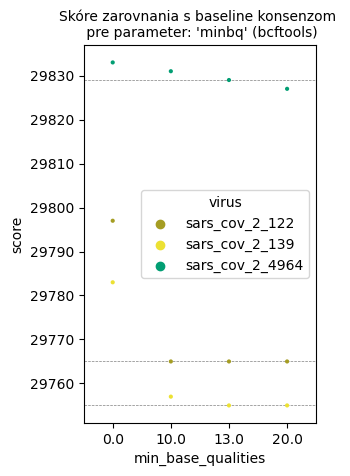

min_map_qualities
param_col_name:  min_map_qualities param_col:  minmq
Params:  [0, 15, 30]


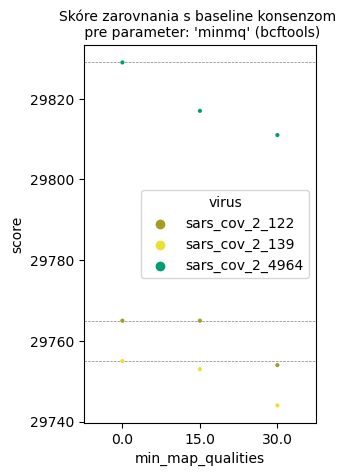

gap_fracs
param_col_name:  gap_fracs param_col:  gap_frac
Params:  [0.002, 0.05, 0.1]


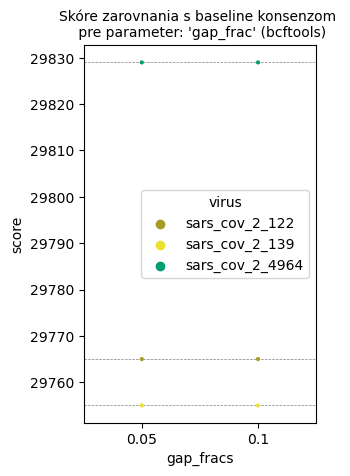

redo_baqs
param_col_name:  redo_baqs param_col:  redo_baq
Params:  [0, 1]


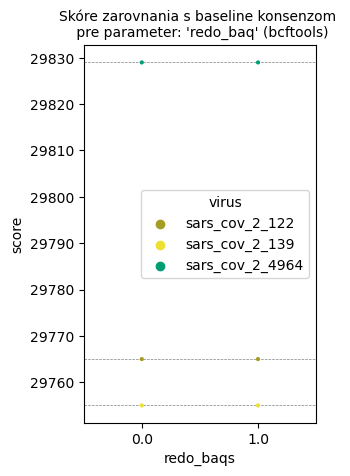

adjust_mqs
param_col_name:  adjust_mqs param_col:  adjust_mq
Params:  [0, 25, 50]


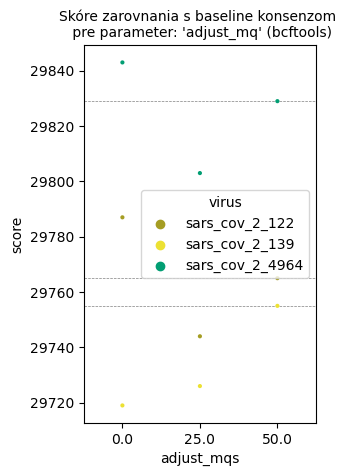

ploidies
param_col_name:  ploidies param_col:  ploidy
Params:  [1, 2]


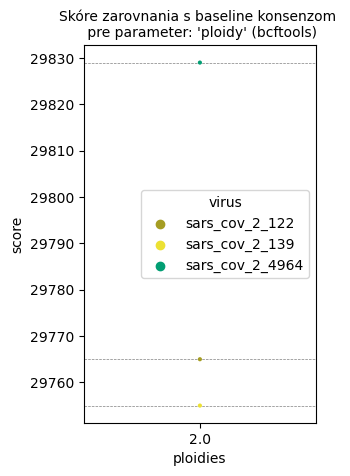


Variant_caller:  freebayes
min_base_qualities
param_col_name:  min_base_qualities param_col:  minbq
Params:  [0, 10, 13, 20]


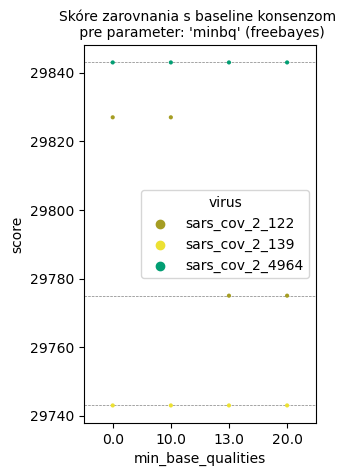

min_map_qualities
param_col_name:  min_map_qualities param_col:  minmq
Params:  [0, 15, 30]


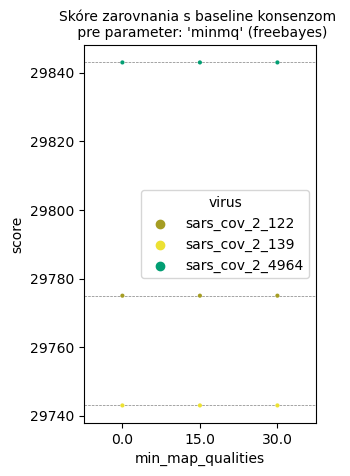

ploidies
param_col_name:  ploidies param_col:  ploidy
Params:  [1, 2]


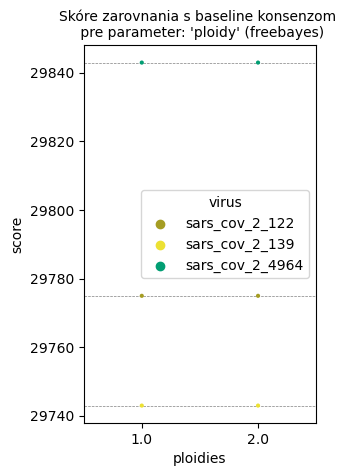


Variant_caller:  ivar
min_base_qualities
param_col_name:  min_base_qualities param_col:  minbq
Params:  [0, 10, 13, 20]


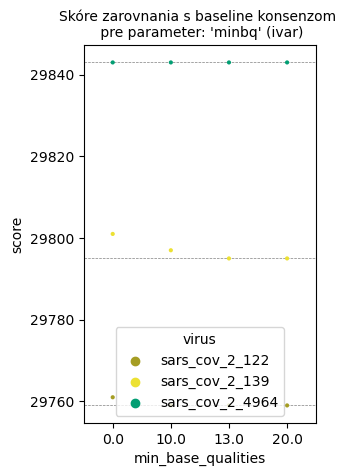

min_map_qualities
param_col_name:  min_map_qualities param_col:  minmq
Params:  [0, 15, 30]


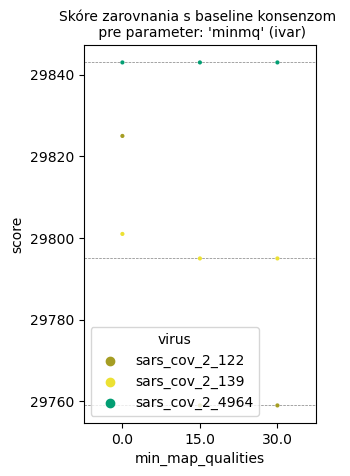

redo_baqs
param_col_name:  redo_baqs param_col:  redo_baq
Params:  [0, 1]


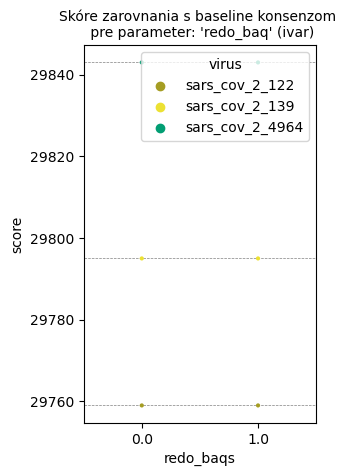

<Figure size 640x480 with 0 Axes>

In [134]:
# generovanie iba pre SARS-COV-2 

# pre vsetky skorovacie schemy
for alignment_score in ['match1_mis-1_o-2_e-2']: #alignment_scores: 

    path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_' + alignment_score + '_' + date_generated + '_variant_callers.tsv'
    
    for variant_caller in tools_vc:
        print()
        print('Variant_caller: ', variant_caller)

        # read file and append rows for mbs params
        all_rd_samples = add_row_with_score_mbs_params(path_to_rd_samples)
        
        all_rd_samples = all_rd_samples[all_rd_samples.variant_caller == variant_caller]
        all_rd_samples = all_rd_samples[(all_rd_samples.virus == 'sars_cov_2_139') | (all_rd_samples.virus == 'sars_cov_2_122')
                                | (all_rd_samples.virus == 'sars_cov_2_4964')]

        
        # ake nazvy parametrov, ktorych hodnoty sa menili
        for param_col_name in params_variant_callers[variant_caller]['params_used']: # param_names.keys():
            
            print(param_col_name)

            # skratka nazvu, ktora je zapisana v tsv
            param_col = param_abbr[param_col_name]
            print('param_col_name: ', param_col_name, 'param_col: ', param_col)

            # stlpec param == aky parameter(skratka)
            rd_samples_param = all_rd_samples[all_rd_samples.param == param_col]

            # hodnoty testovanych parametrov
            params = params_variant_callers[variant_caller][param_col_name] # param_names[param_abbr[param_col]]
            print('Params: ', params)

            plot_title = "Skóre zarovnania s baseline konsenzom \n pre parameter: '" + param_col + "' (" + variant_caller + ')'
            sns.swarmplot(data=rd_samples_param, x='param_val', y="score", hue="virus", size=3, palette=virus_color_pallete)
            plt.axhline(y=rd_samples_param[rd_samples_param.consensus_baseline_virus == 'MBS_sars_cov_2_122']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
            plt.axhline(y=rd_samples_param[rd_samples_param.consensus_baseline_virus == 'MBS_sars_cov_2_139']['score'].item(), color='grey', linestyle='--', linewidth=0.5)
            plt.axhline(y=rd_samples_param[rd_samples_param.consensus_baseline_virus == 'MBS_sars_cov_2_4964']['score'].item(), color='grey', linestyle='--', linewidth=0.5)

                    
            plt.title(plot_title, fontsize=10)
            plt.gcf().set_size_inches(3, 4.9)
            plt.xlabel(param_col_name)

            # path_to_save_fig = './data/result_metrics/comparison_MBS_params_score/' + alignment_score + "/heatmap_" + param_col + '_' + alignment_score + '_' + date_generated + '_' + variant_caller + ".png"
            # plt.savefig(path_to_save_fig, bbox_inches='tight')

            plt.show()

            plt.clf()


In [131]:
rd_samples_param['param_val'] = pd.to_numeric(rd_samples_param['param_val'], errors='coerce')

# Iterate through each row
for index, row in rd_samples_param.iterrows():
    # Check if the value is not null and is a whole number (integer)
    if not pd.isnull(row['param_val']) and row['param_val'].is_integer():
        # Convert the value to an integer
        rd_samples_param.loc[index, 'param_val'] = int(row['param_val'])

# Now rd_samples_param['param_val'] contains integer values for whole number floats
rd_samples_param['param_val']

/tmp/ipykernel_173394/1112336389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rd_samples_param['param_val'] = pd.to_numeric(rd_samples_param['param_val'], errors='coerce')


124    1.0
125    0.0
100    1.0
101    0.0
148    1.0
149    0.0
Name: param_val, dtype: float64

In [121]:
rd_samples_param#[rd_samples_param.consensus_baseline_virus == 'MBS_sars_cov_2_4964']

virus variant_caller  param  param_val    score  match  gap  \
102   sars_cov_2_122       bcftools  minbq        0.0  29797.0  29819    3   
104   sars_cov_2_122       bcftools  minbq       10.0  29765.0  29812   12   
105   sars_cov_2_122       bcftools  minbq       20.0  29765.0  29812   12   
109   sars_cov_2_122       bcftools  minbq       13.0  29765.0  29812   12   
78    sars_cov_2_139       bcftools  minbq        0.0  29783.0  29812    3   
79    sars_cov_2_139       bcftools  minbq       10.0  29757.0  29808   12   
80    sars_cov_2_139       bcftools  minbq       20.0  29755.0  29807   12   
83    sars_cov_2_139       bcftools  minbq       13.0  29755.0  29807   12   
127  sars_cov_2_4964       bcftools  minbq        0.0  29833.0  29840    0   
128  sars_cov_2_4964       bcftools  minbq       10.0  29831.0  29839    0   
131  sars_cov_2_4964       bcftools  minbq       13.0  29829.0  29838    0   
132  sars_cov_2_4964       bcftools  minbq       20.0  29827.0  29837    0   

     mismatch  N_count  score_agg  sample_id pairwiseAligner_set_score  \
102        16       26    29778.0        122      match1_mis-1_o-2_e-2   
104        23       34    29730.0        122      match1_mis-1_o-2_e-2   
105        23       34    29730.0        122      match1_mis-1_o-2_e-2   
109        23       34    29730.0        122      match1_mis-1_o-2_e-2   
78         23       26    29757.0        139      match1_mis-1_o-2_e-2   
79         27       35    29718.0        139      match1_mis-1_o-2_e-2   
80         28       35    29715.0        139      match1_mis-1_o-2_e-2   
83         28       35    29715.0        139      match1_mis-1_o-2_e-2   
127         7        1    29826.0       4964      match1_mis-1_o-2_e-2   
128         8        1    29823.0       4964      match1_mis-1_o-2_e-2   
131         9        1    29820.0       4964      match1_mis-1_o-2_e-2   
132        10        1    29817.0       4964      match1_mis-1_o-2_e-2   

    consensus_baseline consensus_baseline_virus  
102                NaN                      NaN  
104                NaN                      NaN  
105                NaN                      NaN  
109                MBS       MBS_sars_cov_2_122  
78                 NaN                      NaN  
79                 NaN                      NaN  
80                 NaN                      NaN  
83                 MBS       MBS_sars_cov_2_139  
127                NaN                      NaN  
128                NaN                      NaN  
131                MBS      MBS_sars_cov_2_4964  
132                NaN                      NaN

In [110]:
all_rd_samples

# heatmaps for final combination of best param set for trimmers and variant caller

In [42]:
# date_generated = '2024_4_16'  # trimmomatic
date_generated = '2024_4_16'  # _cutadapt

# for trimmer:
print(trimmer)
path_trimmer_vc = './data/result_metrics/results_all_viruses/results_all_viruses_match1_mis-1_o-2_e-2_' + date_generated + trimmer + '_vc_mbs.tsv'
scores_df = pd.read_csv(path_trimmer_vc, sep='\t')
scores_df[scores_df.virus == 'rsv_a']

_cutadapt


virus   trimmer variant_caller            param    score  match  gap  \
6   rsv_a  cutadapt           ivar              NaN  15221.0  15221    0   
7   rsv_a  cutadapt       bcftools              NaN  14793.0  15011    4   
8   rsv_a  cutadapt      freebayes              NaN  14793.0  15011    4   
27  rsv_a  cutadapt           ivar  baseline_params  15221.0  15221    0   
28  rsv_a  cutadapt       bcftools  baseline_params  14793.0  15011    4   
29  rsv_a  cutadapt      freebayes  baseline_params  14793.0  15011    4   

    mismatch  N_count  score_agg  sample_id pairwiseAligner_set_score  \
6          0        0    15221.0       1658      match1_mis-1_o-2_e-2   
7        210        0    14579.0       1658      match1_mis-1_o-2_e-2   
8        210        0    14579.0       1658      match1_mis-1_o-2_e-2   
27         0        0    15221.0       1658      match1_mis-1_o-2_e-2   
28       210        0    14579.0       1658      match1_mis-1_o-2_e-2   
29       210        0    14579.0       1658      match1_mis-1_o-2_e-2   

   consensus_baseline consensus_baseline_virus                  param_name  
6                 NaN                      NaN               cutadapt_ivar  
7                 NaN                      NaN           cutadapt_bcftools  
8                 NaN                      NaN          cutadapt_freebayes  
27                MBS                MBS_rsv_a       cutadapt_mbs_ivar_mbs  
28                MBS                MBS_rsv_a   cutadapt_mbs_bcftools_mbs  
29                MBS                MBS_rsv_a  cutadapt_mbs_freebayes_mbs

In [7]:
trimmer

'_cutadapt'

In [15]:
# pre vsetky skorovacie schemy
for alignment_score in ['match1_mis-1_o-2_e-2']: #alignment_scores: 

    path_to_rd_samples = './data/result_metrics/results_all_viruses/results_all_viruses_match1_mis-1_o-2_e-2_' + date_generated + trimmer + '_vc_mbs.tsv'

    df_column_names = list(tools_vc)
    df_column_names.append('virus')
    rd_samples_param_comparison = pd.DataFrame([[0] * len(df_column_names)], columns=df_column_names)
    rd_samples_param_scores = pd.DataFrame([[0] * (2*len(df_column_names)-1)], columns=['virus', 'bcftools', 'bcftools (mbs)', 'freebayes', 'freebayes (mbs)', 'ivar', 'ivar (mbs)'])

    all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
        
    # pre vsetky virusy
    for virus_x in samples_names.keys():
        print(virus_x)
        
        # prazdny df (vyplneny '0')
        virus_param_comparison = pd.DataFrame([[0] * len(df_column_names)], columns=df_column_names)
        virus_param_scores = pd.DataFrame([[0] * (2*len(df_column_names)-1)], columns=['virus', 'bcftools', 'bcftools (mbs)', 'freebayes', 'freebayes (mbs)', 'ivar', 'ivar (mbs)'])


        for variant_caller in tools_vc:
            print('Variant_caller: ', variant_caller)

            virus_df = all_rd_samples[(all_rd_samples.virus == virus_x) & (all_rd_samples.variant_caller == variant_caller)]
            mbs_score = virus_df[virus_df['param'] == 'baseline_params'].score.item()
            param_name_trimm_vc = trimmer.replace('_', '') + '_' + variant_caller
            param_score = virus_df[virus_df.param_name == param_name_trimm_vc].score.item()
            # param_score = virus_df[virus_df.param != 'baseline_params'].score.item()

            param_diff = param_score / mbs_score
            param_diff_perc = (param_diff - 1) * 100 # o ake percento sa hodnota zvysila/znizila
            virus_param_comparison[variant_caller] = round(param_diff_perc, 2)

            virus_param_scores[variant_caller] = param_score
            variant_caller_mbs_name  = variant_caller + ' (mbs)'
            virus_param_scores[variant_caller_mbs_name] = mbs_score
            
            print(variant_caller, ':  ', param_score, '/', mbs_score, ' = ', param_diff, ' ==> ', param_diff_perc)
                

        virus_param_comparison['virus'] = virus_x
        virus_param_scores['virus'] = virus_x

        rd_samples_param_comparison = pd.concat([rd_samples_param_comparison, virus_param_comparison], ignore_index=True)
        rd_samples_param_scores = pd.concat([rd_samples_param_scores, virus_param_scores], ignore_index=True)

    rd_samples_param_comparison = rd_samples_param_comparison.drop(0, axis=0)
    rd_samples_param_scores = rd_samples_param_scores.drop(0, axis=0)



# pridaj stlpec pre variant caller mbs, ktory bude obsahovat 0.0 
for variant_caller in tools_vc:
    
    variant_caller_mbs_name = variant_caller + ' (mbs)'
    
    rd_samples_param_comparison[variant_caller_mbs_name] = 0.0

rd_samples_param_comparison = rd_samples_param_comparison[['virus', 'bcftools', 'bcftools (mbs)', 'freebayes', 'freebayes (mbs)', 'ivar', 'ivar (mbs)']]


# uloz tabulky:
path_to_rd_samples_param_scores = './data/result_metrics/results_all_viruses/finalne_nastavenia/heatmap_final_' + alignment_score + '_' + date_generated + trimmer + '_vc_param_scores.tsv'
path_to_rd_samples_param_comparison = './data/result_metrics/results_all_viruses/finalne_nastavenia/heatmap_final_' + alignment_score + '_' + date_generated + trimmer + '_vc_param_diff.tsv'

rd_samples_param_scores.to_csv(path_to_rd_samples_param_scores, sep='\t', index=False)
rd_samples_param_comparison.to_csv(path_to_rd_samples_param_comparison, sep='\t', index=False)

rd_samples_param_comparison

h1n1
Variant_caller:  bcftools
bcftools :   13422.0 / 13422.0  =  1.0  ==>  0.0
Variant_caller:  freebayes
freebayes :   13424.0 / 13424.0  =  1.0  ==>  0.0
Variant_caller:  ivar
ivar :   13424.0 / 13418.0  =  1.0004471605306304  ==>  0.04471605306304305
h3n2
Variant_caller:  bcftools
bcftools :   13177.0 / 13177.0  =  1.0  ==>  0.0
Variant_caller:  freebayes
freebayes :   13179.0 / 13179.0  =  1.0  ==>  0.0
Variant_caller:  ivar
ivar :   13177.0 / 13177.0  =  1.0  ==>  0.0
rsv_a
Variant_caller:  bcftools
bcftools :   14793.0 / 14793.0  =  1.0  ==>  0.0
Variant_caller:  freebayes
freebayes :   14793.0 / 14793.0  =  1.0  ==>  0.0
Variant_caller:  ivar
ivar :   15221.0 / 15221.0  =  1.0  ==>  0.0
rsv_b
Variant_caller:  bcftools
bcftools :   14960.0 / 14960.0  =  1.0  ==>  0.0
Variant_caller:  freebayes
freebayes :   14960.0 / 14960.0  =  1.0  ==>  0.0
Variant_caller:  ivar
ivar :   15154.0 / 15138.0  =  1.0010569427929714  ==>  0.10569427929714159
sars_cov_2_122
Variant_caller:  bcftools

ivar :   29831.0 / 29827.0  =  1.0001341066818654  ==>  0.013410668186542019
sars_cov_2_139
Variant_caller:  bcftools
bcftools :   29785.0 / 29757.0  =  1.0009409550693955  ==>  0.09409550693955104
Variant_caller:  freebayes
freebayes :   29755.0 / 29755.0  =  1.0  ==>  0.0
Variant_caller:  ivar
ivar :   29807.0 / 29805.0  =  1.0000671028350947  ==>  0.006710283509470116
sars_cov_2_4964
Variant_caller:  bcftools
bcftools :   29819.0 / 29815.0  =  1.0001341606573873  ==>  0.013416065738725003
Variant_caller:  freebayes
freebayes :   29833.0 / 29833.0  =  1.0  ==>  0.0
Variant_caller:  ivar
ivar :   29831.0 / 29831.0  =  1.0  ==>  0.0


virus  bcftools  bcftools (mbs)  freebayes  freebayes (mbs)  \
1             h1n1      0.00             0.0        0.0              0.0   
2             h3n2      0.00             0.0        0.0              0.0   
3            rsv_a      0.00             0.0        0.0              0.0   
4            rsv_b      0.00             0.0        0.0              0.0   
5   sars_cov_2_122      0.15             0.0        0.0              0.0   
6   sars_cov_2_139      0.09             0.0        0.0              0.0   
7  sars_cov_2_4964      0.01             0.0        0.0              0.0   

   ivar  ivar (mbs)  
1  0.04         0.0  
2  0.00         0.0  
3  0.00         0.0  
4  0.11         0.0  
5  0.01         0.0  
6  0.01         0.0  
7  0.00         0.0

In [16]:
rd_samples_param_scores

virus  bcftools  bcftools (mbs)  freebayes  freebayes (mbs)  \
1             h1n1   13422.0         13422.0    13424.0          13424.0   
2             h3n2   13177.0         13177.0    13179.0          13179.0   
3            rsv_a   14793.0         14793.0    14793.0          14793.0   
4            rsv_b   14960.0         14960.0    14960.0          14960.0   
5   sars_cov_2_122   29819.0         29775.0    29779.0          29779.0   
6   sars_cov_2_139   29785.0         29757.0    29755.0          29755.0   
7  sars_cov_2_4964   29819.0         29815.0    29833.0          29833.0   

      ivar  ivar (mbs)  
1  13424.0     13418.0  
2  13177.0     13177.0  
3  15221.0     15221.0  
4  15154.0     15138.0  
5  29831.0     29827.0  
6  29807.0     29805.0  
7  29831.0     29831.0

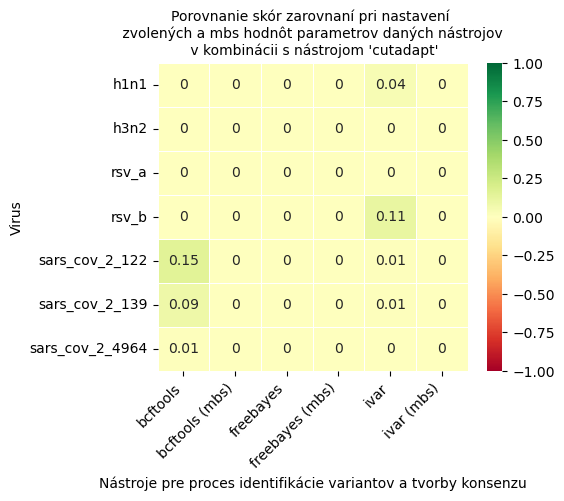

In [17]:
plt.clf()
# plt.figure(figsize=(9,3))
# Replace NaN with a specific value (e.g., -1)
rd_samples_param_comparison.fillna(-200, inplace=True)
rd_samples_param_comparison.set_index('virus', inplace=True)
# Masking the -1 values
mask = rd_samples_param_comparison == -200
ax = sns.heatmap(rd_samples_param_comparison, annot=True, cmap='RdYlGn', linewidths=.5, mask=mask, vmin=-1, vmax=1) # , square=True
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels diagonally
ax.set(xlabel='Nástroje pre proces identifikácie variantov a tvorby konsenzu', ylabel="Virus")
# plot_title = "Percentuálne porovnanie skór zarovnaní vybaných nastavení \n parametrov daného nástroja na identifikáciu variantov \n so skóre pri baseline nastavení daného nástroja \n v kombinácii s vybraným nastavením parametrov nástroja \n" + trimmer.replace('_', '')  + ' (' + alignment_score + ')'
plot_title ="Porovnanie skór zarovnaní pri nastavení \n zvolených a mbs hodnôt parametrov daných nástrojov \n v kombinácii s nástrojom '" + trimmer.replace('_', '') + "'"
plt.title(plot_title, fontsize=10)
plt.gcf().set_size_inches(5, 4)
path_to_save_fig = './data/result_metrics/comparison_MBS_params_score/finalne_porovnania/heatmap_final_' + alignment_score + '_' + date_generated + trimmer + '_vc_mbs' + ".png"
plt.savefig(path_to_save_fig, bbox_inches='tight')
plt.show()


In [48]:
rd_samples_param_comparison

virus  bcftools  bcftools (mbs)  freebayes  freebayes (mbs)  \
1             h1n1  0.014903             0.0   0.014901              0.0   
2             h3n2  0.000000             0.0   0.000000              0.0   
3            rsv_a  0.054080             0.0   0.054080              0.0   
4            rsv_b  0.053476             0.0   0.053476              0.0   
5   sars_cov_2_122  0.080632             0.0   0.100756              0.0   
6   sars_cov_2_139  0.047051             0.0   0.127761              0.0   
7  sars_cov_2_4964 -0.046934             0.0  -0.033509              0.0   

       ivar  ivar (mbs)  
1  0.074549         0.0  
2 -0.015176         0.0  
3  0.000000         0.0  
4  0.464068         0.0  
5  0.241944         0.0  
6  0.040275         0.0  
7 -0.033509         0.0

# Porovnanie medzi trimovacimi nastrojmi:
-- oba nastroje s najlepsim nastavenim

In [38]:
# pre vsetky skorovacie schemy
for alignment_score in ['match1_mis-1_o-2_e-2']: #alignment_scores: 

    path_to_rd_samples = './data/result_metrics/results_all_viruses/finalne_nastavenia/results_all_viruses_match1_mis-1_o-2_e-2_' + date_generated + '_trimmomatic_cutadapt_vc.tsv'

    df_column_names = list(tools_vc)
    df_column_names.append('virus')
    rd_samples_param_comparison = pd.DataFrame([[0] * len(df_column_names)], columns=df_column_names)
    rd_samples_param_scores = pd.DataFrame([[0] * (2*len(df_column_names)-1)], columns=['virus', 'bcftools (T)', 'bcftools (C)', 'freebayes (T)', 'freebayes (C)', 'ivar (T)', 'ivar (C)'])

    all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')
        
    # pre vsetky virusy
    for virus_x in samples_names.keys():
        print(virus_x)
        
        # prazdny df (vyplneny '0')
        virus_param_comparison = pd.DataFrame([[0] * len(df_column_names)], columns=df_column_names)
        virus_param_scores = pd.DataFrame([[0] * (2*len(df_column_names)-1)], columns=['virus', 'bcftools (T)', 'bcftools (C)', 'freebayes (T)', 'freebayes (C)', 'ivar (T)', 'ivar (C)'])


        for variant_caller in tools_vc:
            print('Variant_caller: ', variant_caller)

            virus_df = all_rd_samples[(all_rd_samples.virus == virus_x) & (all_rd_samples.variant_caller == variant_caller)]
            trimmomatic_score = virus_df[(virus_df.trimmer == 'trimmomatic') & (virus_df.param != 'baseline_params')].score.item() 
            cutadapt_score = virus_df[(virus_df.trimmer == 'cutadapt') & (virus_df.param != 'baseline_params')].score.item() 
            
            # mbs_score = virus_df[virus_df['param'] == 'baseline_params'].score.item()
            # param_name_trimm_vc = trimmer.replace('_', '') + '_' + variant_caller
            # param_score = virus_df[virus_df.param_name == param_name_trimm_vc].score.item()
            # param_score = virus_df[virus_df.param != 'baseline_params'].score.item()

            param_diff = cutadapt_score / trimmomatic_score
            param_diff_perc = (param_diff - 1) * 100 # o ake percento sa hodnota zvysila/znizila
            virus_param_comparison[variant_caller] = round(param_diff_perc, 4)

            virus_param_scores[variant_caller] = trimmomatic_score
            variant_caller_c_name  = variant_caller + ' (C)'
            virus_param_scores[variant_caller_c_name] = cutadapt_score
            
            print(variant_caller, ':  ', trimmomatic_score, '/', cutadapt_score, ' = ', param_diff, ' ==> ', param_diff_perc)
                

        virus_param_comparison['virus'] = virus_x
        virus_param_scores['virus'] = virus_x

        rd_samples_param_comparison = pd.concat([rd_samples_param_comparison, virus_param_comparison], ignore_index=True)
        rd_samples_param_scores = pd.concat([rd_samples_param_scores, virus_param_scores], ignore_index=True)

    rd_samples_param_comparison = rd_samples_param_comparison.drop(0, axis=0)
    rd_samples_param_scores = rd_samples_param_scores.drop(0, axis=0)


rd_samples_param_scores.drop(columns=['bcftools (T)', 'freebayes (T)', 'ivar (T)'], inplace=True)
rd_samples_param_scores.rename(columns={'bcftools': 'bcftools (T)', 'freebayes': 'freebayes (T)', 'ivar': 'ivar (T)'})

# uloz tabulky:
path_to_rd_samples_param_scores = './data/result_metrics/results_all_viruses/finalne_nastavenia/heatmap_final_' + alignment_score + '_' + date_generated + '_trimmomatic_cutadapt_rozdiel_vc_param_scores.tsv'
path_to_rd_samples_param_comparison = './data/result_metrics/results_all_viruses/finalne_nastavenia/heatmap_final_' + alignment_score + '_' + date_generated + trimmer + '_trimmomatic_cutadapt_rozdiel_vc_param_diff.tsv'

rd_samples_param_scores.to_csv(path_to_rd_samples_param_scores, sep='\t', index=False)
rd_samples_param_comparison.to_csv(path_to_rd_samples_param_comparison, sep='\t', index=False)

rd_samples_param_comparison

h1n1
Variant_caller:  bcftools
bcftools :   13422.0 / 13422.0  =  1.0  ==>  0.0
Variant_caller:  freebayes
freebayes :   13424.0 / 13424.0  =  1.0  ==>  0.0
Variant_caller:  ivar
ivar :   13424.0 / 13424.0  =  1.0  ==>  0.0
h3n2
Variant_caller:  bcftools
bcftools :   13177.0 / 13177.0  =  1.0  ==>  0.0
Variant_caller:  freebayes
freebayes :   13179.0 / 13179.0  =  1.0  ==>  0.0
Variant_caller:  ivar
ivar :   13177.0 / 13177.0  =  1.0  ==>  0.0
rsv_a
Variant_caller:  bcftools
bcftools :   14793.0 / 14793.0  =  1.0  ==>  0.0
Variant_caller:  freebayes
freebayes :   14793.0 / 14793.0  =  1.0  ==>  0.0
Variant_caller:  ivar
ivar :   15221.0 / 15221.0  =  1.0  ==>  0.0
rsv_b
Variant_caller:  bcftools
bcftools :   14960.0 / 14960.0  =  1.0  ==>  0.0
Variant_caller:  freebayes
freebayes :   14960.0 / 14960.0  =  1.0  ==>  0.0
Variant_caller:  ivar
ivar :   15154.0 / 15154.0  =  1.0  ==>  0.0
sars_cov_2_122
Variant_caller:  bcftools
bcftools :   29817.0 / 29819.0  =  1.000067075829225  ==>  0.

bcftools  freebayes    ivar            virus
1    0.0000        0.0  0.0000             h1n1
2    0.0000        0.0  0.0000             h3n2
3    0.0000        0.0  0.0000            rsv_a
4    0.0000        0.0  0.0000            rsv_b
5    0.0067        0.0  0.0000   sars_cov_2_122
6    0.0000        0.0  0.0000   sars_cov_2_139
7    0.0000        0.0 -0.0067  sars_cov_2_4964

In [39]:
rd_samples_param_scores

virus  bcftools (C)  freebayes (C)  ivar (C)  bcftools  \
1             h1n1       13422.0        13424.0   13424.0   13422.0   
2             h3n2       13177.0        13179.0   13177.0   13177.0   
3            rsv_a       14793.0        14793.0   15221.0   14793.0   
4            rsv_b       14960.0        14960.0   15154.0   14960.0   
5   sars_cov_2_122       29819.0        29779.0   29831.0   29817.0   
6   sars_cov_2_139       29785.0        29755.0   29807.0   29785.0   
7  sars_cov_2_4964       29819.0        29833.0   29831.0   29819.0   

   freebayes     ivar  
1    13424.0  13424.0  
2    13179.0  13177.0  
3    14793.0  15221.0  
4    14960.0  15154.0  
5    29779.0  29831.0  
6    29755.0  29807.0  
7    29833.0  29833.0

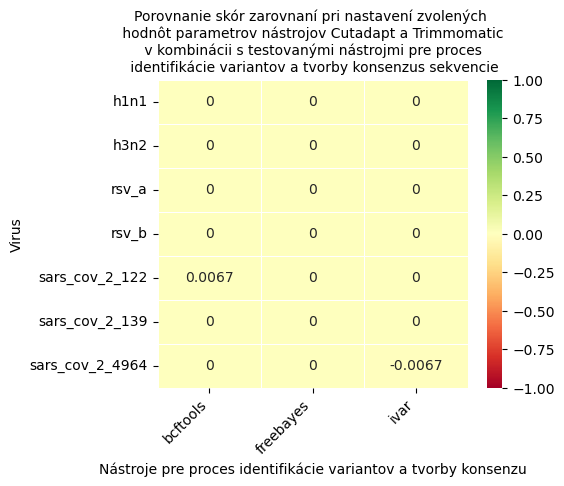

In [21]:
plt.clf()
# plt.figure(figsize=(9,3))
# Replace NaN with a specific value (e.g., -1)
rd_samples_param_comparison.fillna(-200, inplace=True)
# rd_samples_param_comparison.set_index('virus', inplace=True)
# Masking the -1 values
mask = rd_samples_param_comparison == -200
ax = sns.heatmap(rd_samples_param_comparison, annot=True, cmap='RdYlGn', linewidths=.5, mask=mask, vmin=-1, vmax=1) # , square=True
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-axis labels diagonally
ax.set(xlabel='Nástroje pre proces identifikácie variantov a tvorby konsenzu', ylabel="Virus")

# plot_title = 'Rozdiel medzi trimovacimi nastrojmi \n  (cutadapt_score / trimmomatic_score)'
plot_title = 'Porovnanie skór zarovnaní pri nastavení zvolených \n hodnôt parametrov nástrojov Cutadapt a Trimmomatic \n v kombinácii s testovanými nástrojmi pre proces \n identifikácie variantov a tvorby konsenzus sekvencie'
plt.title(plot_title, fontsize=10)
plt.gcf().set_size_inches(5, 4)
path_to_save_fig = './data/result_metrics/comparison_MBS_params_score/finalne_porovnania/heatmap_final_' + alignment_score + '_' + date_generated + '_trimmomatic_cutadapt_rozdiel_vc' + ".png"
plt.savefig(path_to_save_fig, bbox_inches='tight')
plt.show()


In [5]:
path_to_rd_samples = './data/result_metrics/results_all_viruses/finalne_nastavenia/results_all_viruses_match1_mis-1_o-2_e-2_' + date_generated + '_trimmomatic_cutadapt_vc.tsv'
all_rd_samples = pd.read_csv(path_to_rd_samples, sep='\t')

all_rd_samples



virus      trimmer variant_caller            param    score  \
0              h1n1  trimmomatic      freebayes              NaN  13424.0   
1              h1n1  trimmomatic           ivar              NaN  13424.0   
2              h1n1  trimmomatic       bcftools              NaN  13422.0   
3              h3n2  trimmomatic      freebayes              NaN  13179.0   
4              h3n2  trimmomatic       bcftools              NaN  13177.0   
..              ...          ...            ...              ...      ...   
79   sars_cov_2_122     cutadapt      freebayes  baseline_params  29779.0   
80   sars_cov_2_122     cutadapt       bcftools  baseline_params  29775.0   
81  sars_cov_2_4964     cutadapt      freebayes  baseline_params  29833.0   
82  sars_cov_2_4964     cutadapt           ivar  baseline_params  29831.0   
83  sars_cov_2_4964     cutadapt       bcftools  baseline_params  29815.0   

    match  gap  mismatch  N_count  score_agg  sample_id  \
0   13428    0         4        4    13420.0       1337   
1   13428    0         4        4    13420.0       1337   
2   13427    0         5        4    13417.0       1337   
3   13179    0         0        1    13179.0       2129   
4   13178    0         1        1    13176.0       2129   
..    ...  ...       ...      ...        ...        ...   
79  29833   26         2       48    29751.0        122   
80  29817   12        18       32    29745.0        122   
81  29840    0         7        7    29826.0       4964   
82  29839    0         8        8    29823.0       4964   
83  29831    0        16        7    29799.0       4964   

   pairwiseAligner_set_score consensus_baseline consensus_baseline_virus  \
0       match1_mis-1_o-2_e-2                NaN                      NaN   
1       match1_mis-1_o-2_e-2                NaN                      NaN   
2       match1_mis-1_o-2_e-2                NaN                      NaN   
3       match1_mis-1_o-2_e-2                NaN                      NaN   
4       match1_mis-1_o-2_e-2                NaN                      NaN   
..                       ...                ...                      ...   
79      match1_mis-1_o-2_e-2                MBS       MBS_sars_cov_2_122   
80      match1_mis-1_o-2_e-2                MBS       MBS_sars_cov_2_122   
81      match1_mis-1_o-2_e-2                MBS      MBS_sars_cov_2_4964   
82      match1_mis-1_o-2_e-2                MBS      MBS_sars_cov_2_4964   
83      match1_mis-1_o-2_e-2                MBS      MBS_sars_cov_2_4964   

                    param_name  param_val  
0        trimmomatic_freebayes        NaN  
1             trimmomatic_ivar        NaN  
2         trimmomatic_bcftools        NaN  
3        trimmomatic_freebayes        NaN  
4         trimmomatic_bcftools        NaN  
..                         ...        ...  
79  cutadapt_mbs_freebayes_mbs        NaN  
80   cutadapt_mbs_bcftools_mbs        NaN  
81  cutadapt_mbs_freebayes_mbs        NaN  
82       cutadapt_mbs_ivar_mbs        NaN  
83   cutadapt_mbs_bcftools_mbs        NaN  

[84 rows x 16 columns]

In [7]:
all_rd_samples[(all_rd_samples.virus == 'sars_cov_2_4964') & (all_rd_samples.param !='baseline_params') & (all_rd_samples.variant_caller == 'ivar')]


virus      trimmer variant_caller param    score  match  gap  \
19  sars_cov_2_4964  trimmomatic           ivar   NaN  29833.0  29840    0   
61  sars_cov_2_4964     cutadapt           ivar   NaN  29831.0  29839    0   

    mismatch  N_count  score_agg  sample_id pairwiseAligner_set_score  \
19         7        7    29826.0       4964      match1_mis-1_o-2_e-2   
61         8        8    29823.0       4964      match1_mis-1_o-2_e-2   

   consensus_baseline consensus_baseline_virus        param_name  param_val  
19                NaN                      NaN  trimmomatic_ivar        NaN  
61                NaN                      NaN     cutadapt_ivar        NaN

In [8]:
all_rd_samples[(all_rd_samples.virus == 'sars_cov_2_122') & (all_rd_samples.param !='baseline_params') & (all_rd_samples.variant_caller == 'bcftools')]


virus      trimmer variant_caller param    score  match  gap  \
16  sars_cov_2_122  trimmomatic       bcftools   NaN  29817.0  29829    3   
58  sars_cov_2_122     cutadapt       bcftools   NaN  29819.0  29830    3   

    mismatch  N_count  score_agg  sample_id pairwiseAligner_set_score  \
16         6       24    29808.0        122      match1_mis-1_o-2_e-2   
58         5       24    29811.0        122      match1_mis-1_o-2_e-2   

   consensus_baseline consensus_baseline_virus            param_name  \
16                NaN                      NaN  trimmomatic_bcftools   
58                NaN                      NaN     cutadapt_bcftools   

    param_val  
16        NaN  
58        NaN